<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas Kelompok***

###**Anggota:**
Ario Nugraha Ramadhanu - 2006486273<br>
Madeleine Sekar Putri W - 2006483164<br>
Alfina Azaria - 2006482773<br>
Vincent Suryakim - 2006483252
</center>

In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [139]:
df = pd.read_csv("05_used_cars.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.describe()

odometer_value  year_produced  engine_capacity     price_usd  \
count     4204.000000    4204.000000      4204.000000   4204.000000   
mean    281798.332778    2000.965271         1.872931   4901.195837   
std     123302.989007       7.438941         0.365265   3965.597110   
min          1.000000    1976.000000         0.200000    187.590000   
25%     200150.250000    1995.750000         1.600000   1700.000000   
50%     285000.000000    2000.500000         1.800000   4000.000000   
75%     350000.000000    2007.000000         2.000000   6972.500000   
max    1000000.000000    2018.000000         4.200000  34118.230000   

       number_of_photos   up_counter  duration_listed  
count       4204.000000  4204.000000      4204.000000  
mean           9.320409    13.874167        74.458373  
std            5.854396    37.731222       111.851153  
min            1.000000     1.000000         0.000000  
25%            5.000000     2.000000        22.000000  
50%            8.000000     4.000000        57.000000  
75%           12.000000    14.000000        89.000000  
max           53.000000  1271.000000      2232.000000

In [140]:
df.head()

manufacturer_name model_name transmission   color  odometer_value  \
0              Opel      Astra   mechanical  silver          121000   
1              Opel      Astra    automatic  silver          102455   
2              Opel      Astra    automatic   black          249000   
3              Opel      Astra    automatic  silver          240000   
4              Opel      Astra   mechanical   black          125000   

   year_produced  engine_has_gas engine_type  engine_capacity  body_type  ...  \
0           2010           False    gasoline              1.6      sedan  ...   
1           2012           False    gasoline              1.4  universal  ...   
2           2008           False    gasoline              1.8  universal  ...   
3           2005           False    gasoline              1.8  hatchback  ...   
4           2010           False    gasoline              1.4  hatchback  ...   

   feature_1 feature_2 feature_3  feature_4  feature_5 feature_6  feature_7  \
0       True     False     False      False       True     False      False   
1       True      True      True       True       True      True       True   
2       True     False     False       True       True     False      False   
3       True     False     False      False       True     False      False   
4       True     False     False      False      False     False      False   

   feature_8  feature_9  duration_listed  
0      False      False               76  
1       True       True               43  
2       True       True               40  
3       True       True               32  
4       True       True              313  

[5 rows x 29 columns]

In [141]:
# Mencetak dimensi data
print("data: ", df.shape)

data:  (4204, 29)


In [142]:
# Membaca kolom-kolom pada DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  4204 non-null   object 
 1   model_name         4204 non-null   object 
 2   transmission       4204 non-null   object 
 3   color              4204 non-null   object 
 4   odometer_value     4204 non-null   int64  
 5   year_produced      4204 non-null   int64  
 6   engine_has_gas     4204 non-null   bool   
 7   engine_type        4204 non-null   object 
 8   engine_capacity    4204 non-null   float64
 9   body_type          4204 non-null   object 
 10  has_warranty       4204 non-null   bool   
 11  state              4204 non-null   object 
 12  drivetrain         4204 non-null   object 
 13  price_usd          4204 non-null   float64
 14  is_exchangeable    4204 non-null   bool   
 15  location_region    4204 non-null   object 
 16  number_of_photos   4204 

In [143]:
# Check for missing values

missing_col = []

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        missing_col.extend(missing_data[missing_data['Total'] > 0].index.tolist())
        print(missing_data[missing_data['Total'] > 0])

cek_null(df)

Tidak ditemukan missing value pada dataset


In [144]:
# Check for duplicated values
print("Jumlah duplikasi data:", df.duplicated().sum())

Jumlah duplikasi data: 1


In [145]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)
df.duplicated(keep=False).sum()

0

In [146]:
df.describe()

odometer_value  year_produced  engine_capacity     price_usd  \
count     4203.000000    4203.000000      4203.000000   4203.000000   
mean    281774.968118    2000.965977         1.872948   4902.040757   
std     123308.352295       7.439685         0.365307   3965.690486   
min          1.000000    1976.000000         0.200000    187.590000   
25%     200100.500000    1995.500000         1.600000   1700.000000   
50%     285000.000000    2001.000000         1.800000   4000.000000   
75%     350000.000000    2007.000000         2.000000   6975.000000   
max    1000000.000000    2018.000000         4.200000  34118.230000   

       number_of_photos   up_counter  duration_listed  
count       4203.000000  4203.000000      4203.000000  
mean           9.320723    13.877231        74.460148  
std            5.855057    37.735189       111.864402  
min            1.000000     1.000000         0.000000  
25%            5.000000     2.000000        22.000000  
50%            8.000000     4.000000        57.000000  
75%           12.000000    14.000000        89.000000  
max           53.000000  1271.000000      2232.000000

In [147]:
# Menampilkan summary dari nonnumeric atribute
display(df.describe(include=np.object))

/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_907/4028513226.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(df.describe(include=np.object))


manufacturer_name model_name transmission  color engine_type  \
count               4203       4203         4203   4203        4203   
unique                 4          5            2     12           2   
top           Volkswagen     Passat   mechanical  black    gasoline   
freq                2129       1422         3244    874        2416   

        body_type  state drivetrain location_region  
count        4203   4203       4203            4203  
unique          7      2          3               6  
top     universal  owned      front      North East  
freq         1804   4175       3986            2289

# Label Encoding

In [148]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Mencari jumlah nilai unik pada kolom yang bertipe kategorik 
dfe = df.copy()
for col in dfe.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(dfe[col].unique(), '\n')
    print(dfe[col].value_counts(),'\n')
    # Encode labels in each column
    dfe[col]= label_encoder.fit_transform(dfe[col])
    print('Hasil Encoding: \n', dfe[col].unique())

No. of unique values in column manufacturer_name:
['Opel' 'Ford' 'Volkswagen' 'Audi'] 

Volkswagen    2129
Opel           751
Audi           687
Ford           636
Name: manufacturer_name, dtype: int64 

Hasil Encoding: 
 [2 1 3 0]
No. of unique values in column model_name:
['Astra' 'Mondeo' 'Golf' 'Passat' 'A6'] 

Passat    1422
Astra      751
Golf       707
A6         687
Mondeo     636
Name: model_name, dtype: int64 

Hasil Encoding: 
 [1 3 2 4 0]
No. of unique values in column transmission:
['mechanical' 'automatic'] 

mechanical    3244
automatic      959
Name: transmission, dtype: int64 

Hasil Encoding: 
 [1 0]
No. of unique values in column color:
['silver' 'black' 'green' 'white' 'blue' 'red' 'grey' 'brown' 'other'
 'violet' 'yellow' 'orange'] 

black     874
silver    776
blue      766
white     379
grey      362
red       321
green     311
other     243
brown      80
violet     73
yellow     14
orange      4
Name: color, dtype: int64 

Hasil Encoding: 
 [ 8  0  3 10  1  7  4

In [149]:
#Mencari jumlah nilai unik pada kolom yang bertipe boolean

for col in dfe.select_dtypes(include=bool).columns:
    print('No. of unique values in column '+col+':')
    print(dfe[col].value_counts(),'\n')
    # Encode labels in each column
    dfe[col]= label_encoder.fit_transform(dfe[col])
    print('Hasil Encoding: \n', dfe[col].unique())

No. of unique values in column engine_has_gas:
False    4094
True      109
Name: engine_has_gas, dtype: int64 

Hasil Encoding: 
 [0 1]
No. of unique values in column has_warranty:
False    4200
True        3
Name: has_warranty, dtype: int64 

Hasil Encoding: 
 [0 1]
No. of unique values in column is_exchangeable:
False    2845
True     1358
Name: is_exchangeable, dtype: int64 

Hasil Encoding: 
 [0 1]
No. of unique values in column feature_0:
False    3141
True     1062
Name: feature_0, dtype: int64 

Hasil Encoding: 
 [0 1]
No. of unique values in column feature_1:
True     2415
False    1788
Name: feature_1, dtype: int64 

Hasil Encoding: 
 [1 0]
No. of unique values in column feature_2:
False    3360
True      843
Name: feature_2, dtype: int64 

Hasil Encoding: 
 [0 1]
No. of unique values in column feature_3:
False    3220
True      983
Name: feature_3, dtype: int64 

Hasil Encoding: 
 [0 1]
No. of unique values in column feature_4:
False    3454
True      749
Name: feature_4, dty

Duplicate Values

In [150]:
dfe.duplicated(keep=False).sum()

0

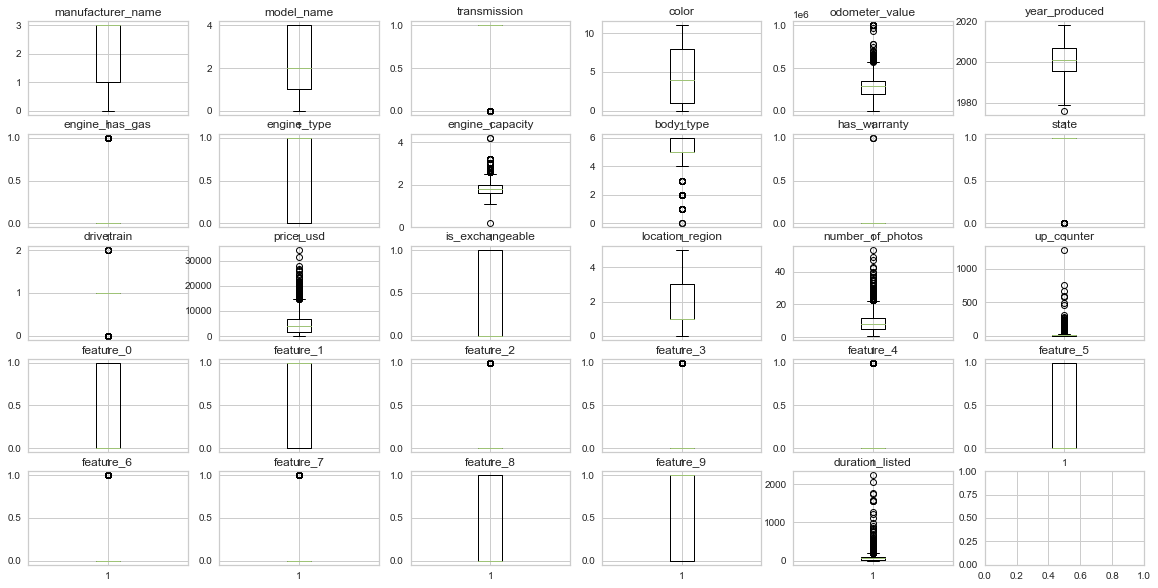

In [151]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(5, 6)
idx = 0

for col in dfe:
  axs[int(idx/6)][idx%6].boxplot(dfe[col][~np.isnan(dfe[col])])
  axs[int(idx/6)][idx%6].set_title(col)
  idx += 1
  
plt.show()

In [152]:
df_cleaned = dfe.copy()
for col in dfe.select_dtypes(exclude=object):
  df_cleaned[col].fillna(dfe[col].mean(), inplace=True)

df_cleaned.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [153]:
df_cleaned.drop_duplicates(keep='first', inplace=True, ignore_index=False)
df_cleaned.duplicated(keep=False).sum()

0

In [154]:
df_cleaned.head()

manufacturer_name  model_name  transmission  color  odometer_value  \
0                  2           1             1      8          121000   
1                  2           1             0      8          102455   
2                  2           1             0      0          249000   
3                  2           1             0      8          240000   
4                  2           1             1      0          125000   

   year_produced  engine_has_gas  engine_type  engine_capacity  body_type  \
0           2010               0            1              1.6          5   
1           2012               0            1              1.4          6   
2           2008               0            1              1.8          6   
3           2005               0            1              1.8          2   
4           2010               0            1              1.4          2   

   ...  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  ...          1          0          0          0          1          0   
1  ...          1          1          1          1          1          1   
2  ...          1          0          0          1          1          0   
3  ...          1          0          0          0          1          0   
4  ...          1          0          0          0          0          0   

   feature_7  feature_8  feature_9  duration_listed  
0          0          0          0               76  
1          1          1          1               43  
2          0          1          1               40  
3          0          1          1               32  
4          0          1          1              313  

[5 rows x 29 columns]

In [155]:
df_noOutliers = df_cleaned.copy()
numerik = ['odometer_value', 'year_produced', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed', 'engine_capacity']
df_numeric = df_noOutliers[numerik]

In [156]:
# mengecek dan menghitung keberadaan outliers pada data numerik

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers_sum = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
outliers_sum

odometer_value       64
year_produced         1
price_usd           117
number_of_photos    153
up_counter          419
duration_listed     237
engine_capacity     224
dtype: int64

array([[<AxesSubplot: title={'center': 'odometer_value'}>,
        <AxesSubplot: title={'center': 'year_produced'}>,
        <AxesSubplot: title={'center': 'price_usd'}>],
       [<AxesSubplot: title={'center': 'number_of_photos'}>,
        <AxesSubplot: title={'center': 'up_counter'}>,
        <AxesSubplot: title={'center': 'duration_listed'}>],
       [<AxesSubplot: title={'center': 'engine_capacity'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

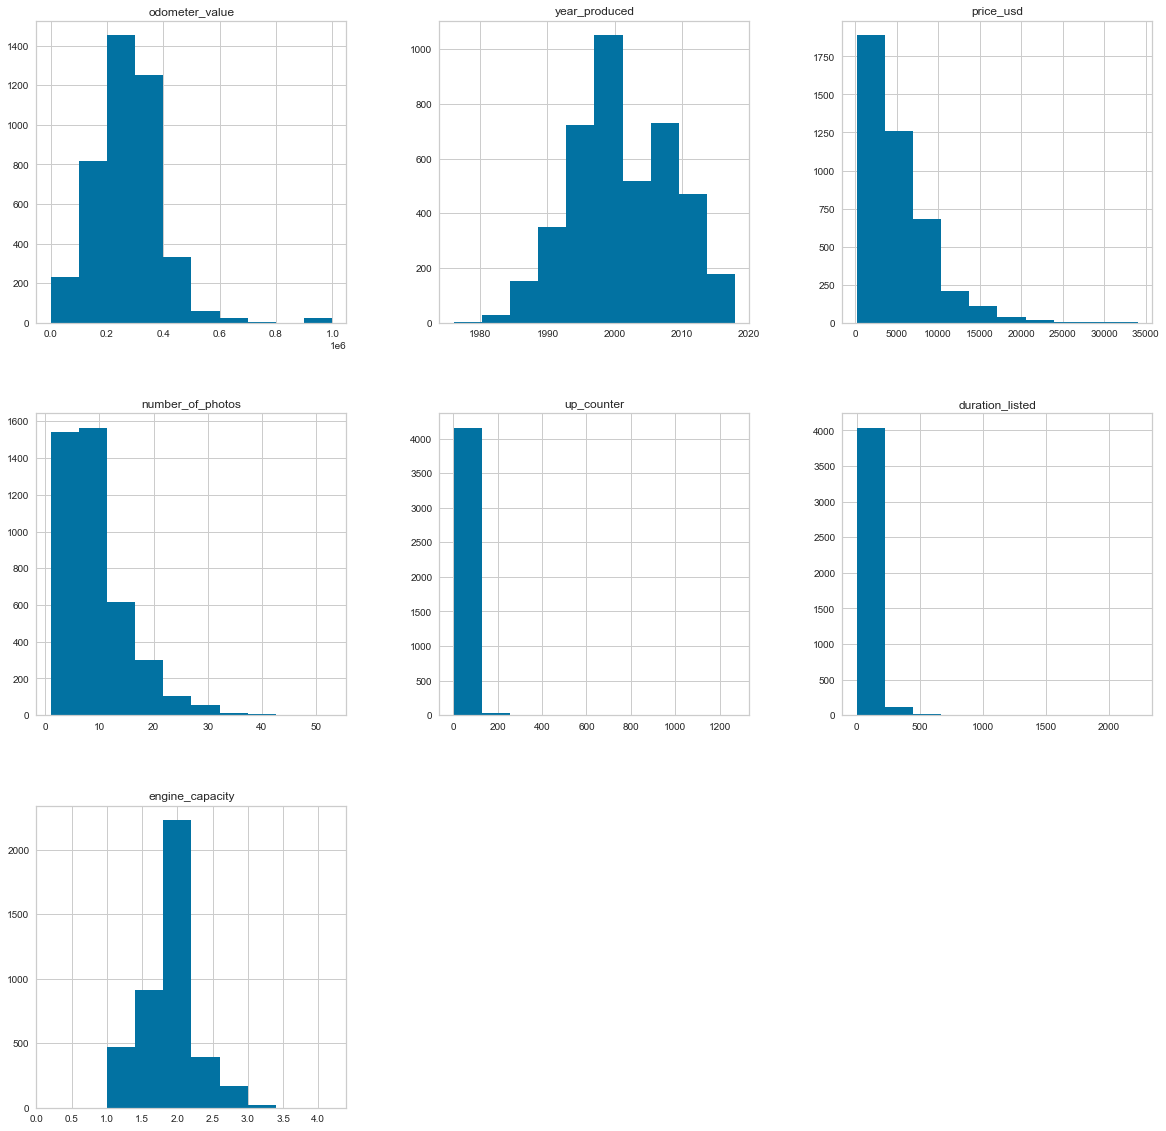

In [157]:
pd.DataFrame(df_numeric).hist(figsize=(20,20))

In [158]:
for name in df_numeric.columns:
    Q1= df_numeric[name].quantile(0.25)
    median = df_numeric[name].quantile(0.5)
    Q3= df_numeric[name].quantile(0.75)
    mean = df_numeric[name].mean()
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if (name == "odometer_value" or name == "year_produced"):
        df_numeric[name] = np.where(((df_numeric[name] < lower_bound) | (df_numeric[name] > upper_bound)), mean, df_numeric[name])
    else:
        df_numeric[name] = np.where(((df_numeric[name] < lower_bound) | (df_numeric[name] > upper_bound)), median, df_numeric[name])

/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_907/2465989388.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[name] = np.where(((df_numeric[name] < lower_bound) | (df_numeric[name] > upper_bound)), mean, df_numeric[name])
/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_907/2465989388.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[name] = np.where(((df_numeric[name] < lower_bound) | (df_numeric[name] > upper_bound)), median, df_numeric[name])


In [159]:
# mengecek dan menghitung keberadaan outliers pada data numerik
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers_sum = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
outliers_sum

odometer_value        2
year_produced         1
price_usd            48
number_of_photos     69
up_counter          354
duration_listed      67
engine_capacity       0
dtype: int64

In [160]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4203 entries, 0 to 4203
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  4203 non-null   int64  
 1   model_name         4203 non-null   int64  
 2   transmission       4203 non-null   int64  
 3   color              4203 non-null   int64  
 4   odometer_value     4203 non-null   int64  
 5   year_produced      4203 non-null   int64  
 6   engine_has_gas     4203 non-null   int64  
 7   engine_type        4203 non-null   int64  
 8   engine_capacity    4203 non-null   float64
 9   body_type          4203 non-null   int64  
 10  has_warranty       4203 non-null   int64  
 11  state              4203 non-null   int64  
 12  drivetrain         4203 non-null   int64  
 13  price_usd          4203 non-null   float64
 14  is_exchangeable    4203 non-null   int64  
 15  location_region    4203 non-null   int64  
 16  number_of_photos   4203 

# 1.a Bagaimana karakteristik mobil yang banyak disukai calon pembeli (memiliki banyak upvotes)?

Melakukan Visualisasi Fitur up_counter dengan Boxplot

<AxesSubplot: >

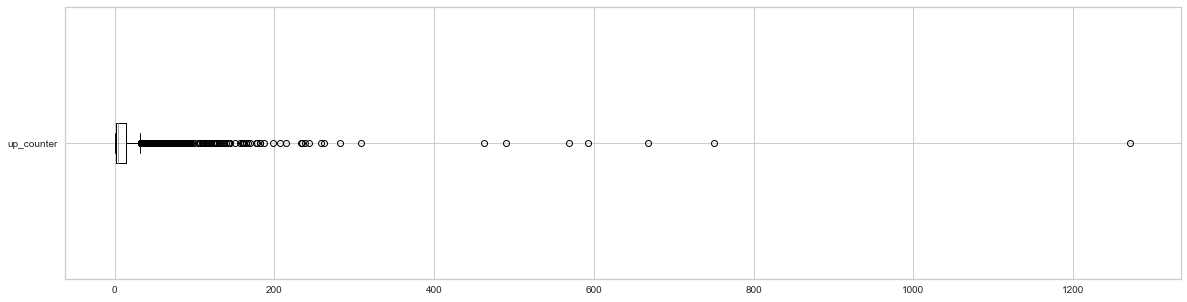

In [161]:
df.boxplot(vert=False,figsize=(20,5),column=['up_counter'])

Dapat di lihat berdasarkan visualisasi dari boxplot di atas, terdapat banyak sekali outlier pada fitur up_counter. Soal meminta untuk memberikan karakteristik mobil yang memiliki banyak upvotes. Definisi upvotes di sini belum terlalu jelas, oleh karena itu kami akan mendefinisikan upvotes yang dianggap banyak adalah upvotes dengan nilai yang melebihi nilai median.

In [162]:
median = np.median(df['up_counter'])

many_upvotes = df.loc[(df['up_counter']>median)]
print('Jumlah mobil yang memiliki banyak upvotes: ', many_upvotes.shape[0])

Jumlah mobil yang memiliki banyak upvotes:  2083


Setelah itu, untuk menentukan karakteristik apa saja yang mempengaruhi suatu mobil memiliki banyak upvotes kami akan melihat korelasinya menggunakan heatmap.

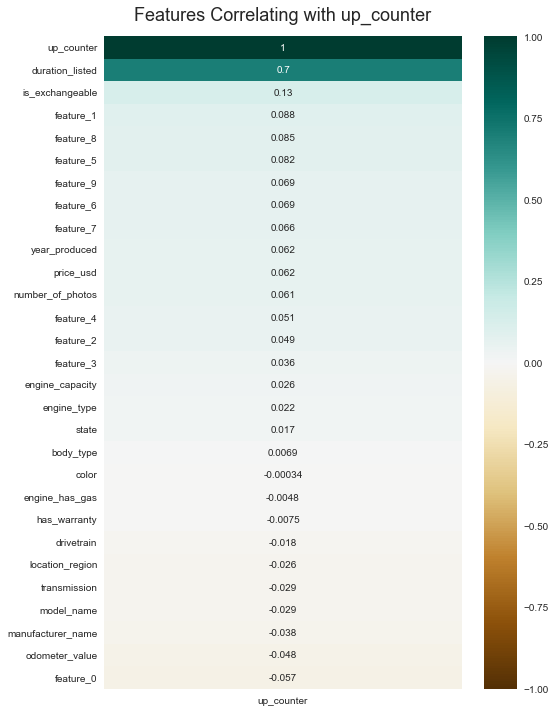

In [163]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_cleaned.corr()[['up_counter']].sort_values(by='up_counter', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with up_counter', fontdict={'fontsize':18}, pad=16);

Setelah kita mengetahui korelasi antara upvotes dengan atribut lainnya, maka kita dapat menentukan karakteristik mobil dengan banyak upvotes. Seperti yang kita ketahui, pada koefisien korelasi bahwa nilai 1 menandakan bahwa kedua variable berkorelasi sedangkan nilai -1 menandakan bahwa kedua variable tidak berkorelasi. Oleh karena itu, kami memutuskan untuk mencari karakteristik berdasarkan nilai koefisien korelasi yang positif saja.

In [164]:
many_upvotes_col = many_upvotes[['duration_listed','is_exchangeable', 'feature_1', 'feature_8', 
                    'feature_5', 'feature_9', 'feature_6', 'feature_7',
                    'year_produced', 'price_usd', 'number_of_photos', 'feature_4',
                    'feature_2', 'feature_3', 'engine_capacity', 'engine_type', 'state',
                    'body_type']]

Setelah itu, kami akan mengelompokkan atribut tersebut berdasarkan karakteristik mobil sebagai berikut:


*   Fitur Mobil: 'feature_1', 'feature_8','feature_5', 'feature_9', 'feature_6', 'feature_7', 'feature_4', 'feature_2', 'feature_3'
*   Mesin Mobil: 'engine_capacity', 'engine_type'
*   Kondisi Mobil: 'year_produced', 'state', 'is_exchangeable'
*   Listed: 'duration_listed', 'number_of_photos'
*   Tipe Mobil: 'body_type'
*   Harga Mobil: 'price_usd'







In [165]:
fitur = many_upvotes[['feature_1', 'feature_8','feature_5', 'feature_9', 'feature_6', 'feature_7',
                      'feature_4', 'feature_2', 'feature_3']]
mesin = many_upvotes[['engine_capacity', 'engine_type']]
kondisi = many_upvotes[['year_produced', 'state', 'is_exchangeable']]
listed = many_upvotes[['duration_listed', 'number_of_photos']]
tipe = many_upvotes[['body_type']]
harga = many_upvotes[['price_usd']]

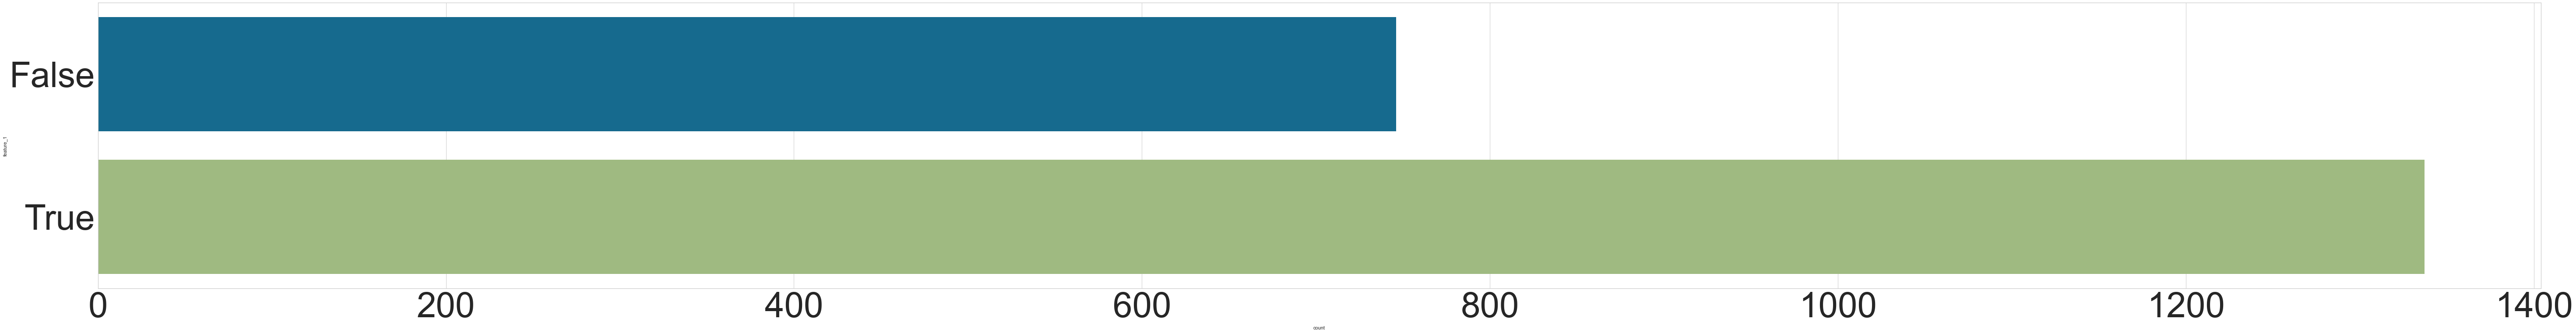

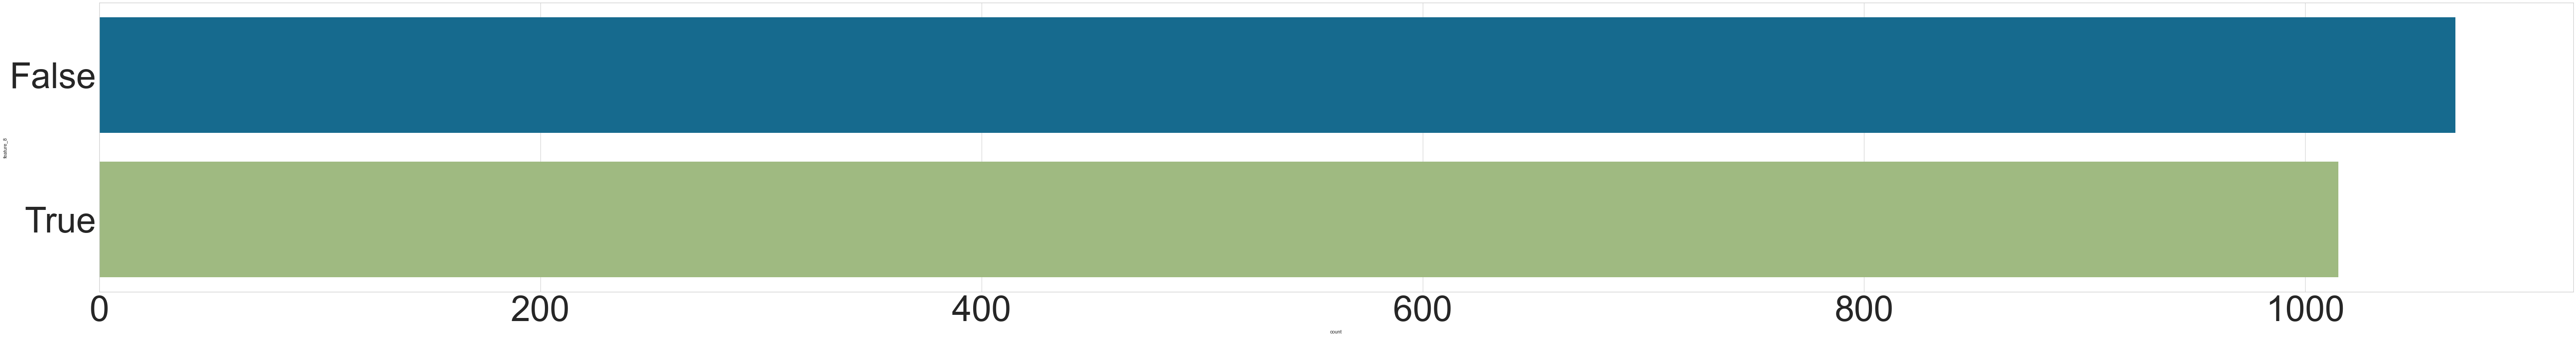

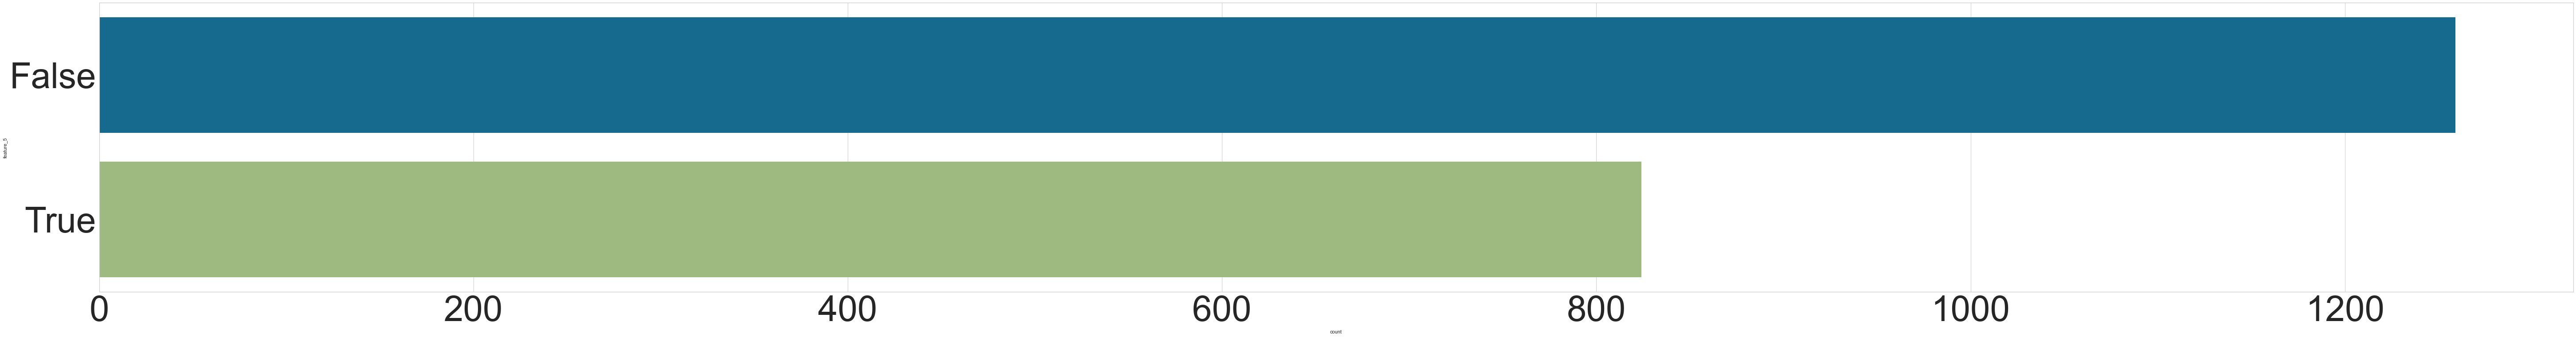

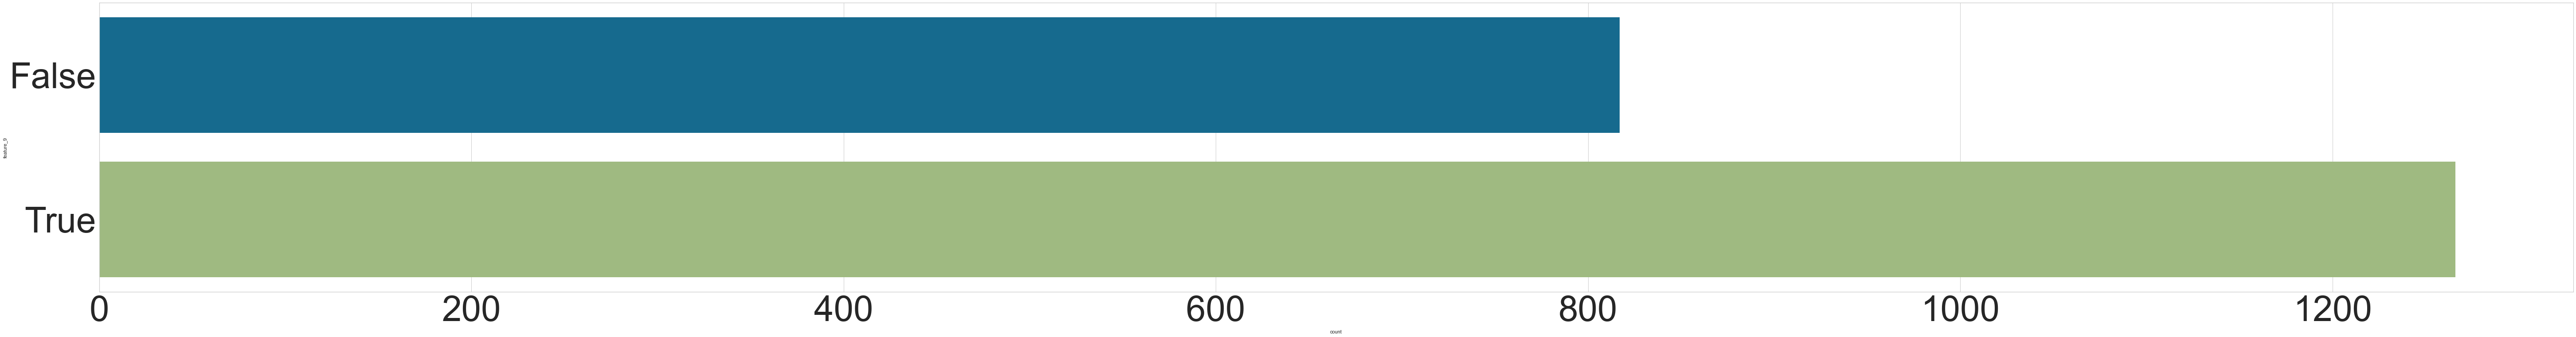

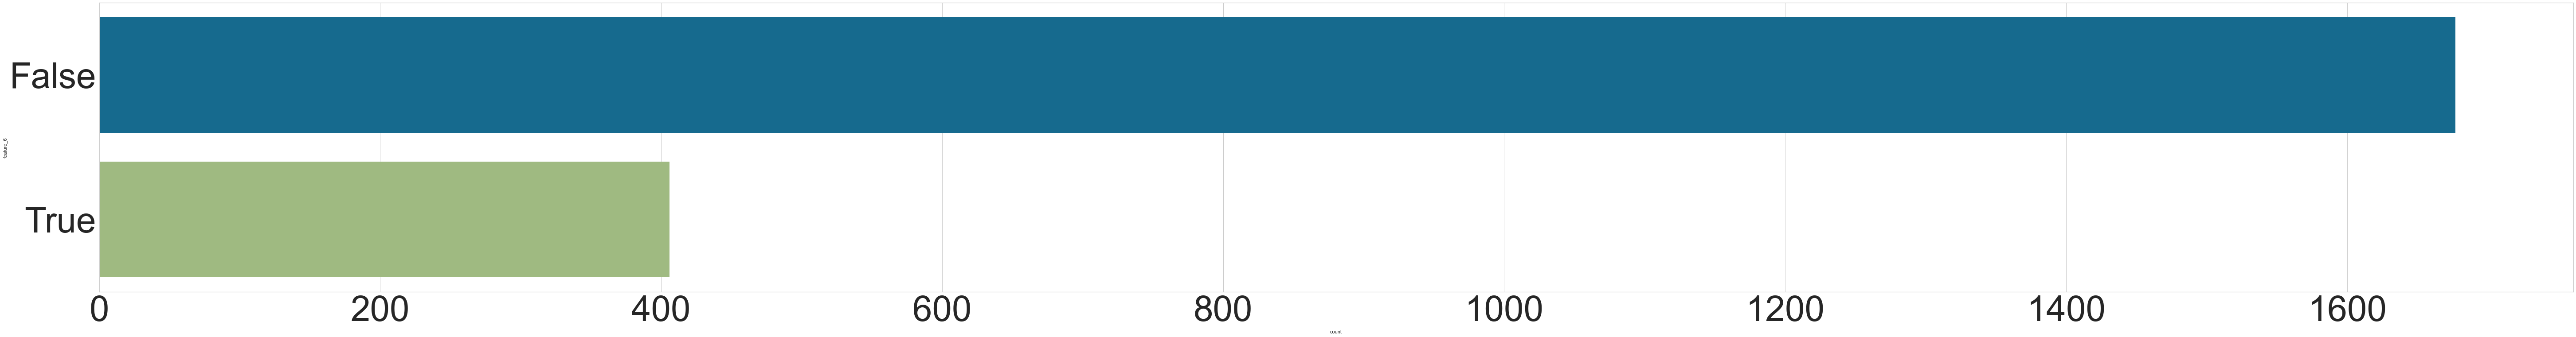

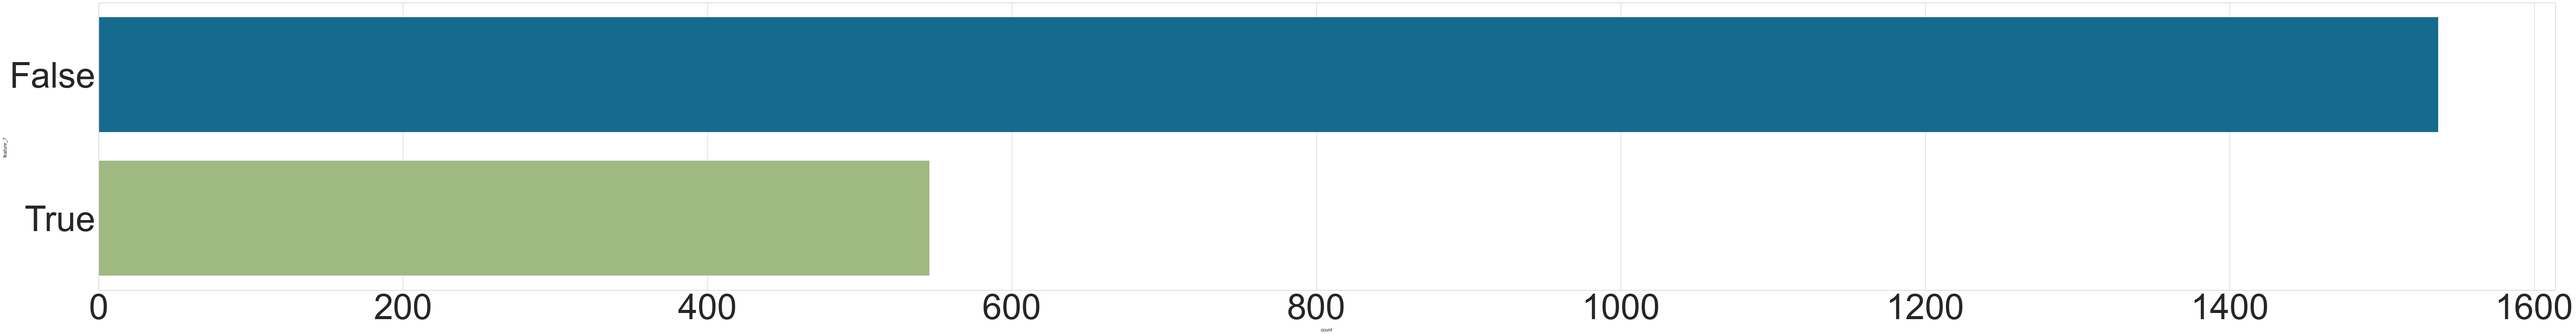

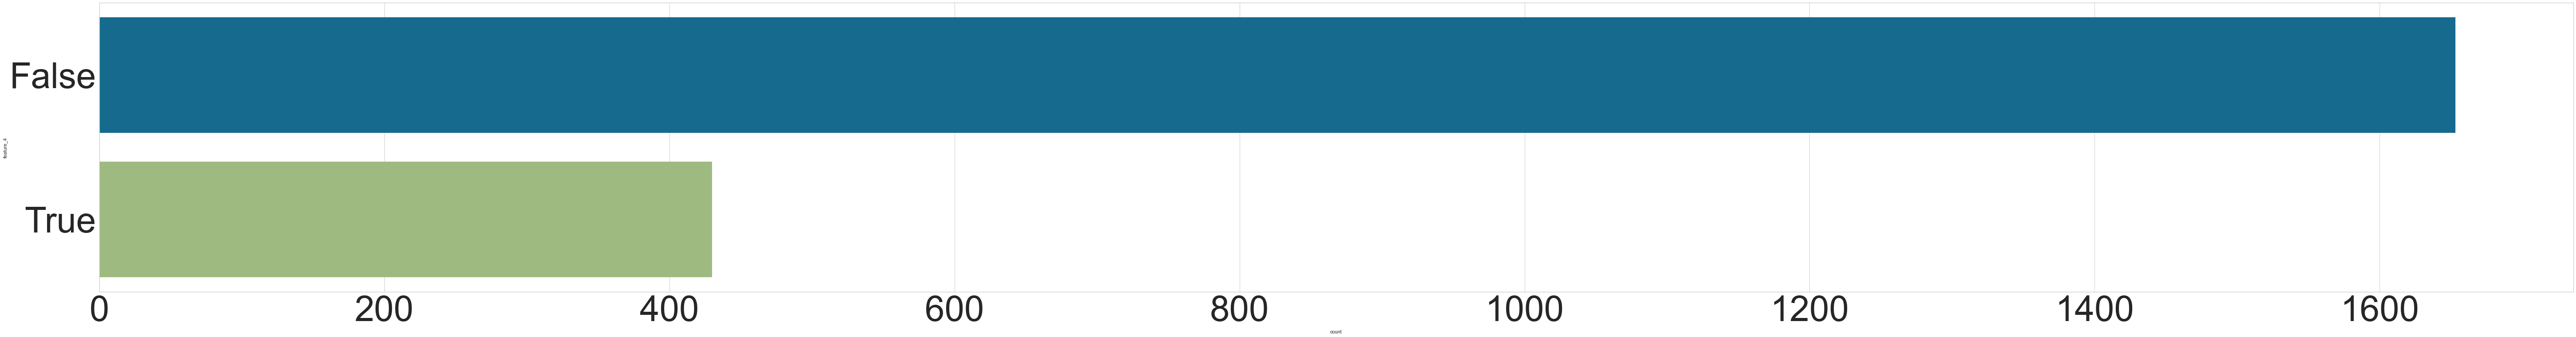

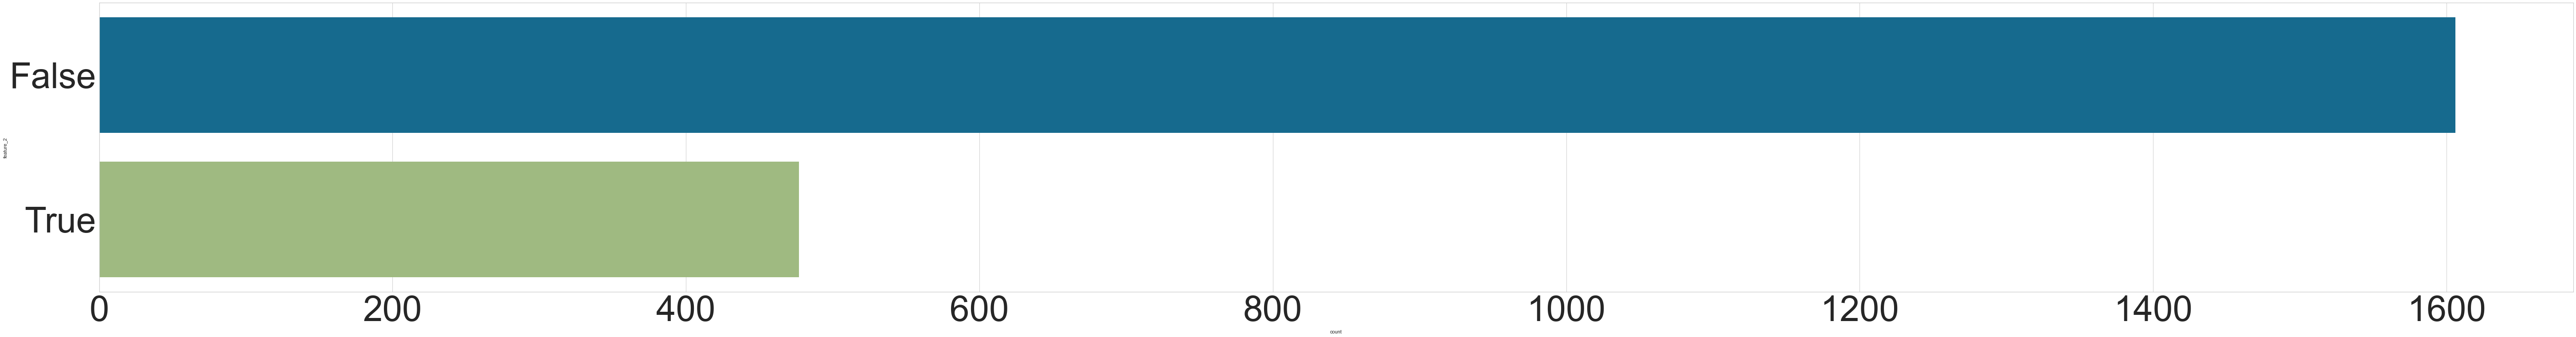

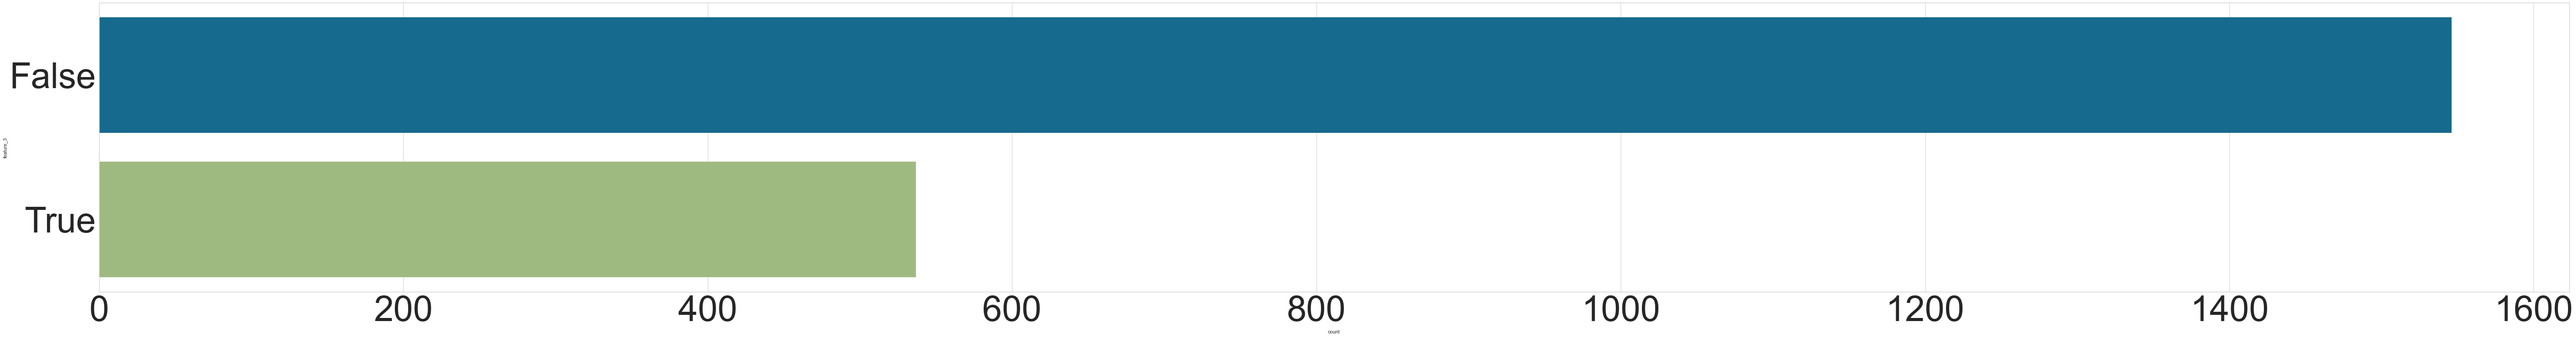

In [166]:
for col in fitur:
    if col != 'up_counter':
        plt.figure(figsize=(100,12))
        plt.yticks(size=80)
        plt.xticks(size=80)
        sns.countplot(y=col, data=fitur)

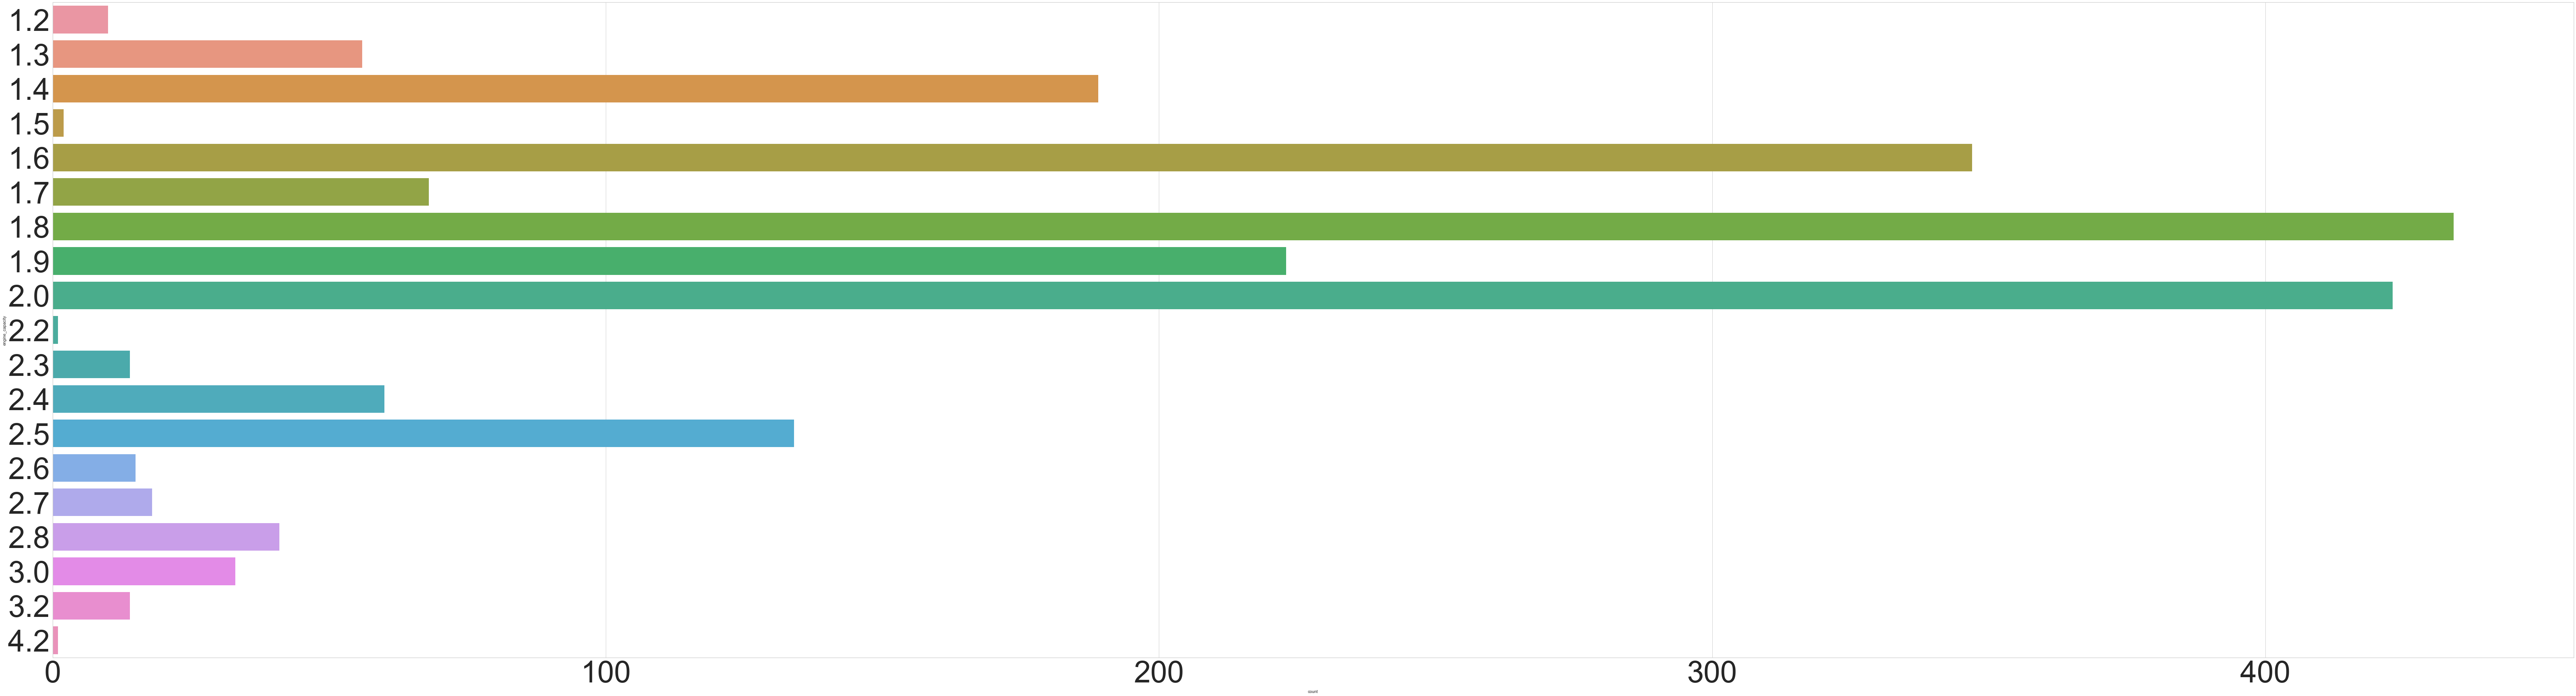

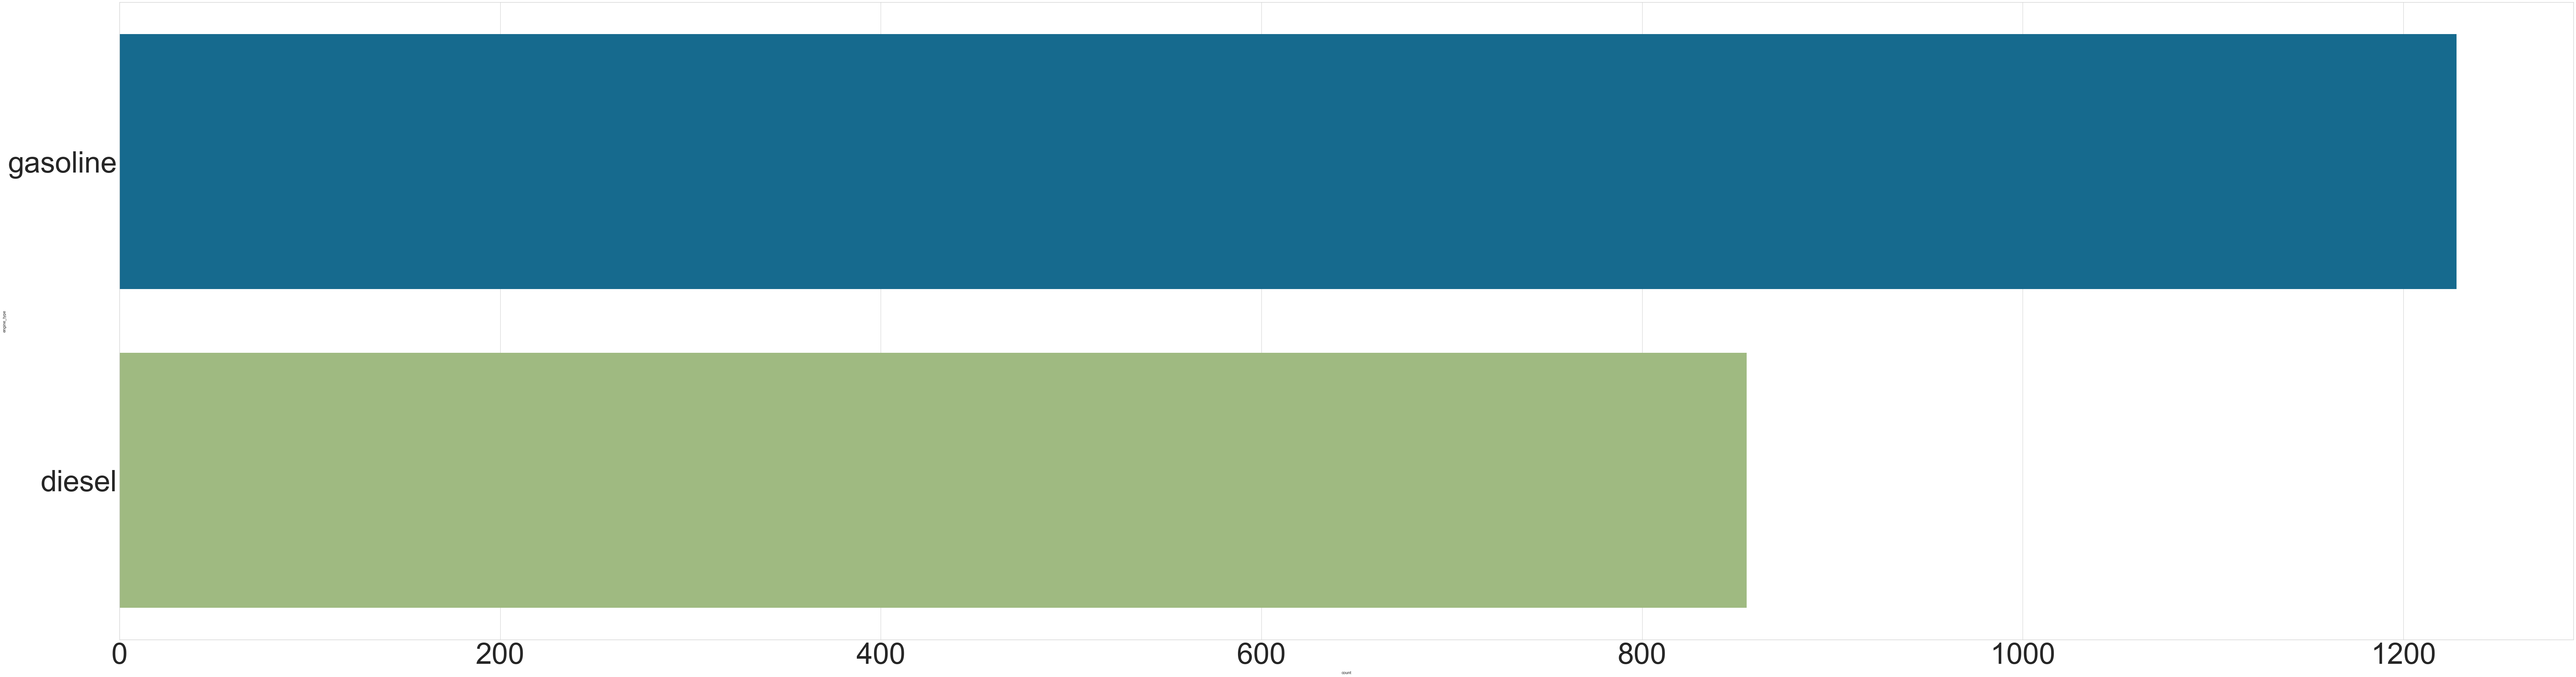

In [167]:
for col in mesin:
    if col != 'up_counter':
        plt.figure(figsize=(120,32))
        plt.yticks(size=80)
        plt.xticks(size=80)
        sns.countplot(y=col, data=mesin)

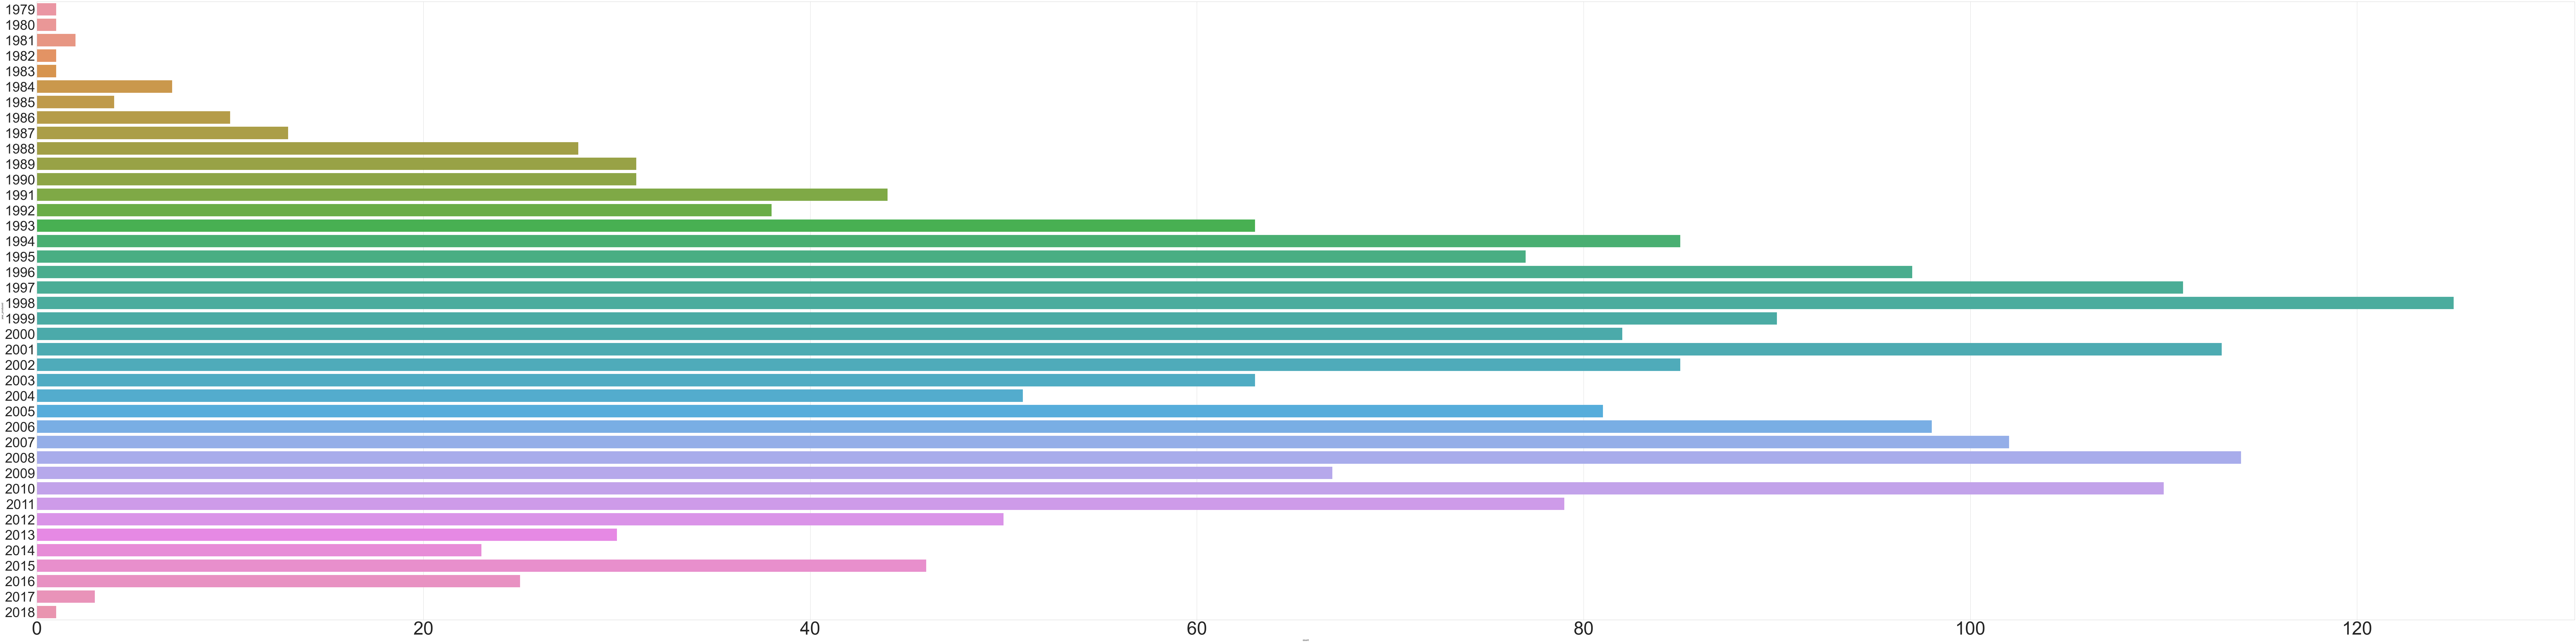

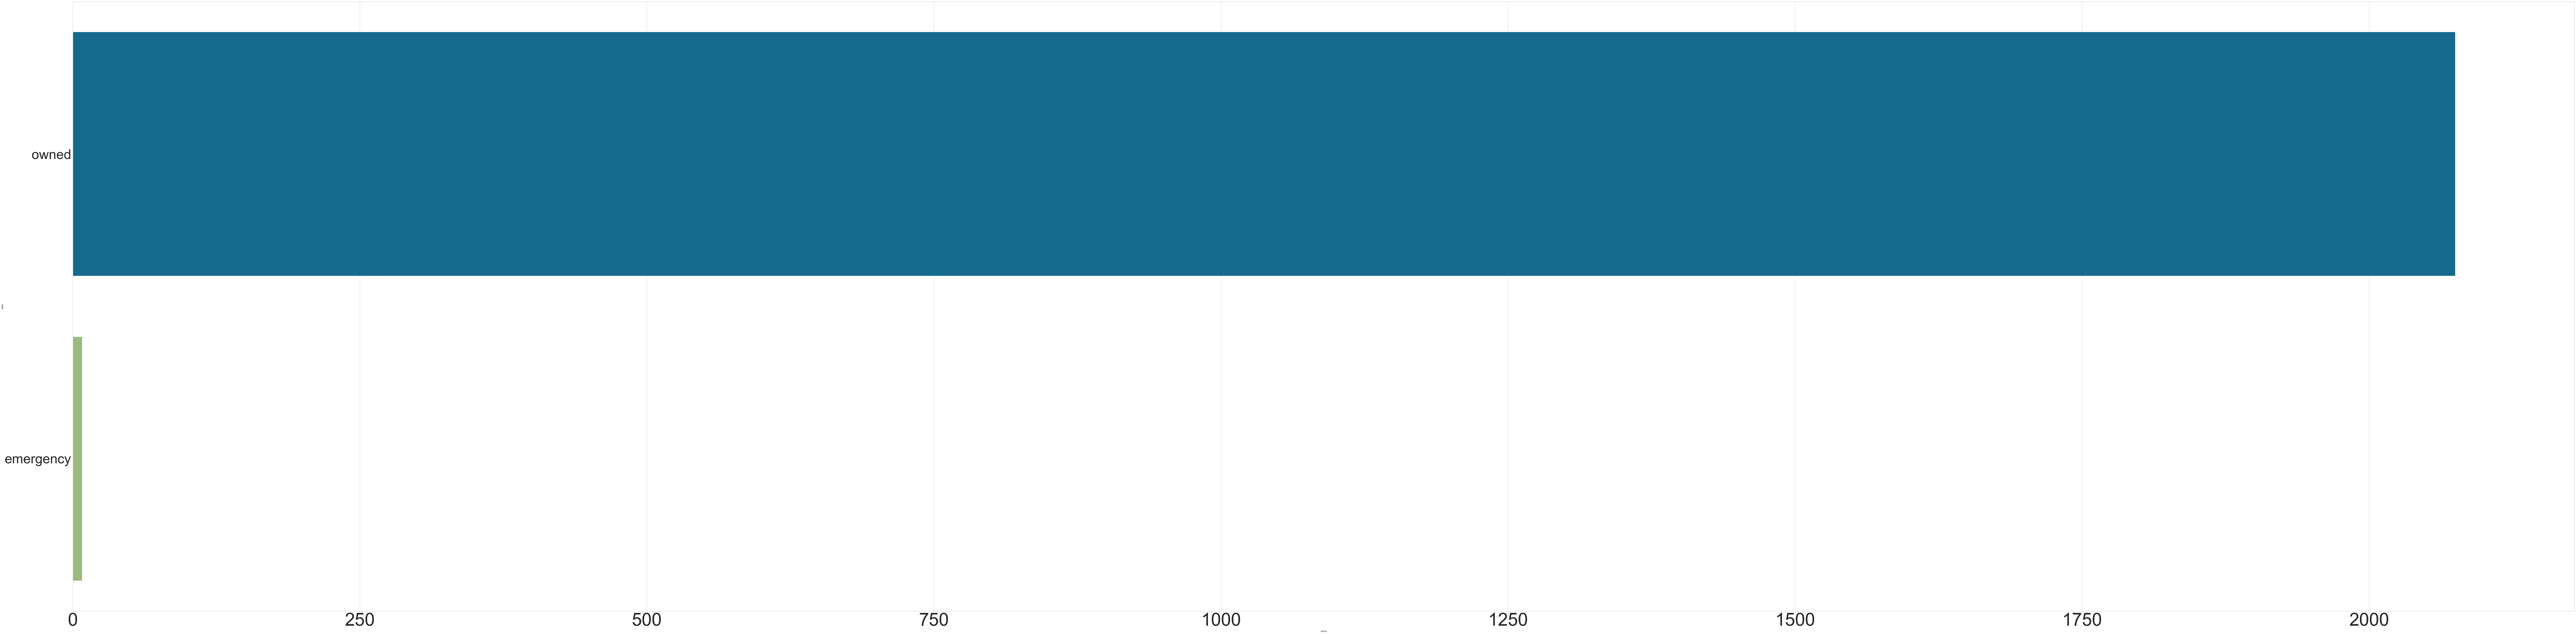

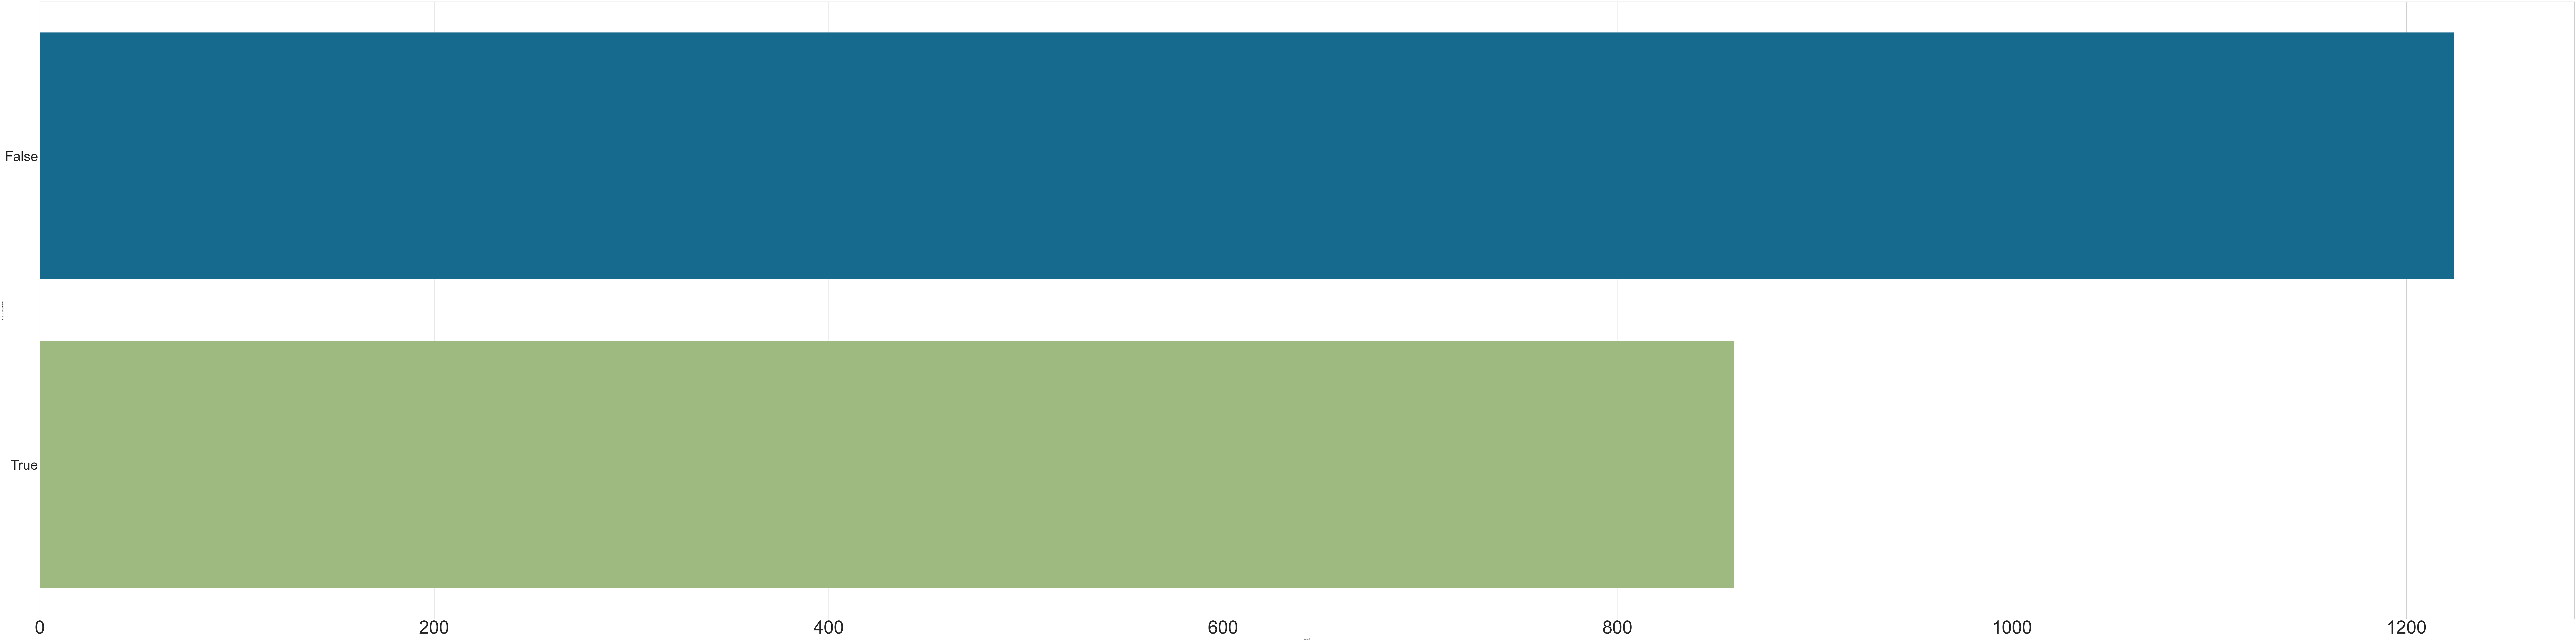

In [168]:
for col in kondisi:
    if col != 'up_counter':
        plt.figure(figsize=(200,50))
        plt.yticks(size=60)
        plt.xticks(size=80)
        sns.countplot(y=col, data=kondisi)

In [169]:
for col in listed:
    if col != 'up_counter':
        plt.figure(figsize=(300,400))
        plt.yticks(size=60)
        plt.xticks(size=80)
        sns.countplot(y=col, data=listed)

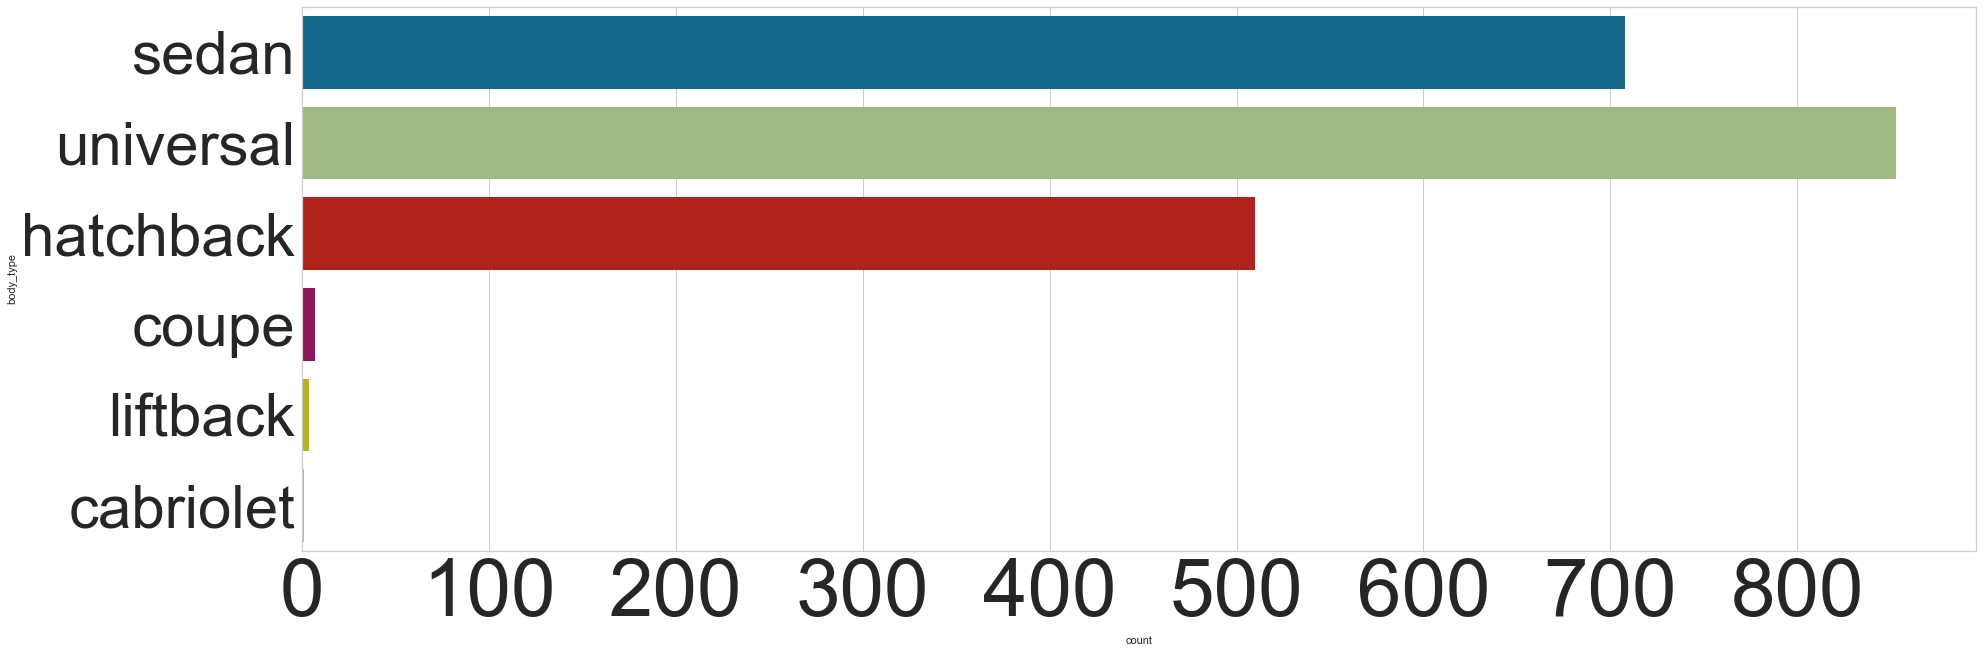

In [170]:
for col in tipe:
    if col != 'up_counter':
        plt.figure(figsize=(30,10))
        plt.yticks(size=60)
        plt.xticks(size=80)
        sns.countplot(y=col, data=tipe)

Harga Mobil

/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_907/1746061393.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p = sns.kdeplot(many_upvotes['price_usd'], shade=True)
/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_907/1746061393.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  plt.vlines(x=scp.mode(many_upvotes['price_usd'])[0][0], ymin=0, ymax=ticks, color='red', linestyle='--')


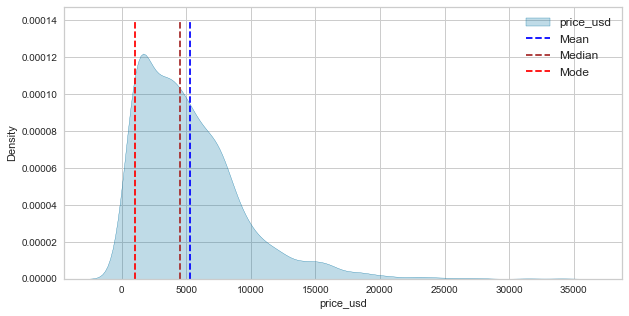

In [171]:
plt.figure(figsize=(10,5))
p = sns.kdeplot(many_upvotes['price_usd'], shade=True) 
ticks = max(p.get_yticks())
plt.vlines(x=np.mean(many_upvotes['price_usd']), ymin=0, ymax=ticks, color='blue', linestyle='--')
plt.vlines(x=np.median(many_upvotes['price_usd']), ymin=0, ymax=ticks, color='brown', linestyle='--')
plt.vlines(x=scp.mode(many_upvotes['price_usd'])[0][0], ymin=0, ymax=ticks, color='red', linestyle='--')
plt.legend(['price_usd', 'Mean', 'Median', 'Mode'], fontsize=12) 
plt.show()

Karena distribusi harga positively skewed, kita dapat menggunakan nilai median untuk menentukan karakteristik harga yakni $4500.

In [172]:
print('Nilai Tengah Harga =', harga.median())

Nilai Tengah Harga = price_usd    4500.0
dtype: float64


Berdasarkan hasil visualisasi di atas, dapat kita tarik kesimpulan bahwa mobil yang memiliki banyak upvotes memiliki karakteristik sebagai berikut:

*   Body Type: Universal
*   Year Produced: 1994 - 2010
*   State: Owned
*   Is Exchangeable: False
*   Duration Listed: 87-90
*   Number of Photos: 3-12
*   Engine Capacity: 1.6 - 2
*   Engine Type: Gasoline
*   Feature 1: True
*   Feature 2-9: False
*   Price: $4500



Kemudian, coba kita bandingkan antara karakteristik yang telah kita dapatkan dengan karakteristik mobil dengan upvotes terbanyak.

In [173]:
# Mencari mobil dengan up_counter terbanyak
df_cleaned.sort_values("up_counter", ascending=False)

manufacturer_name  model_name  transmission  color  odometer_value  \
2163                  3           2             1      8          130000   
639                   2           1             1      8           85000   
3652                  0           0             1      0          275000   
746                   2           1             1      8          267000   
893                   1           3             1      6          200000   
...                 ...         ...           ...    ...             ...   
641                   2           1             1     10          100000   
642                   2           1             1      8          370000   
2884                  3           2             1      1          219000   
2882                  3           4             1      0          287000   
4203                  0           0             1      8          370000   

      year_produced  engine_has_gas  engine_type  engine_capacity  body_type  \
2163           2008               0            1              1.4          2   
639            2012               0            0              1.7          6   
3652           2002               0            0              2.5          6   
746            2002               0            0              1.7          6   
893            2009               0            0              1.8          6   
...             ...             ...          ...              ...        ...   
641            1995               0            1              1.6          6   
642            1998               0            1              1.8          2   
2884           1998               0            1              1.8          6   
2882           2011               0            0              2.0          6   
4203           2000               0            0              2.5          6   

      ...  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
2163  ...          1          0          1          0          1          0   
639   ...          1          1          1          0          1          1   
3652  ...          1          1          0          1          1          1   
746   ...          1          0          0          0          0          0   
893   ...          1          1          1          1          1          1   
...   ...        ...        ...        ...        ...        ...        ...   
641   ...          0          0          0          0          0          0   
642   ...          1          0          0          1          0          0   
2884  ...          0          0          0          0          1          0   
2882  ...          1          0          1          0          1          1   
4203  ...          0          0          0          0          0          0   

      feature_7  feature_8  feature_9  duration_listed  
2163          0          1          1             2232  
639           1          1          1             1554  
3652          1          1          1              916  
746           0          0          1             1562  
893           1          1          1              825  
...         ...        ...        ...              ...  
641           0          0          0               73  
642           0          0          1               74  
2884          0          0          1               33  
2882          1          1          1               33  
4203          0          0          0              143  

[4203 rows x 29 columns]

In [174]:
most_upvoted_car = df.iloc[2163]
most_upvoted_car

manufacturer_name       Volkswagen
model_name                  Passat
transmission            mechanical
color                          red
odometer_value              370000
year_produced                 1996
engine_has_gas               False
engine_type               gasoline
engine_capacity                1.8
body_type                universal
has_warranty                 False
state                        owned
drivetrain                   front
price_usd                   2850.0
is_exchangeable              False
location_region      West Midlands
number_of_photos                 7
up_counter                       1
feature_0                     True
feature_1                    False
feature_2                    False
feature_3                    False
feature_4                    False
feature_5                    False
feature_6                    False
feature_7                    False
feature_8                    False
feature_9                    False
duration_listed     

# 1b. Tren Harga Penjualan Mobil

In [175]:
uniqueYears = df["year_produced"].unique().tolist()
uniqueYears.sort()

In [176]:
df['year_produced'].isna().sum()

0

In [177]:
average=[]
for i in uniqueYears:
  data = df.loc[df['year_produced']== i]
  price = data['price_usd']
  mean = price.mean()
  average.append(mean)

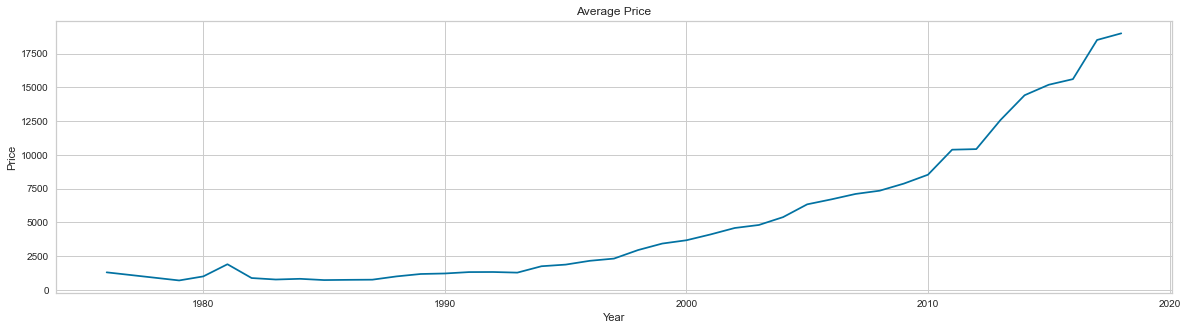

In [178]:
import matplotlib.pyplot 
plt.figure(figsize=(20,5))
plt.plot(uniqueYears, average)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Average Price")
plt.show()

# 1c. Visualisasi rata-rata harga penjualan

In [179]:
uniqueRegion = df["location_region"].unique().tolist()

In [180]:
average=[]
for i in uniqueRegion:
  data = df.loc[df['location_region']== i]
  price = data['price_usd']
  mean = price.mean()
  average.append(mean)
average.sort()

In [181]:
uniqueRegion

['East Midlands',
 'South West',
 'North East',
 'South East',
 'North West',
 'West Midlands']

In [182]:
average

[3792.280777777778,
 4053.9996499999997,
 4216.975710659898,
 4243.205631067961,
 4570.436465517241,
 5511.688650065531]

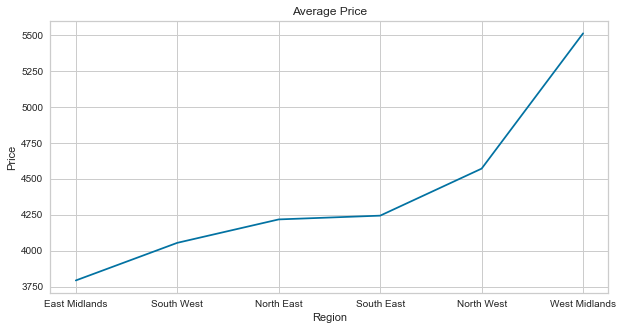

In [183]:
import matplotlib.pyplot 
plt.figure(figsize=(10,5))
plt.plot(uniqueRegion, average)
plt.xlabel("Region")
plt.ylabel("Price")
plt.title("Average Price")
plt.show()

Berdasarkan visualisasi di atas, dapat kita lihat bahwa daerah yang memiliki rata-rata harga penjualan paling tinggi adalah **West Midlands** dan daerah dengan rata-rata harga penjualan terendah adalah **East Midlands**.

# 1.d Apakah ada karakteristik tertentu untuk mobil yang bersifat exchangeable?

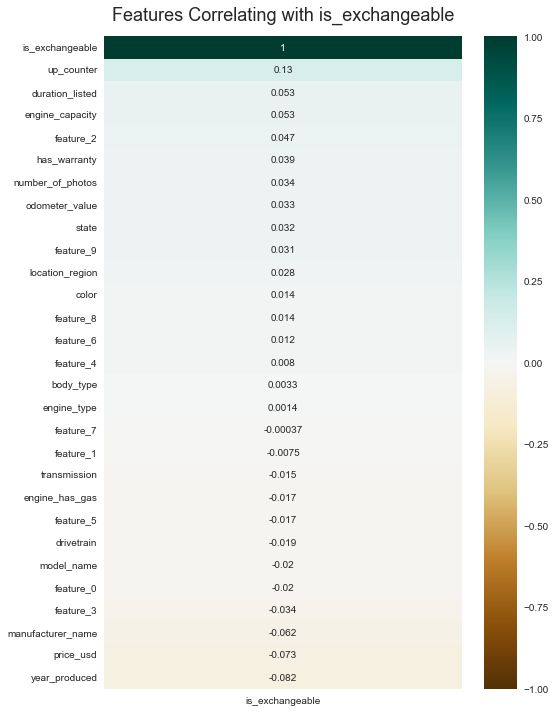

In [185]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_cleaned.corr()[['is_exchangeable']].sort_values(by='is_exchangeable', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with is_exchangeable', fontdict={'fontsize':18}, pad=16);

Berdasarkan hasil heatmap di atas, kami akan menentukan karakteristik untuk mobil yang bersifat exchangeable berdasarkan atribut yang memiliki korelasi positif dengan is_exchangeable antara lain up_counter, duration_listed, engine_capacity, feature_2, has_warranty, number_of_photos, odometer_value, state, feature_9, location_region, color,  feature_8, feature_6, feature_4, body_type, dan engine_type. Atribut seperti up_counter, duration_listed, dan number_of_photos kami anggap tidak mempengaruhi sifat exchangeable karena hal yang menentukan apakah suatu mobil dapat ditukar-tambahkan melekat pada karakteristik dari mobil tersebut atau keinginan pemilik mobil.

In [186]:
df_exc = df.drop(columns='is_exchangeable')
df_exchangeable = df_exc.loc[df['is_exchangeable']==True]
df_exchangeable.shape[0]
exc_col = df_exchangeable[['engine_capacity', 'feature_2', 'has_warranty', 'state', 'feature_9', 
                          'location_region', 'color', 'feature_8', 'feature_6', 'feature_4', 'body_type', 'engine_type']]

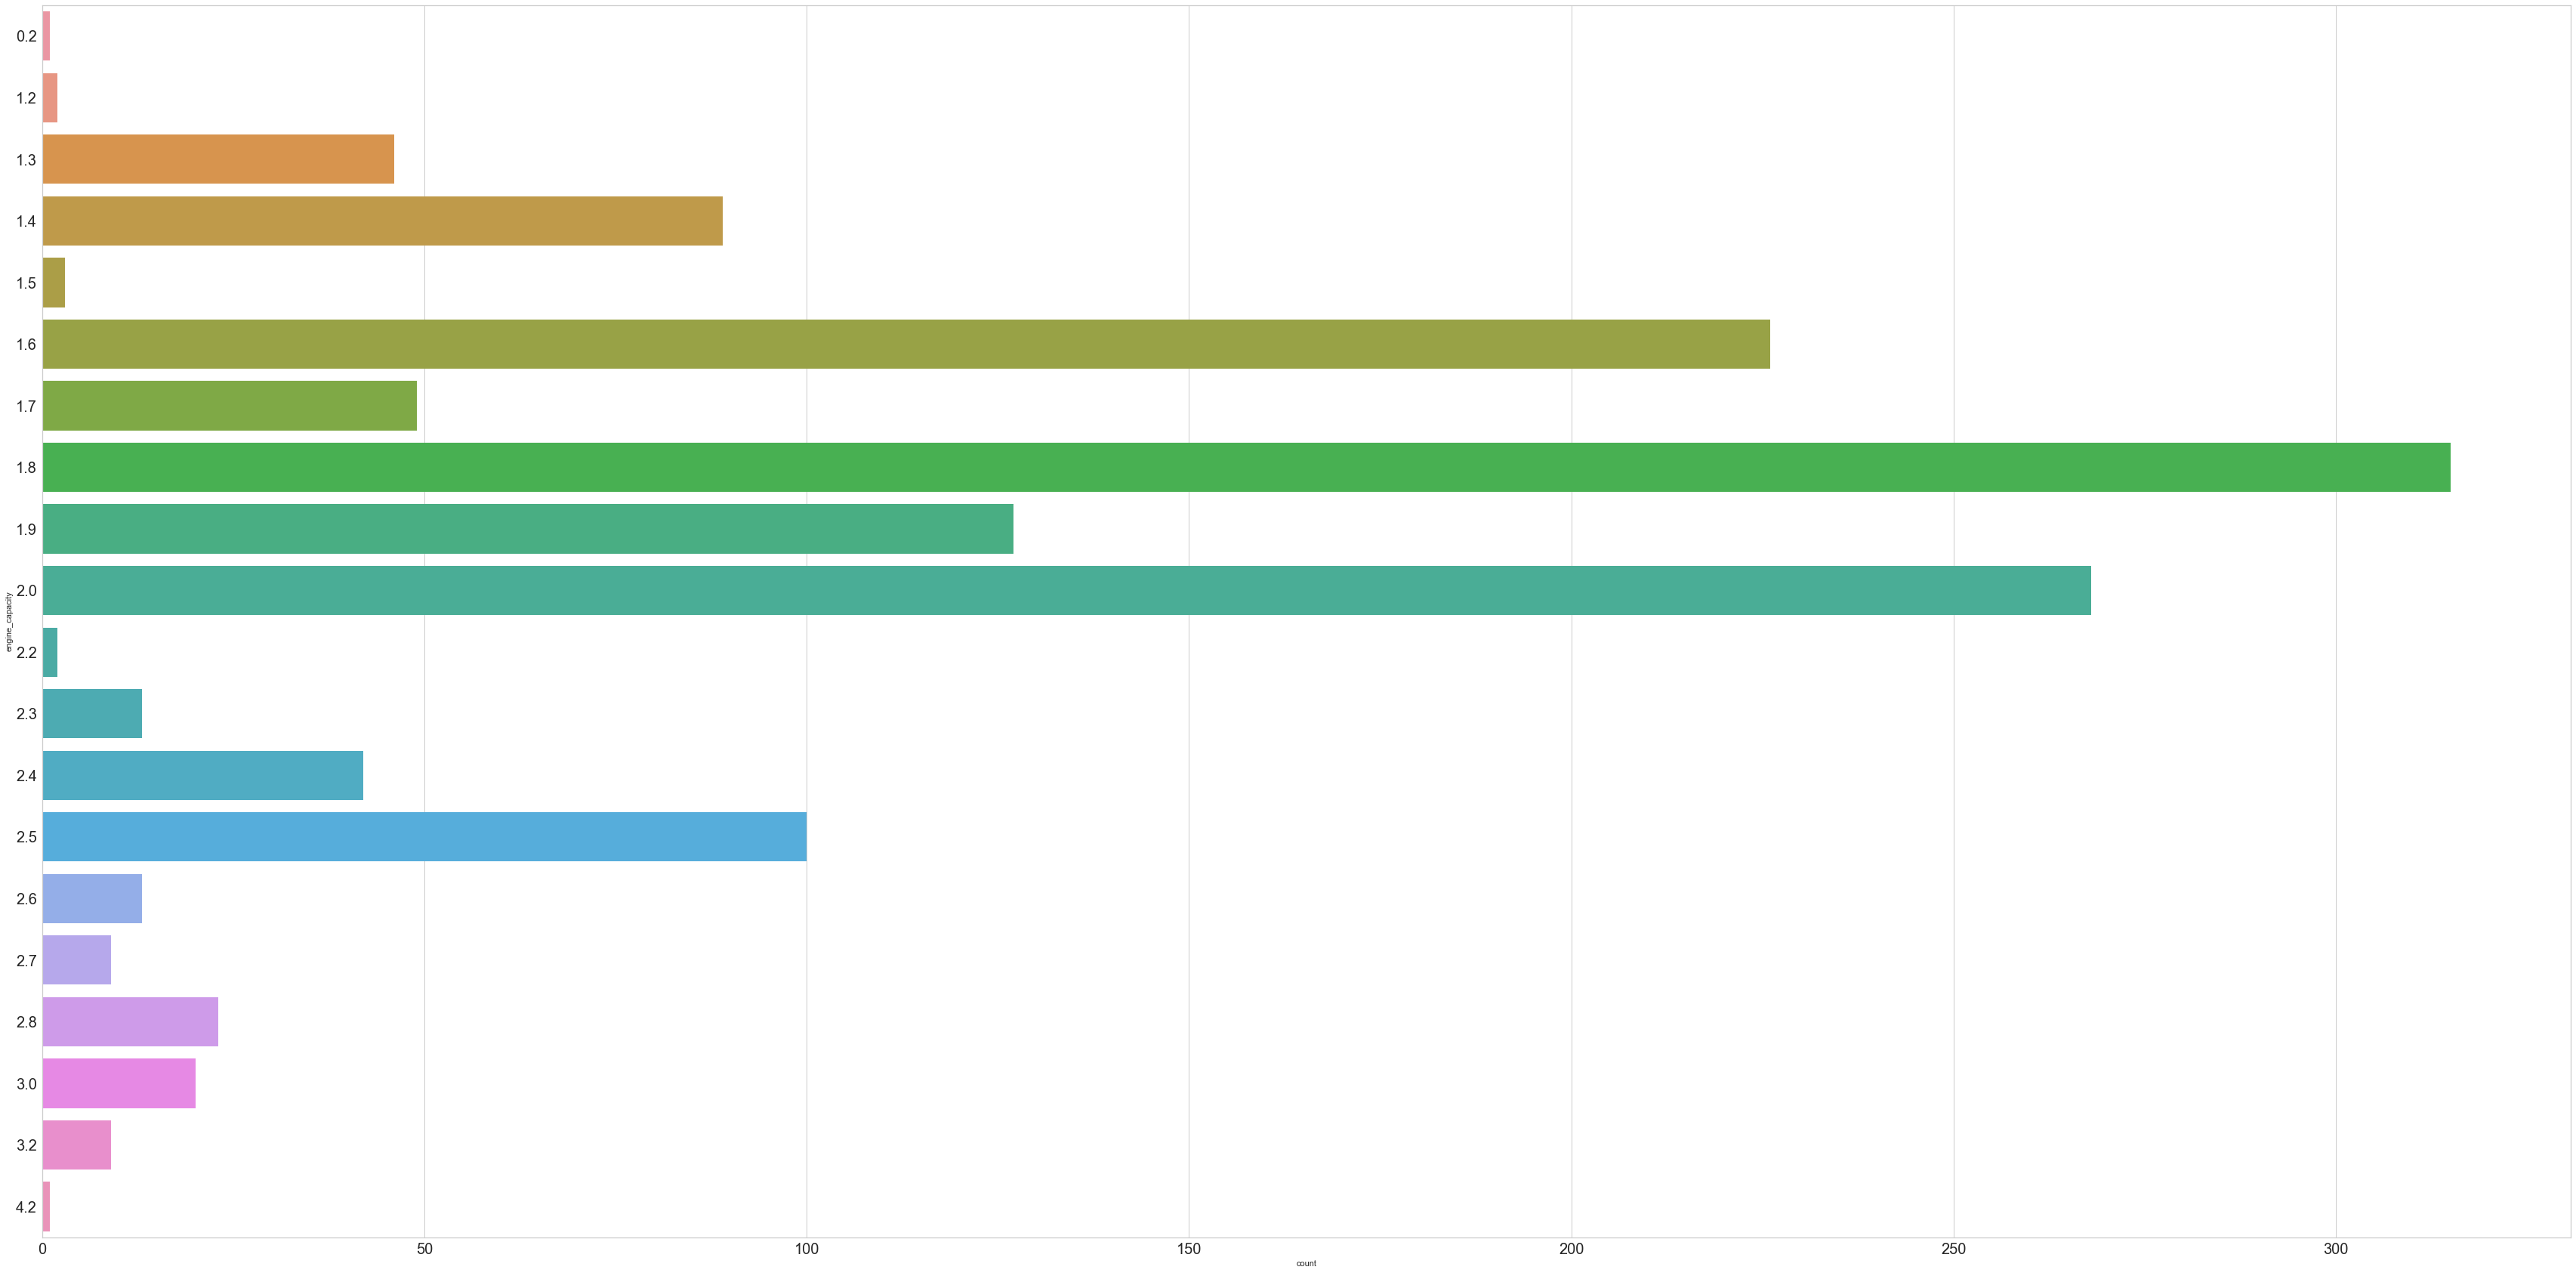

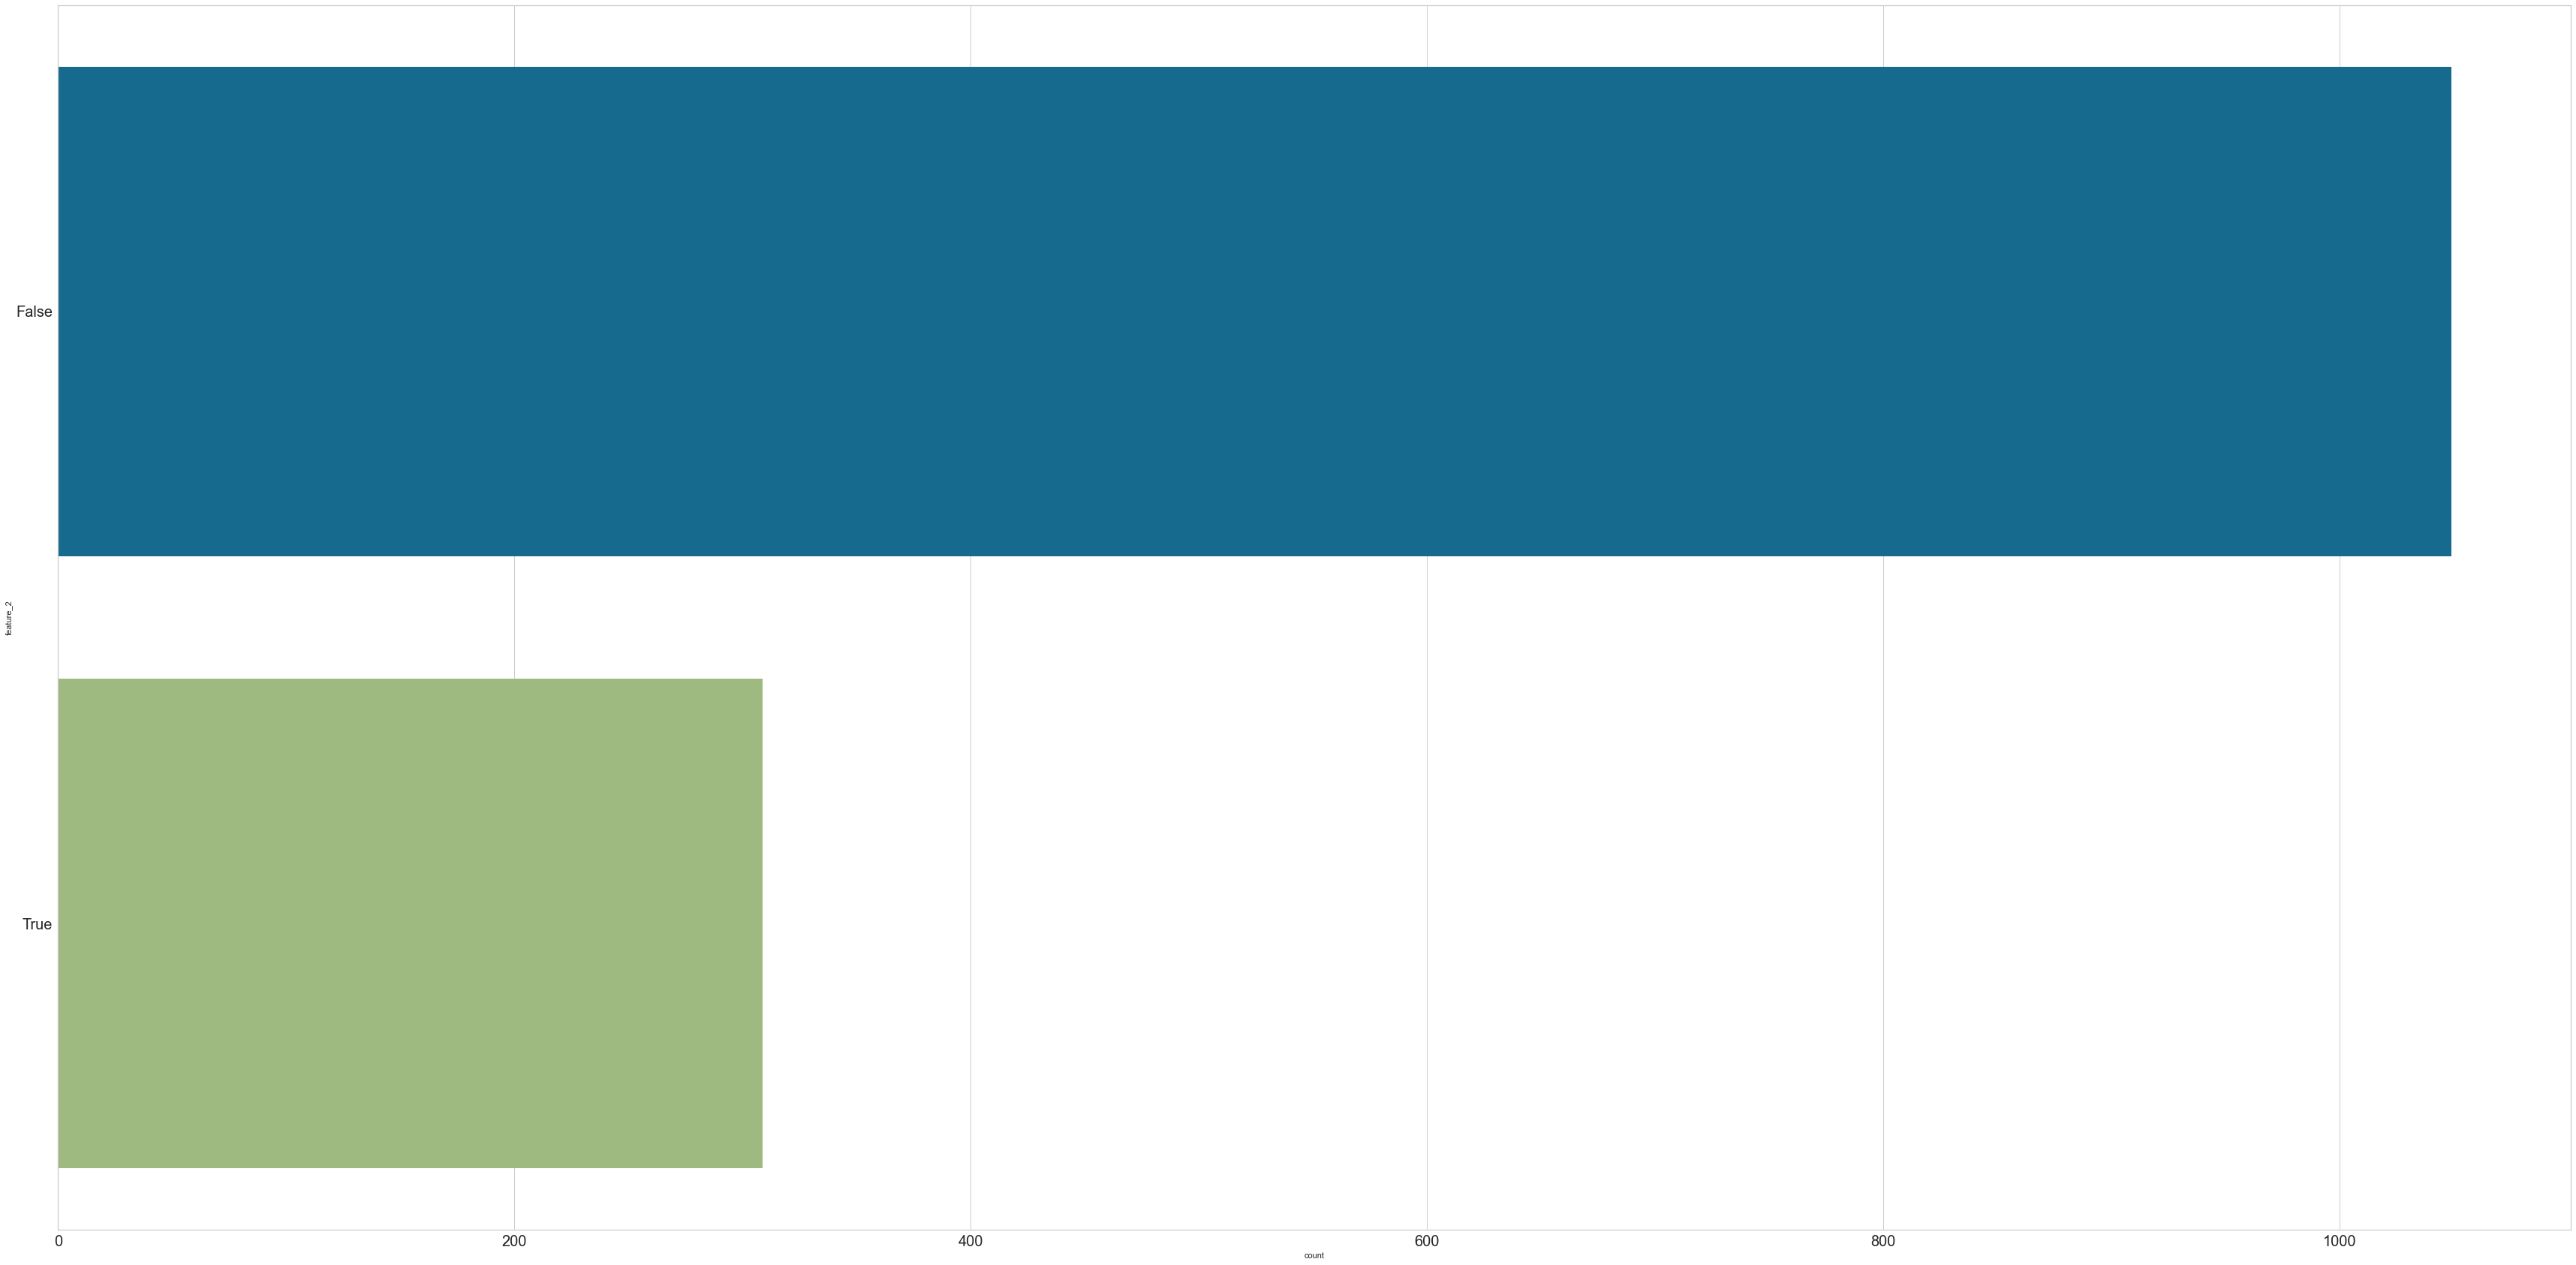

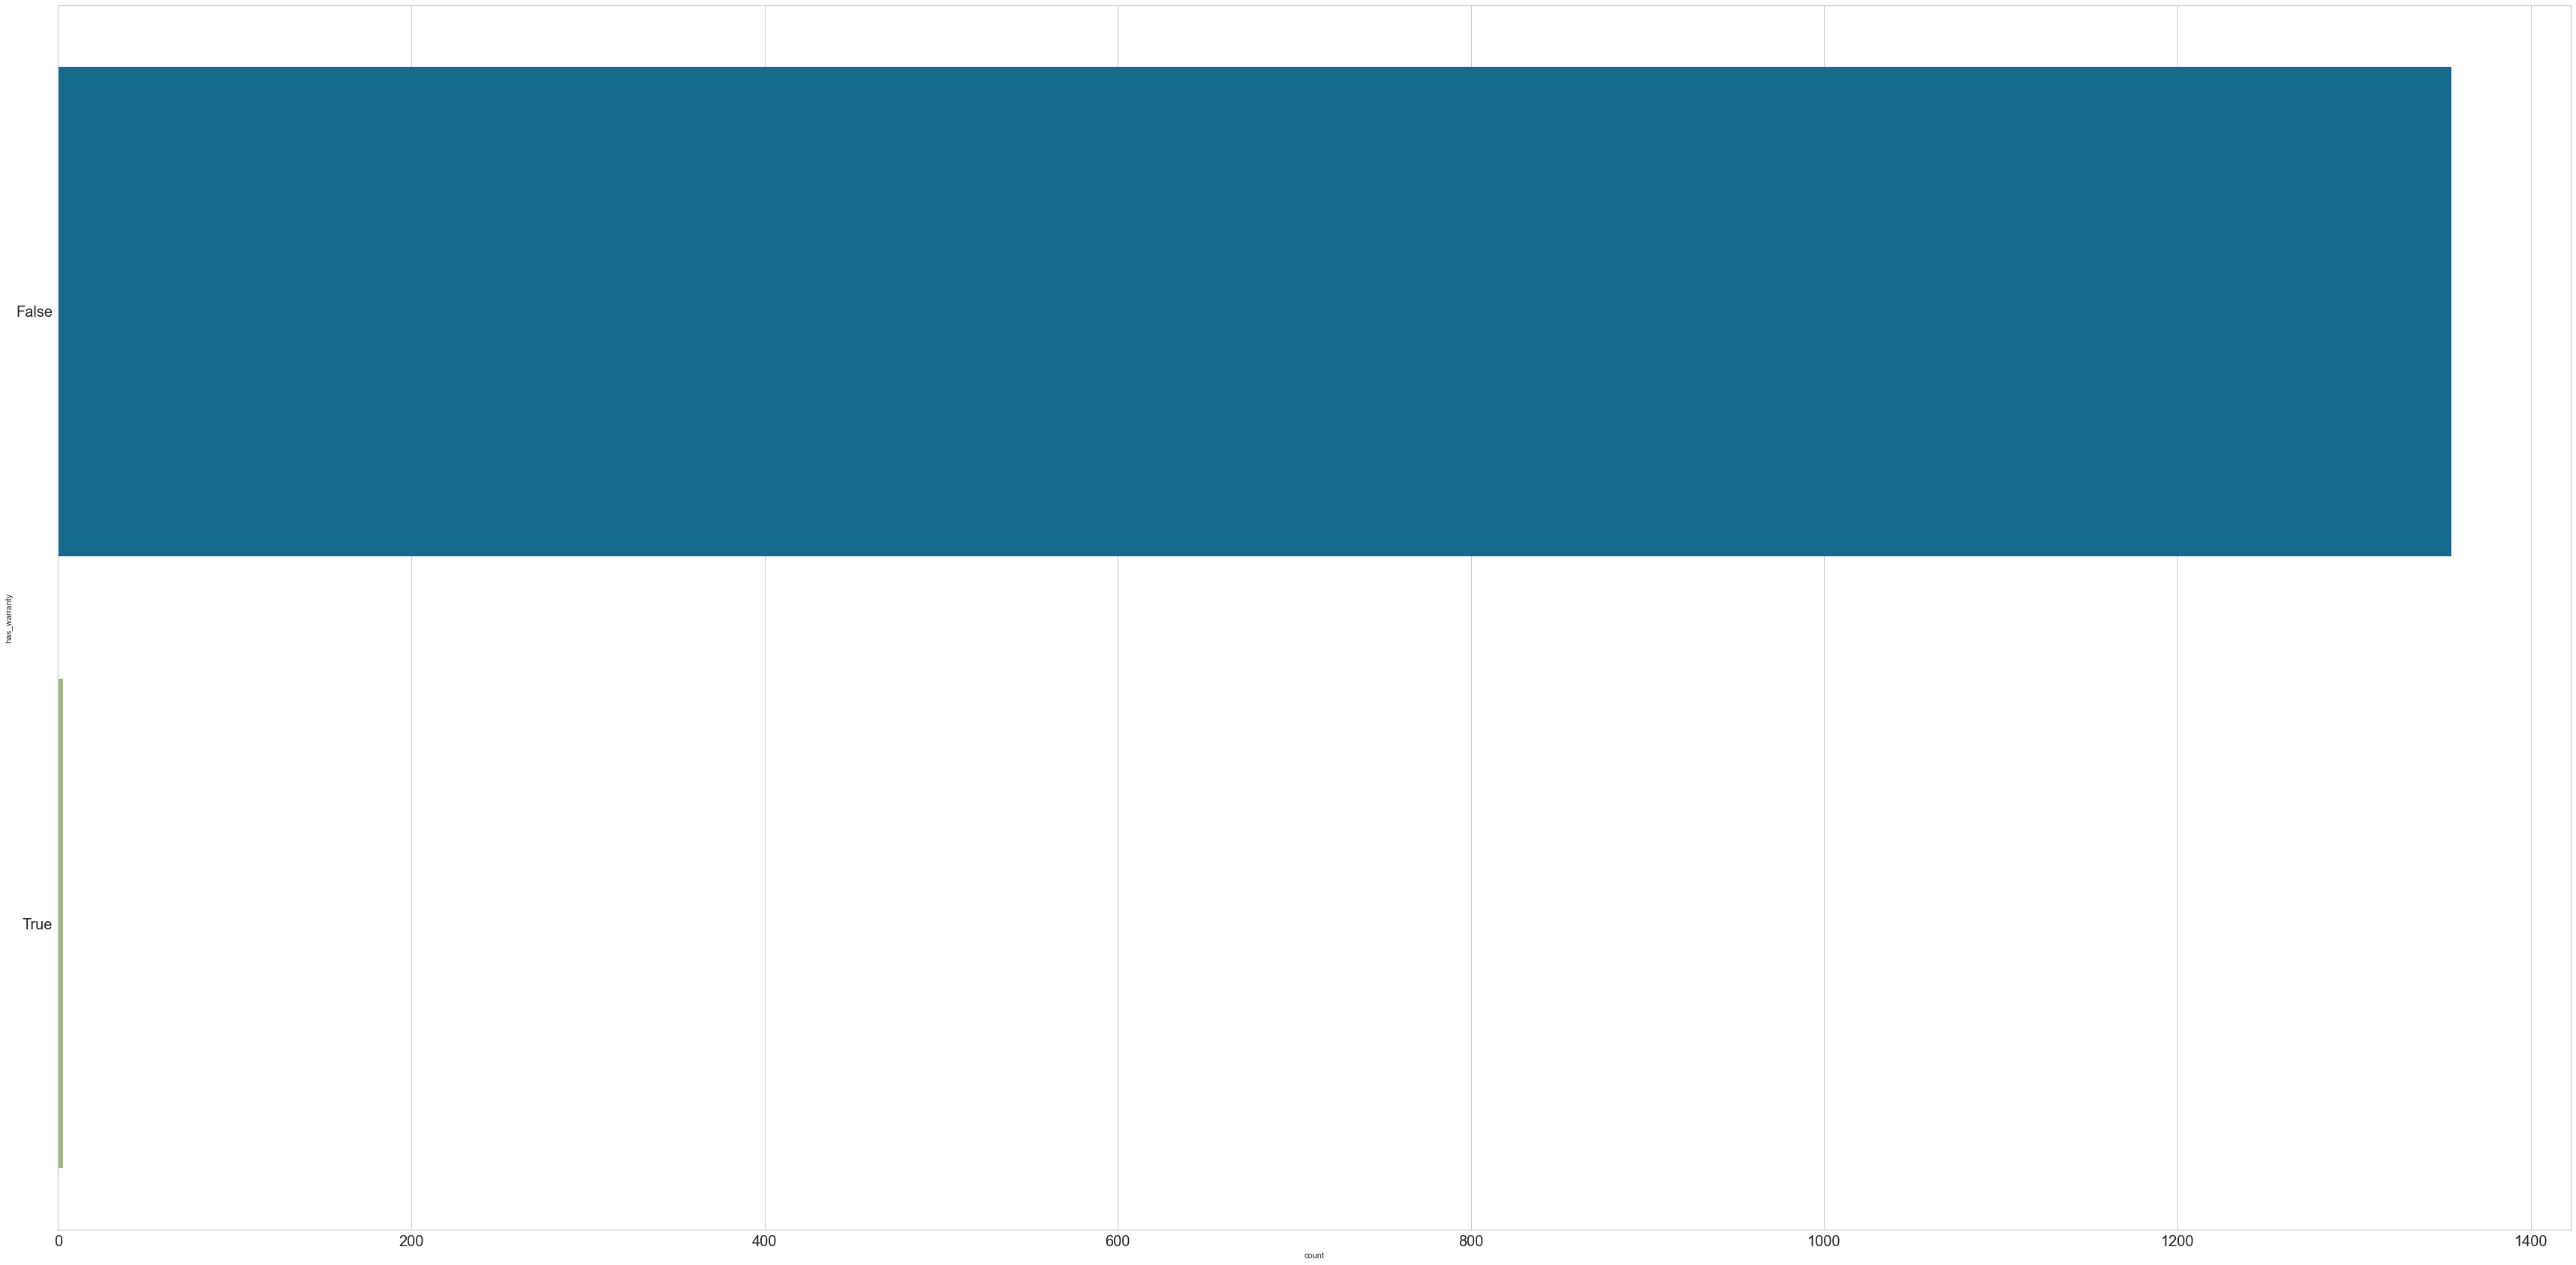

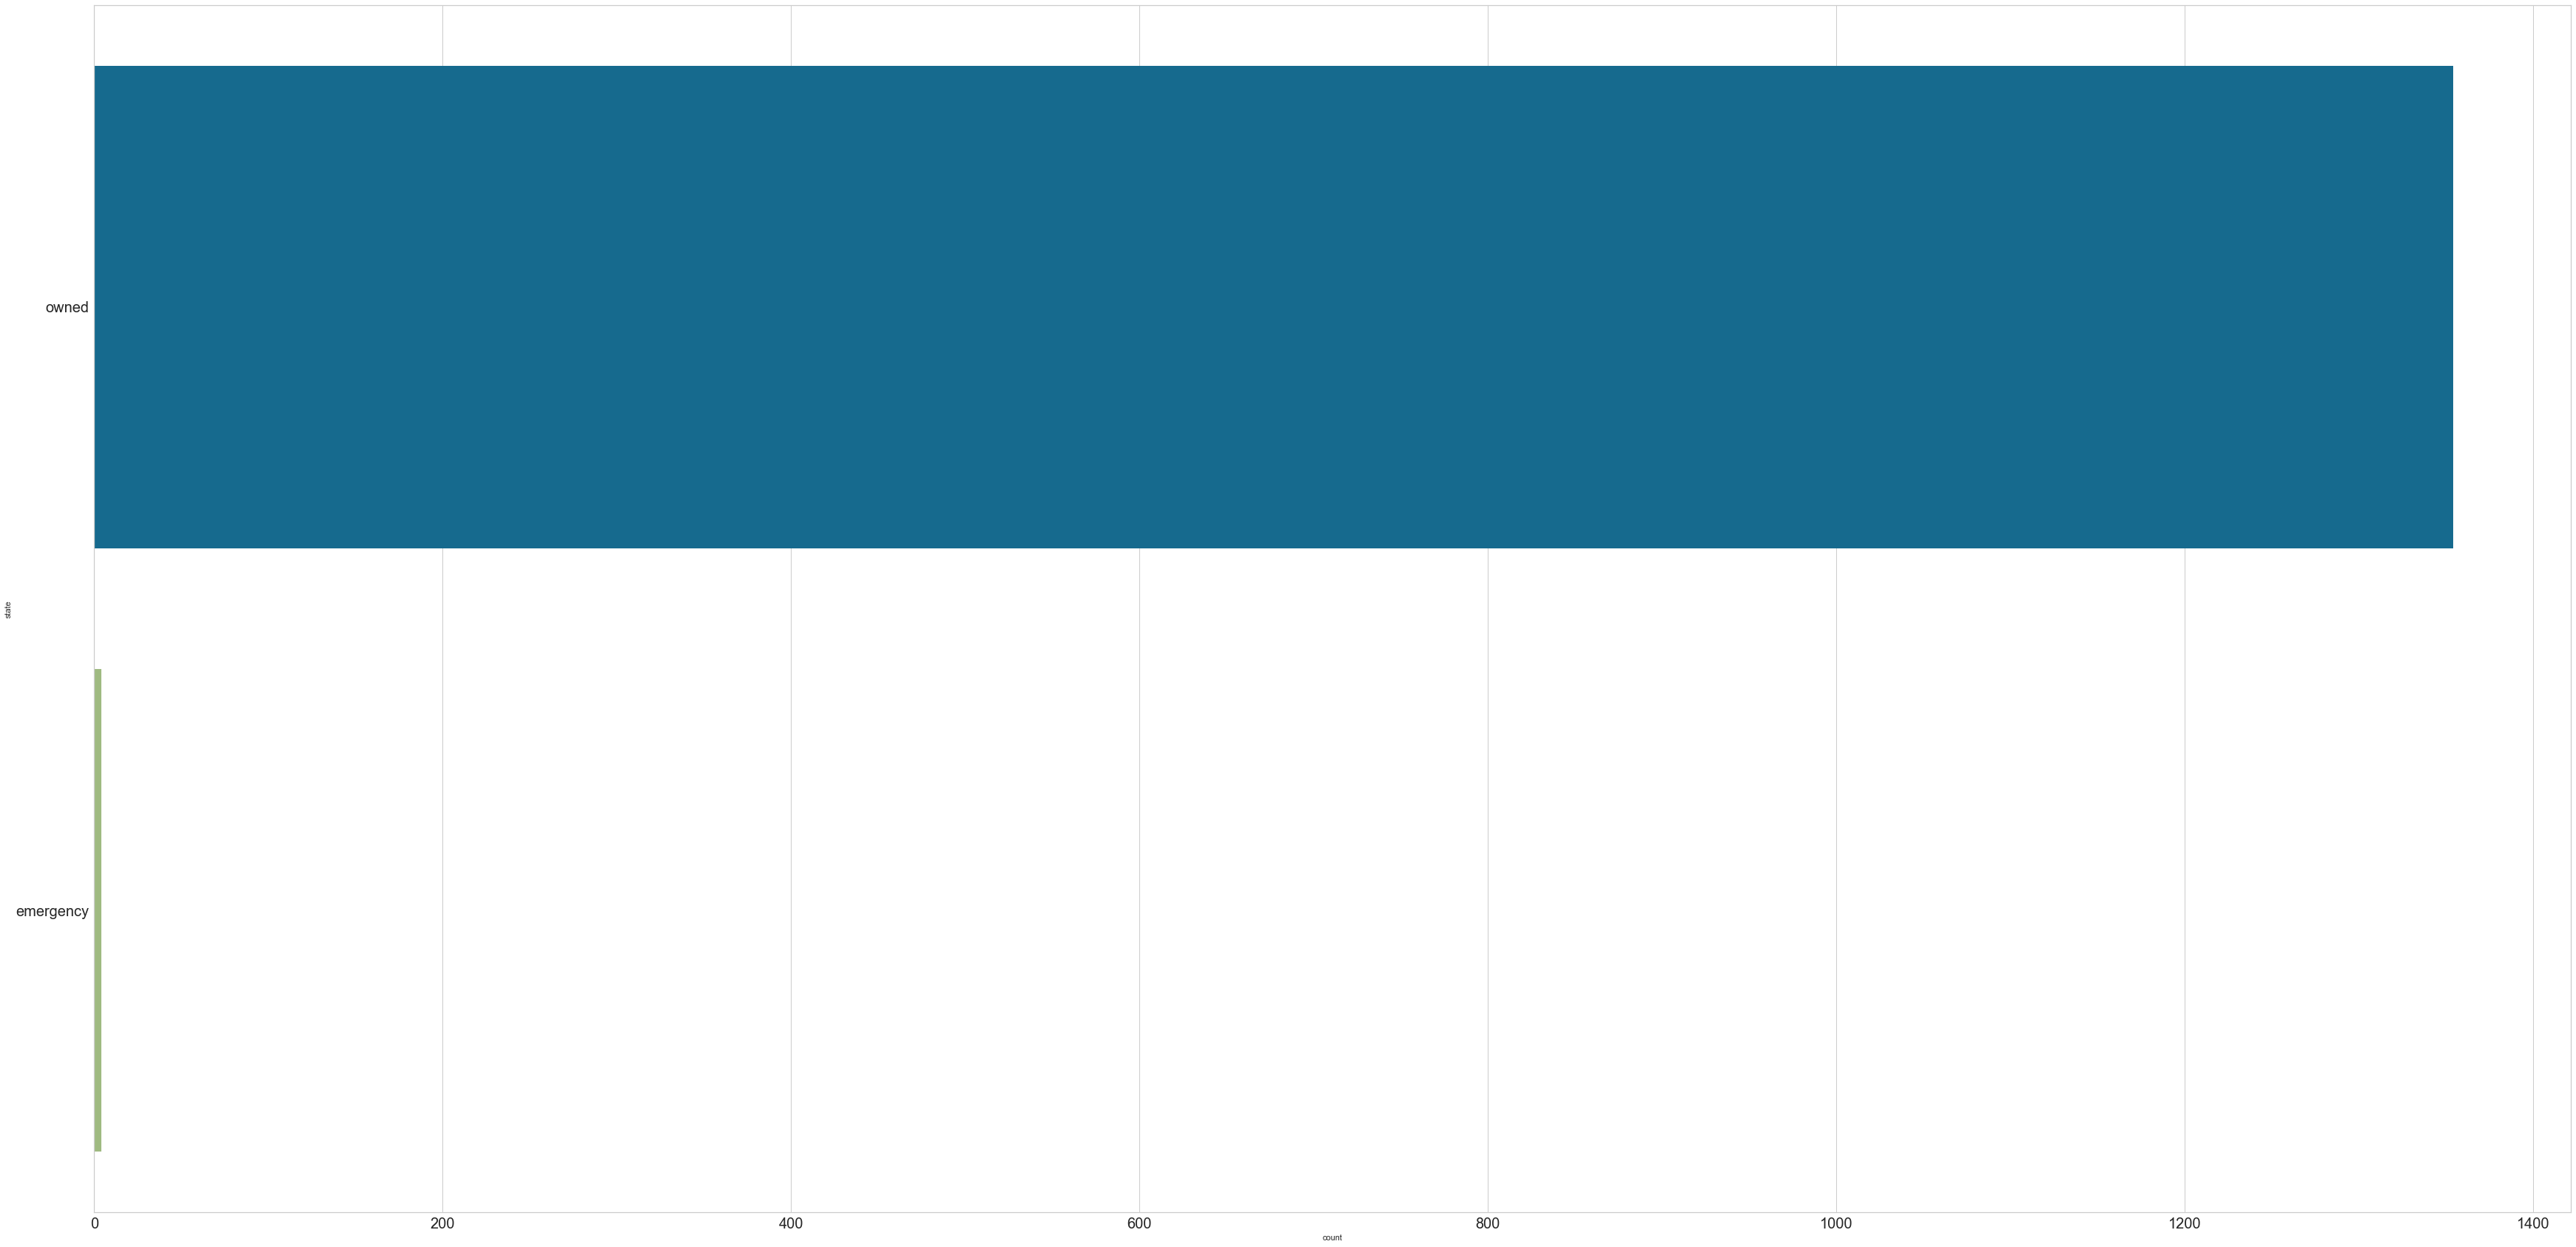

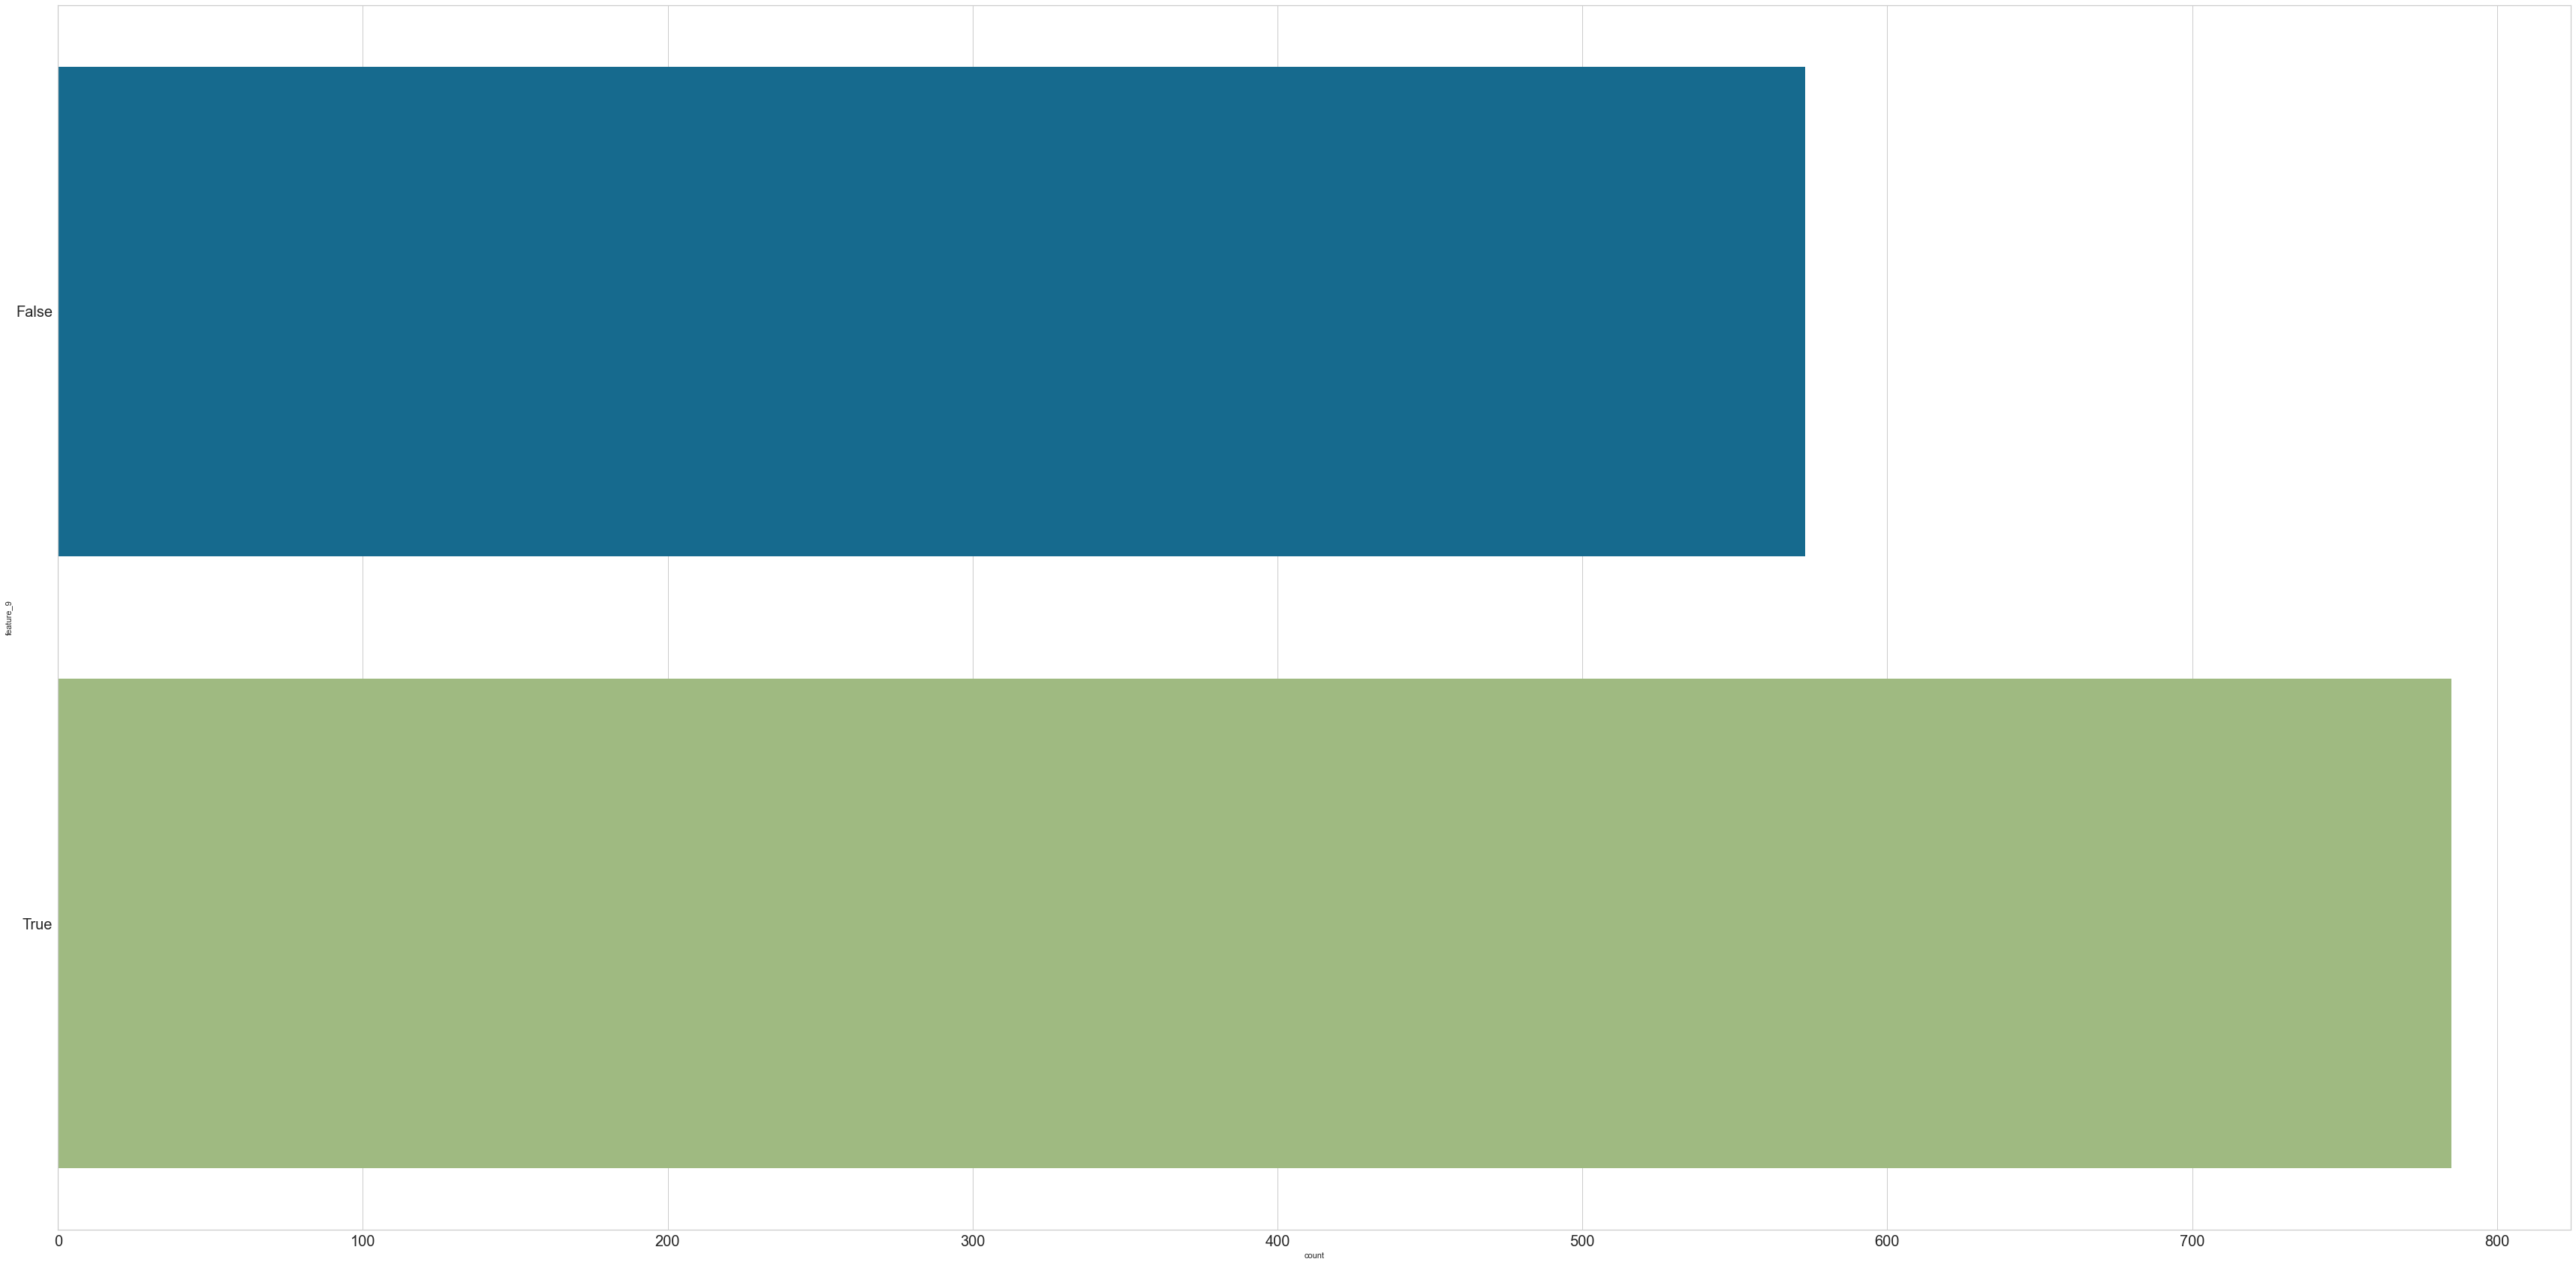

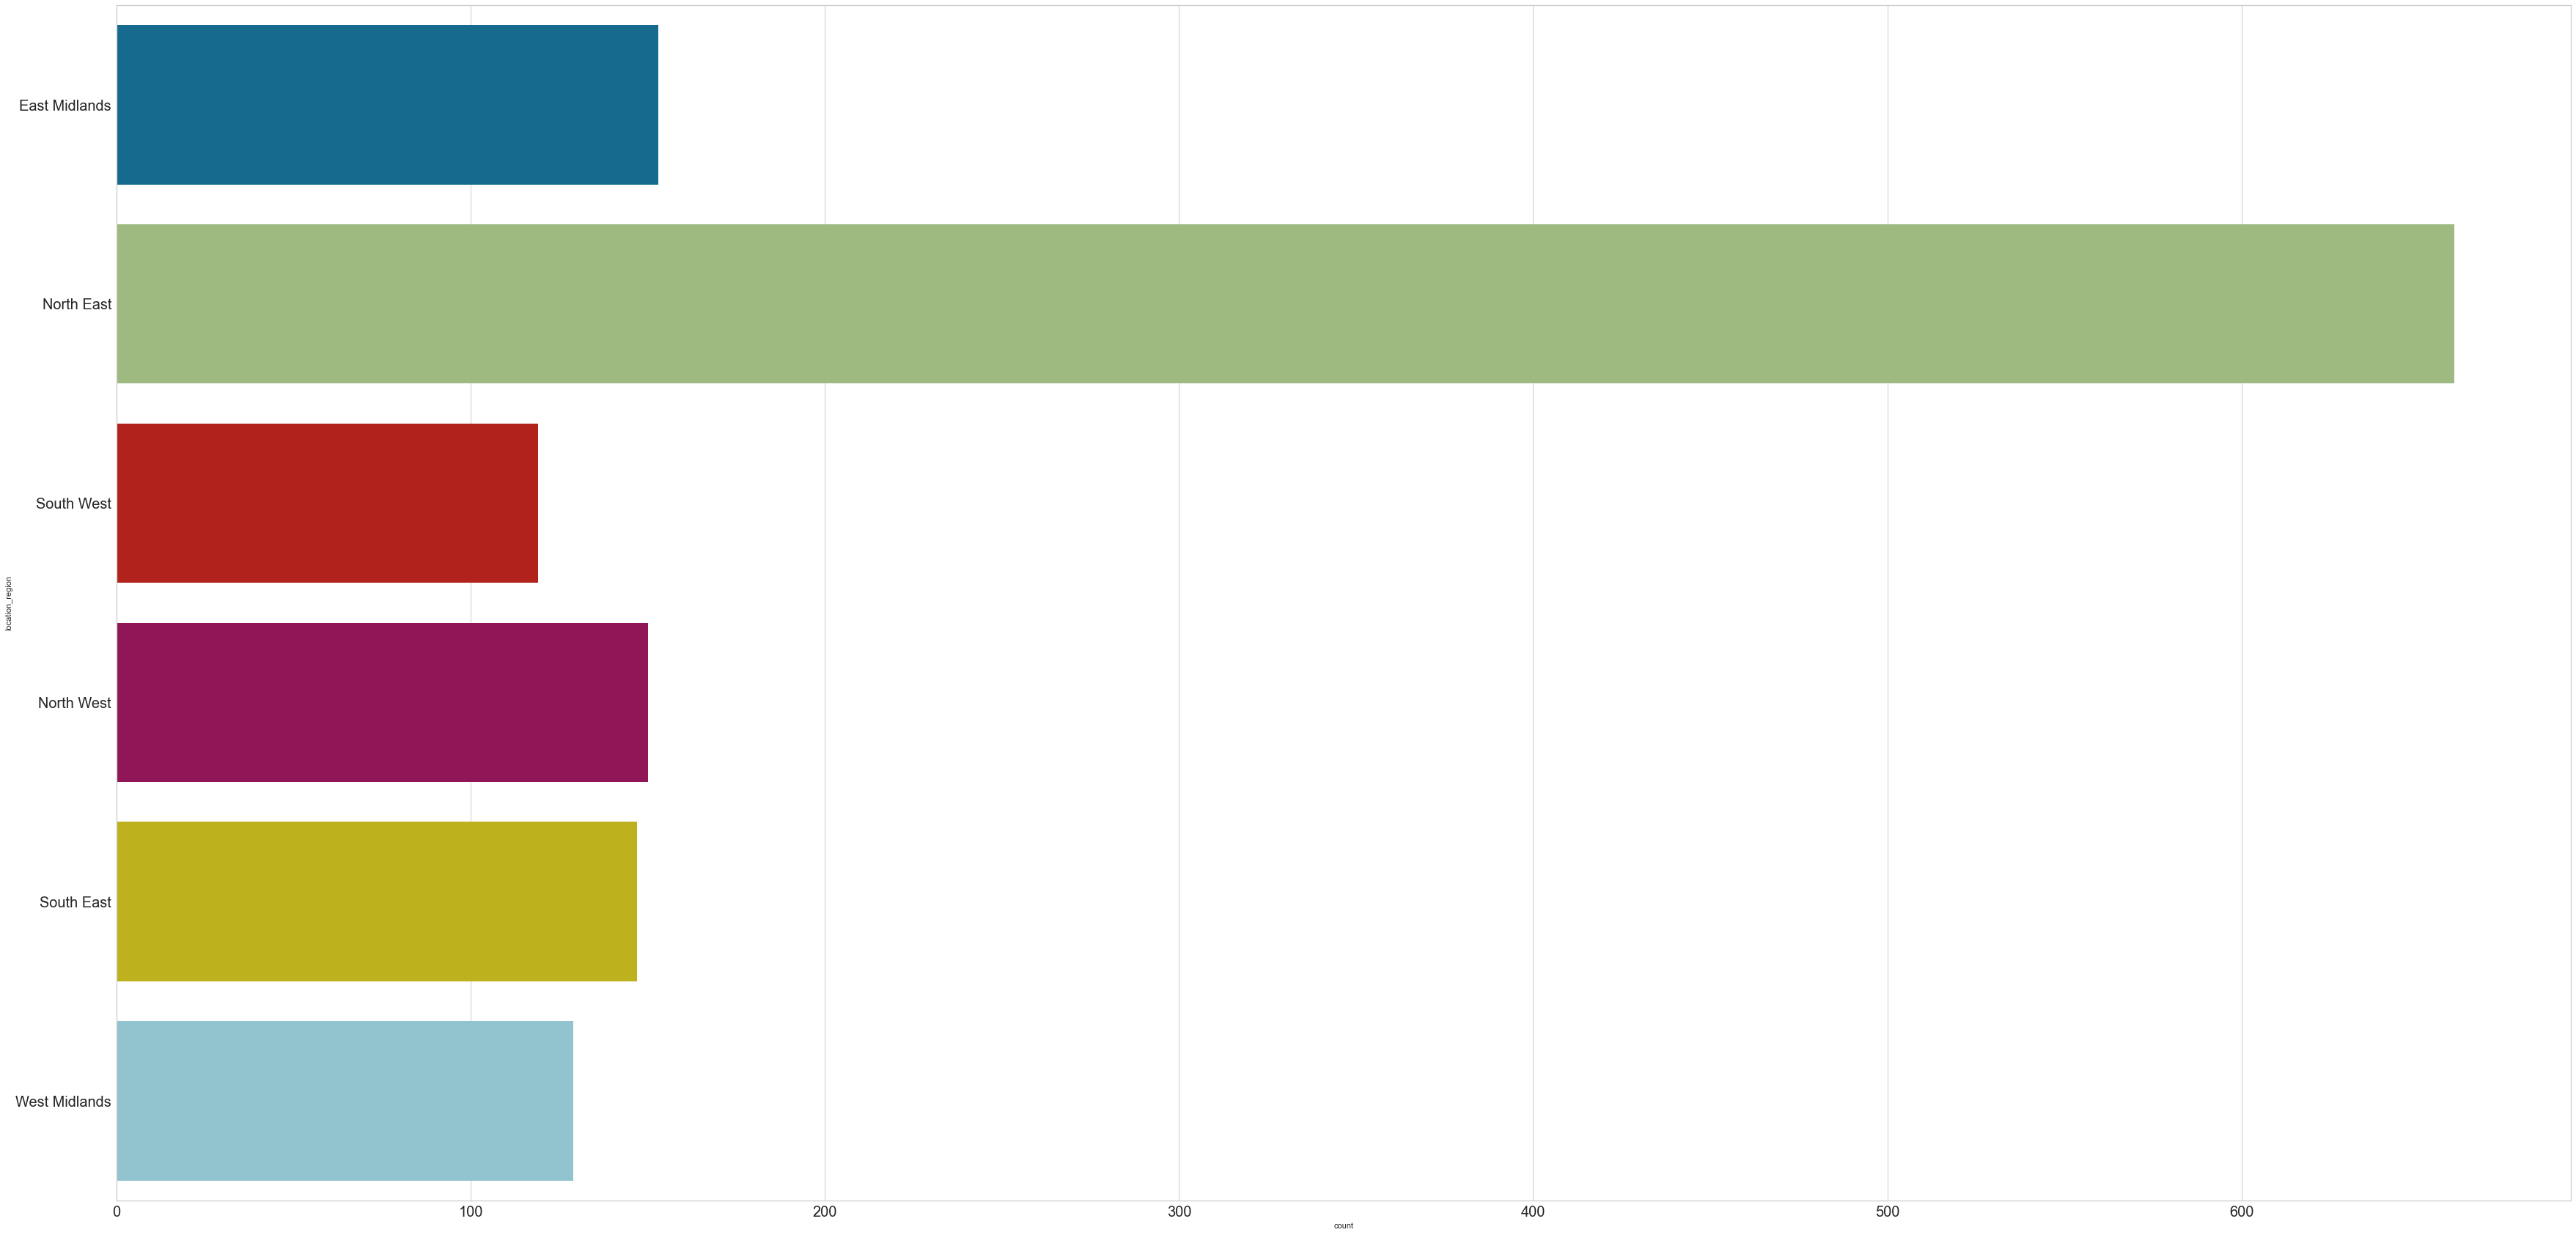

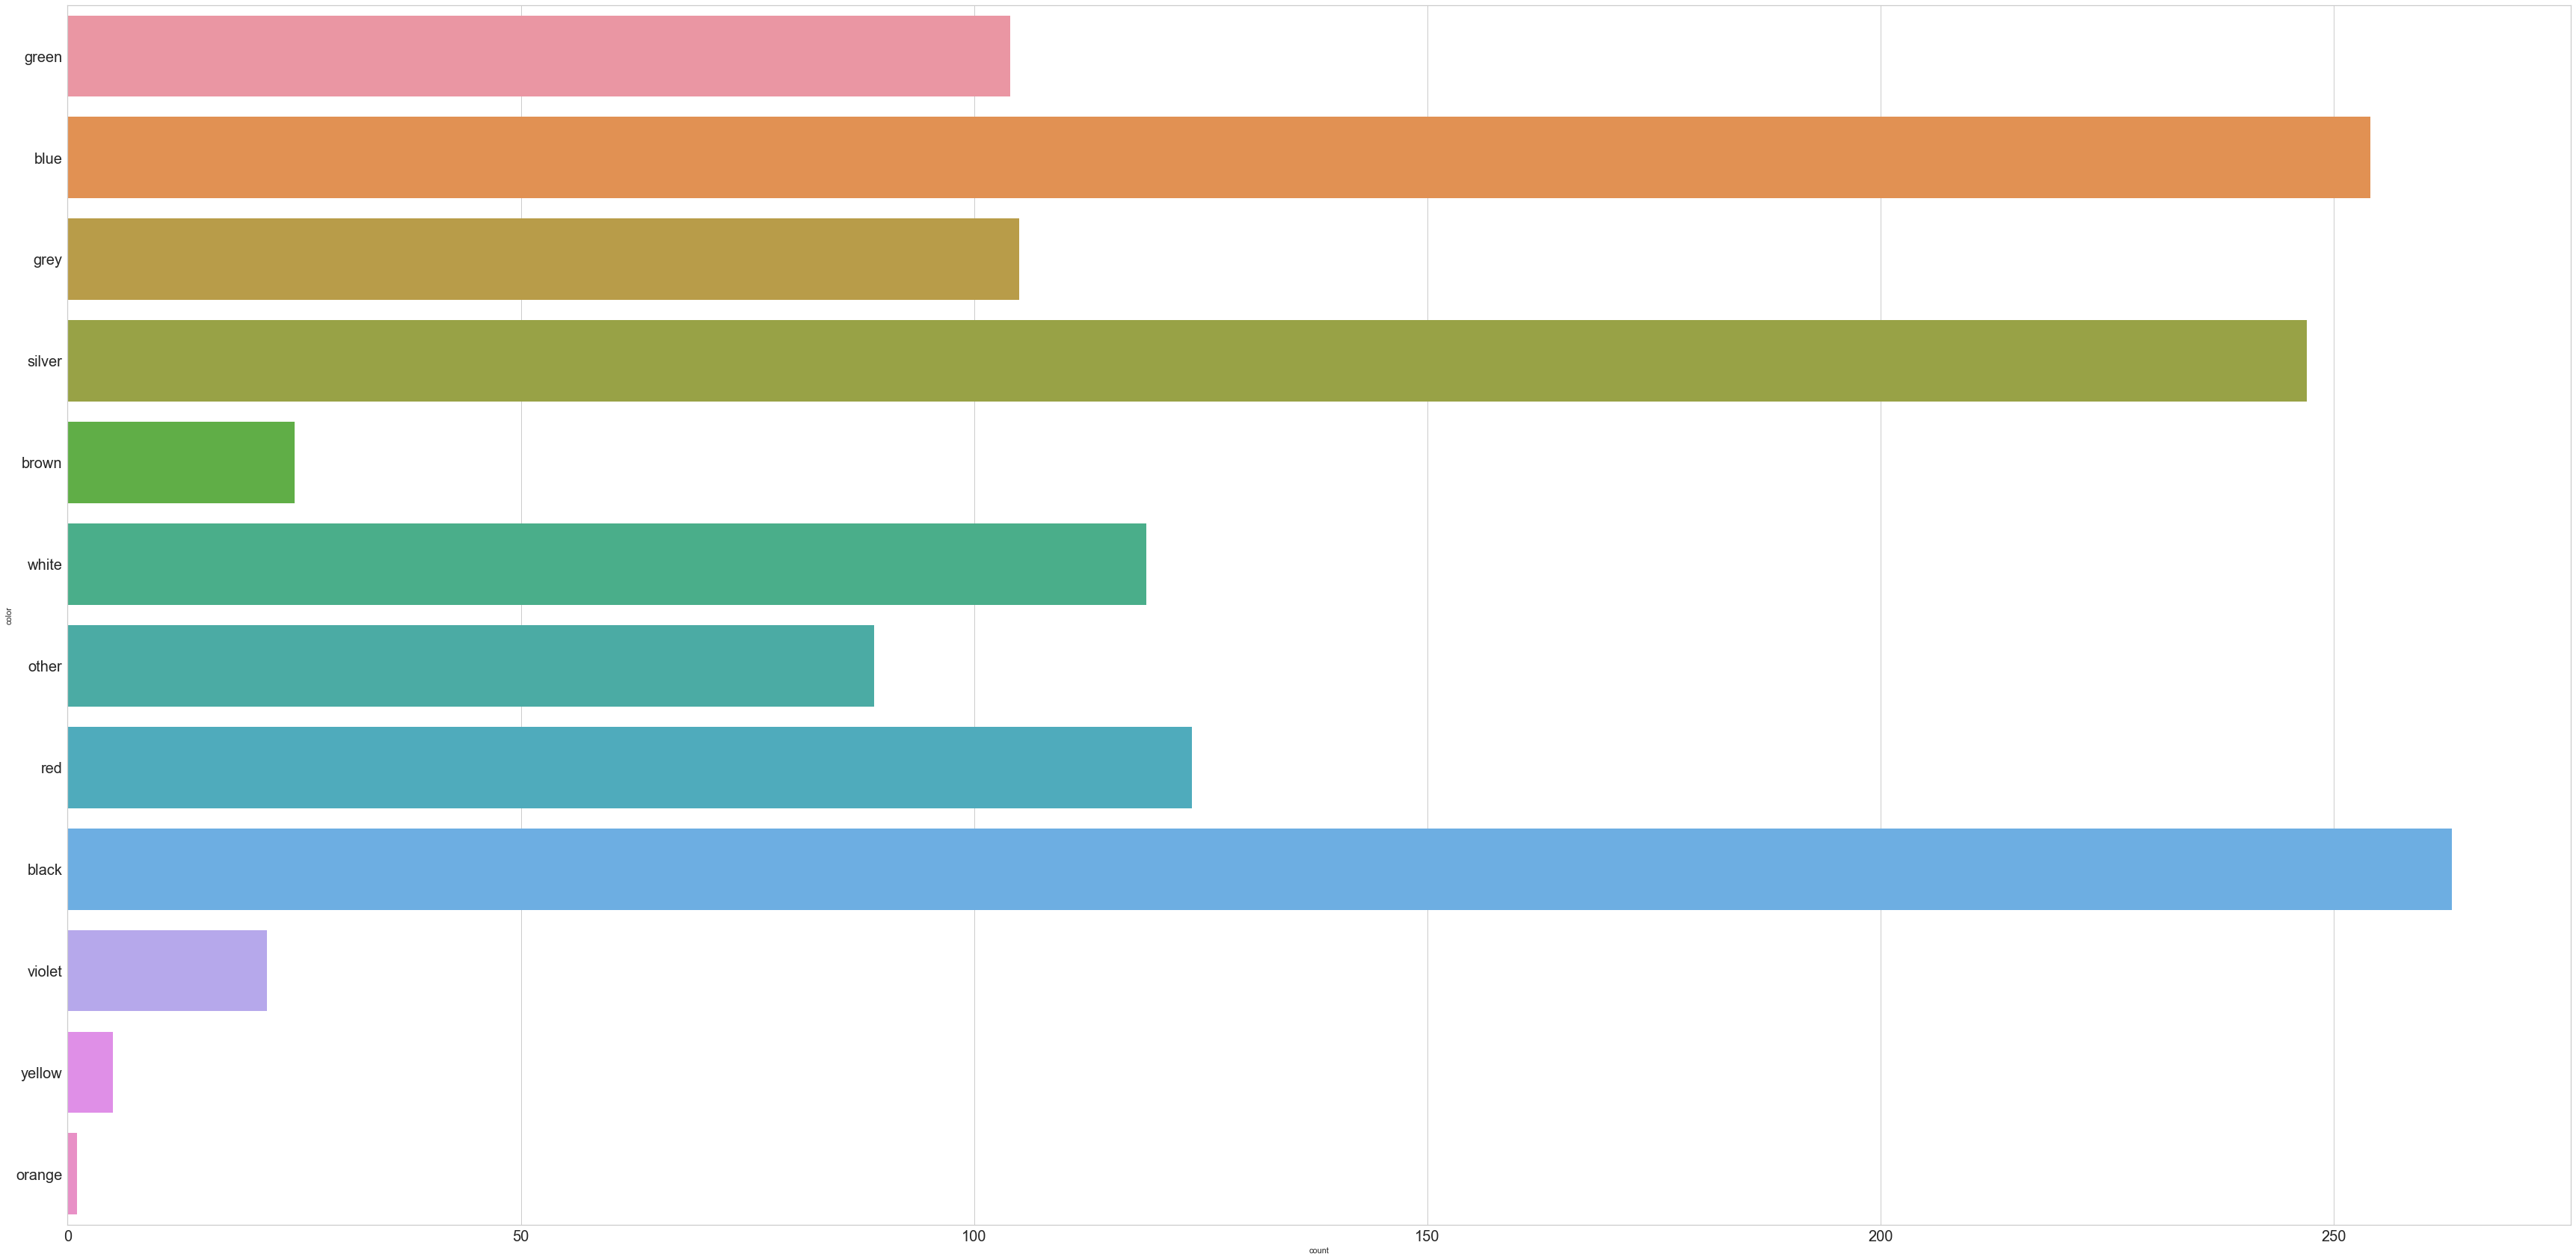

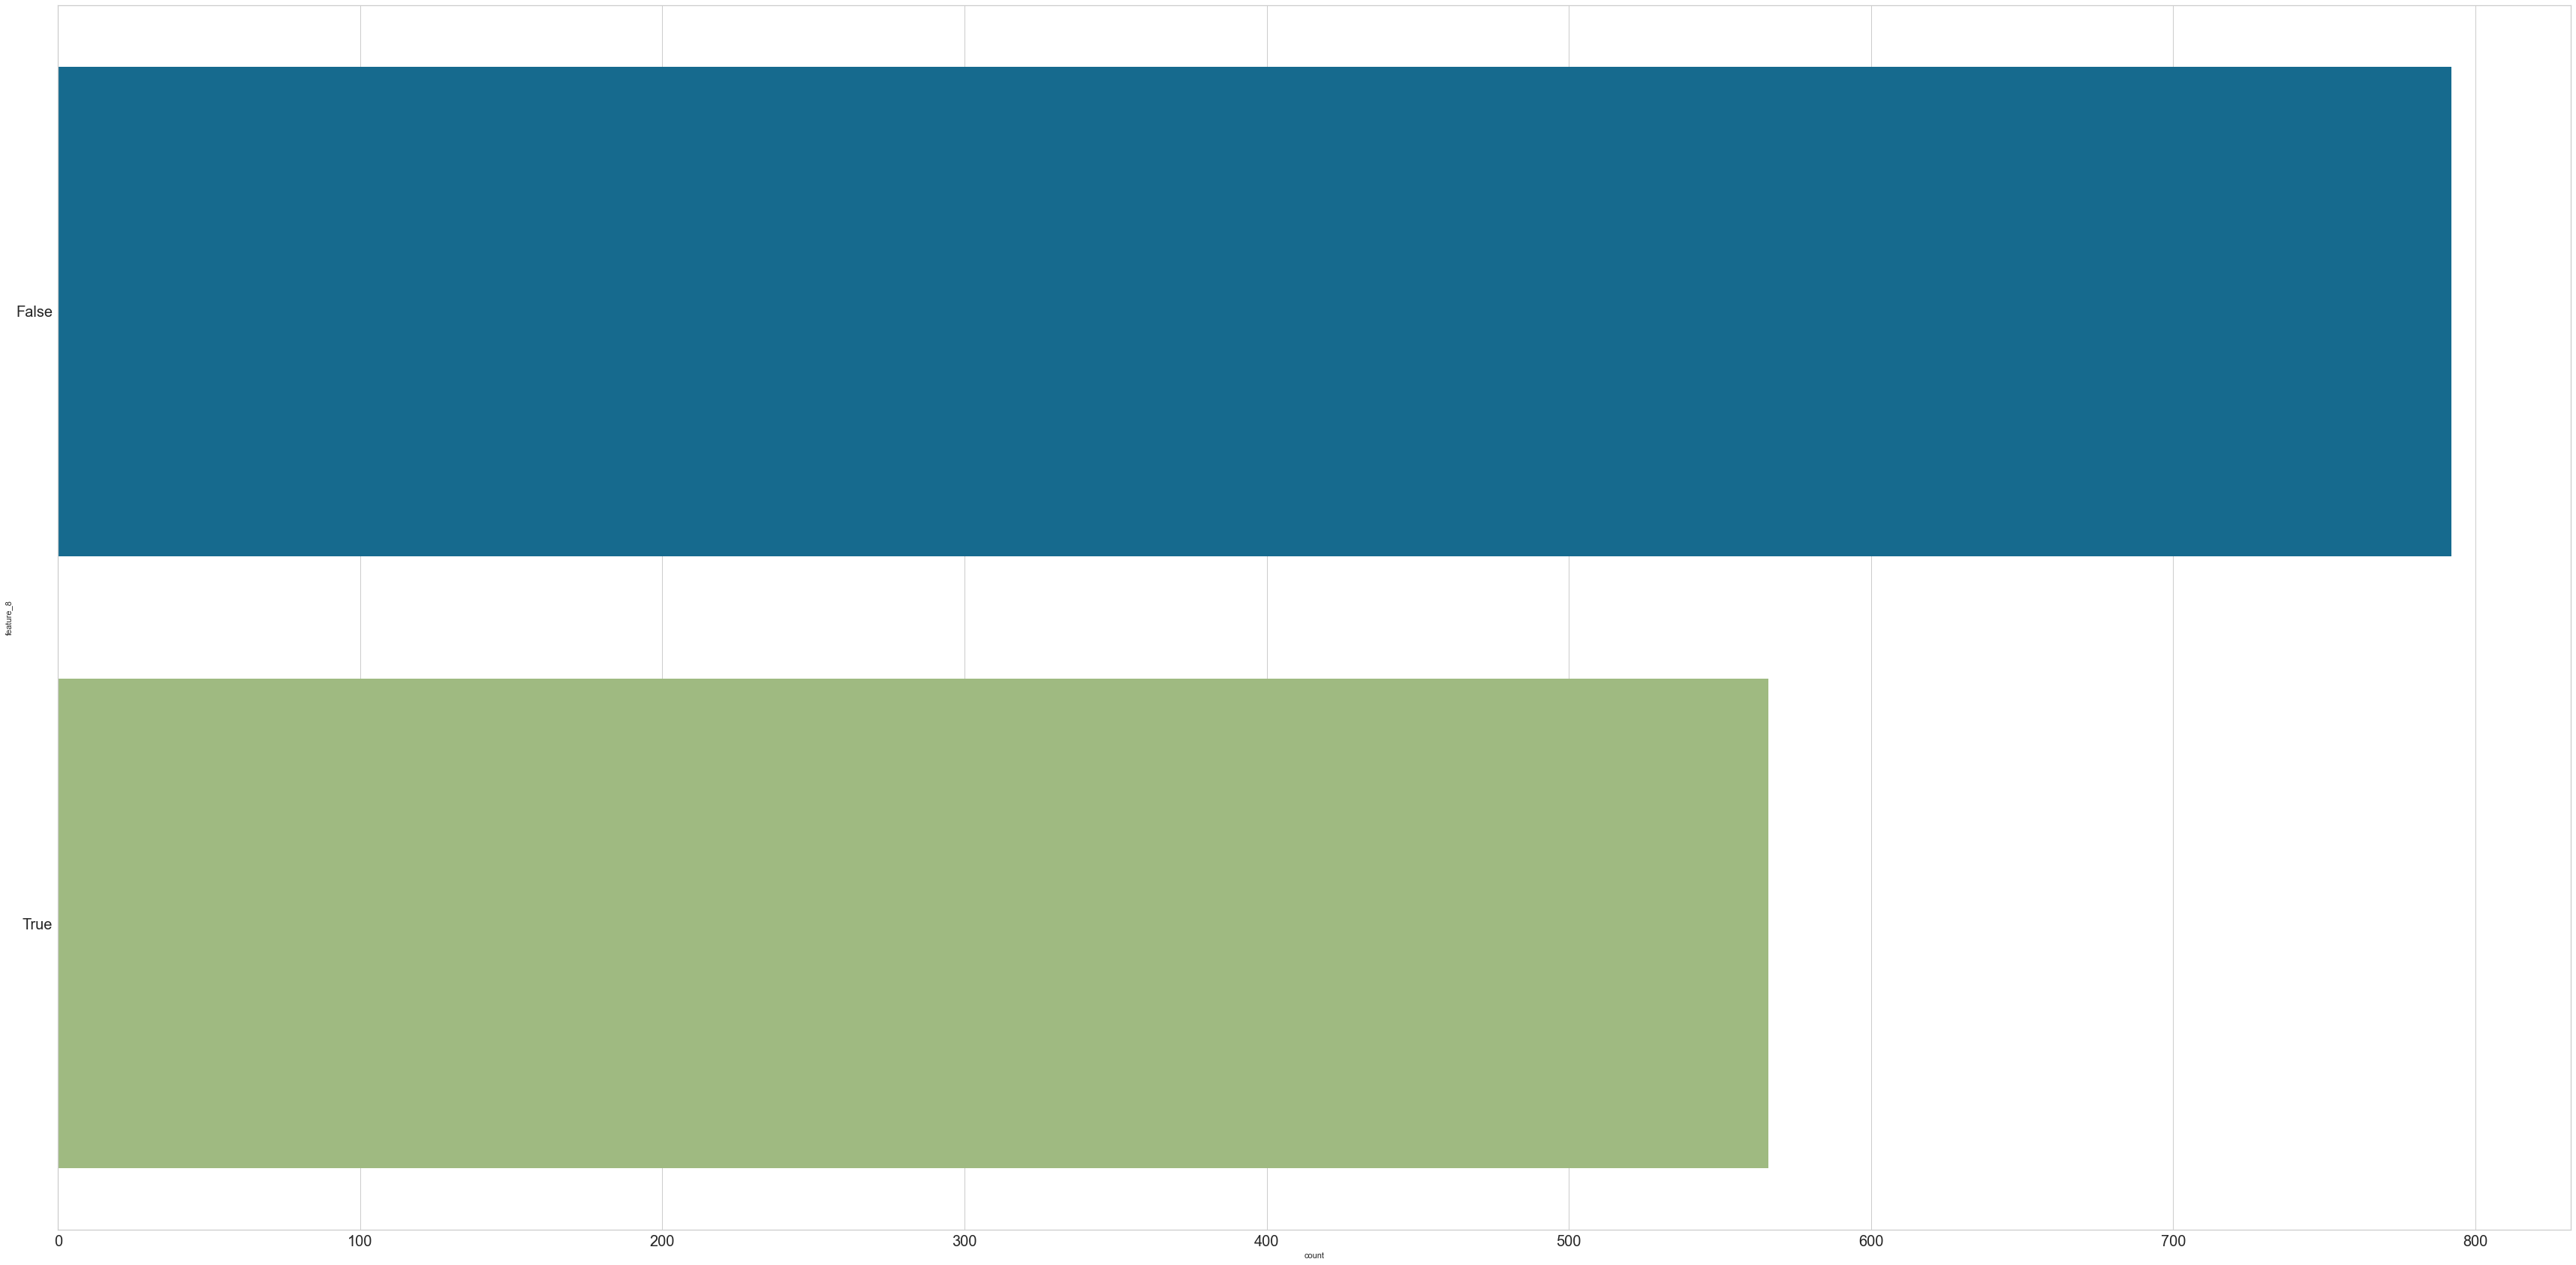

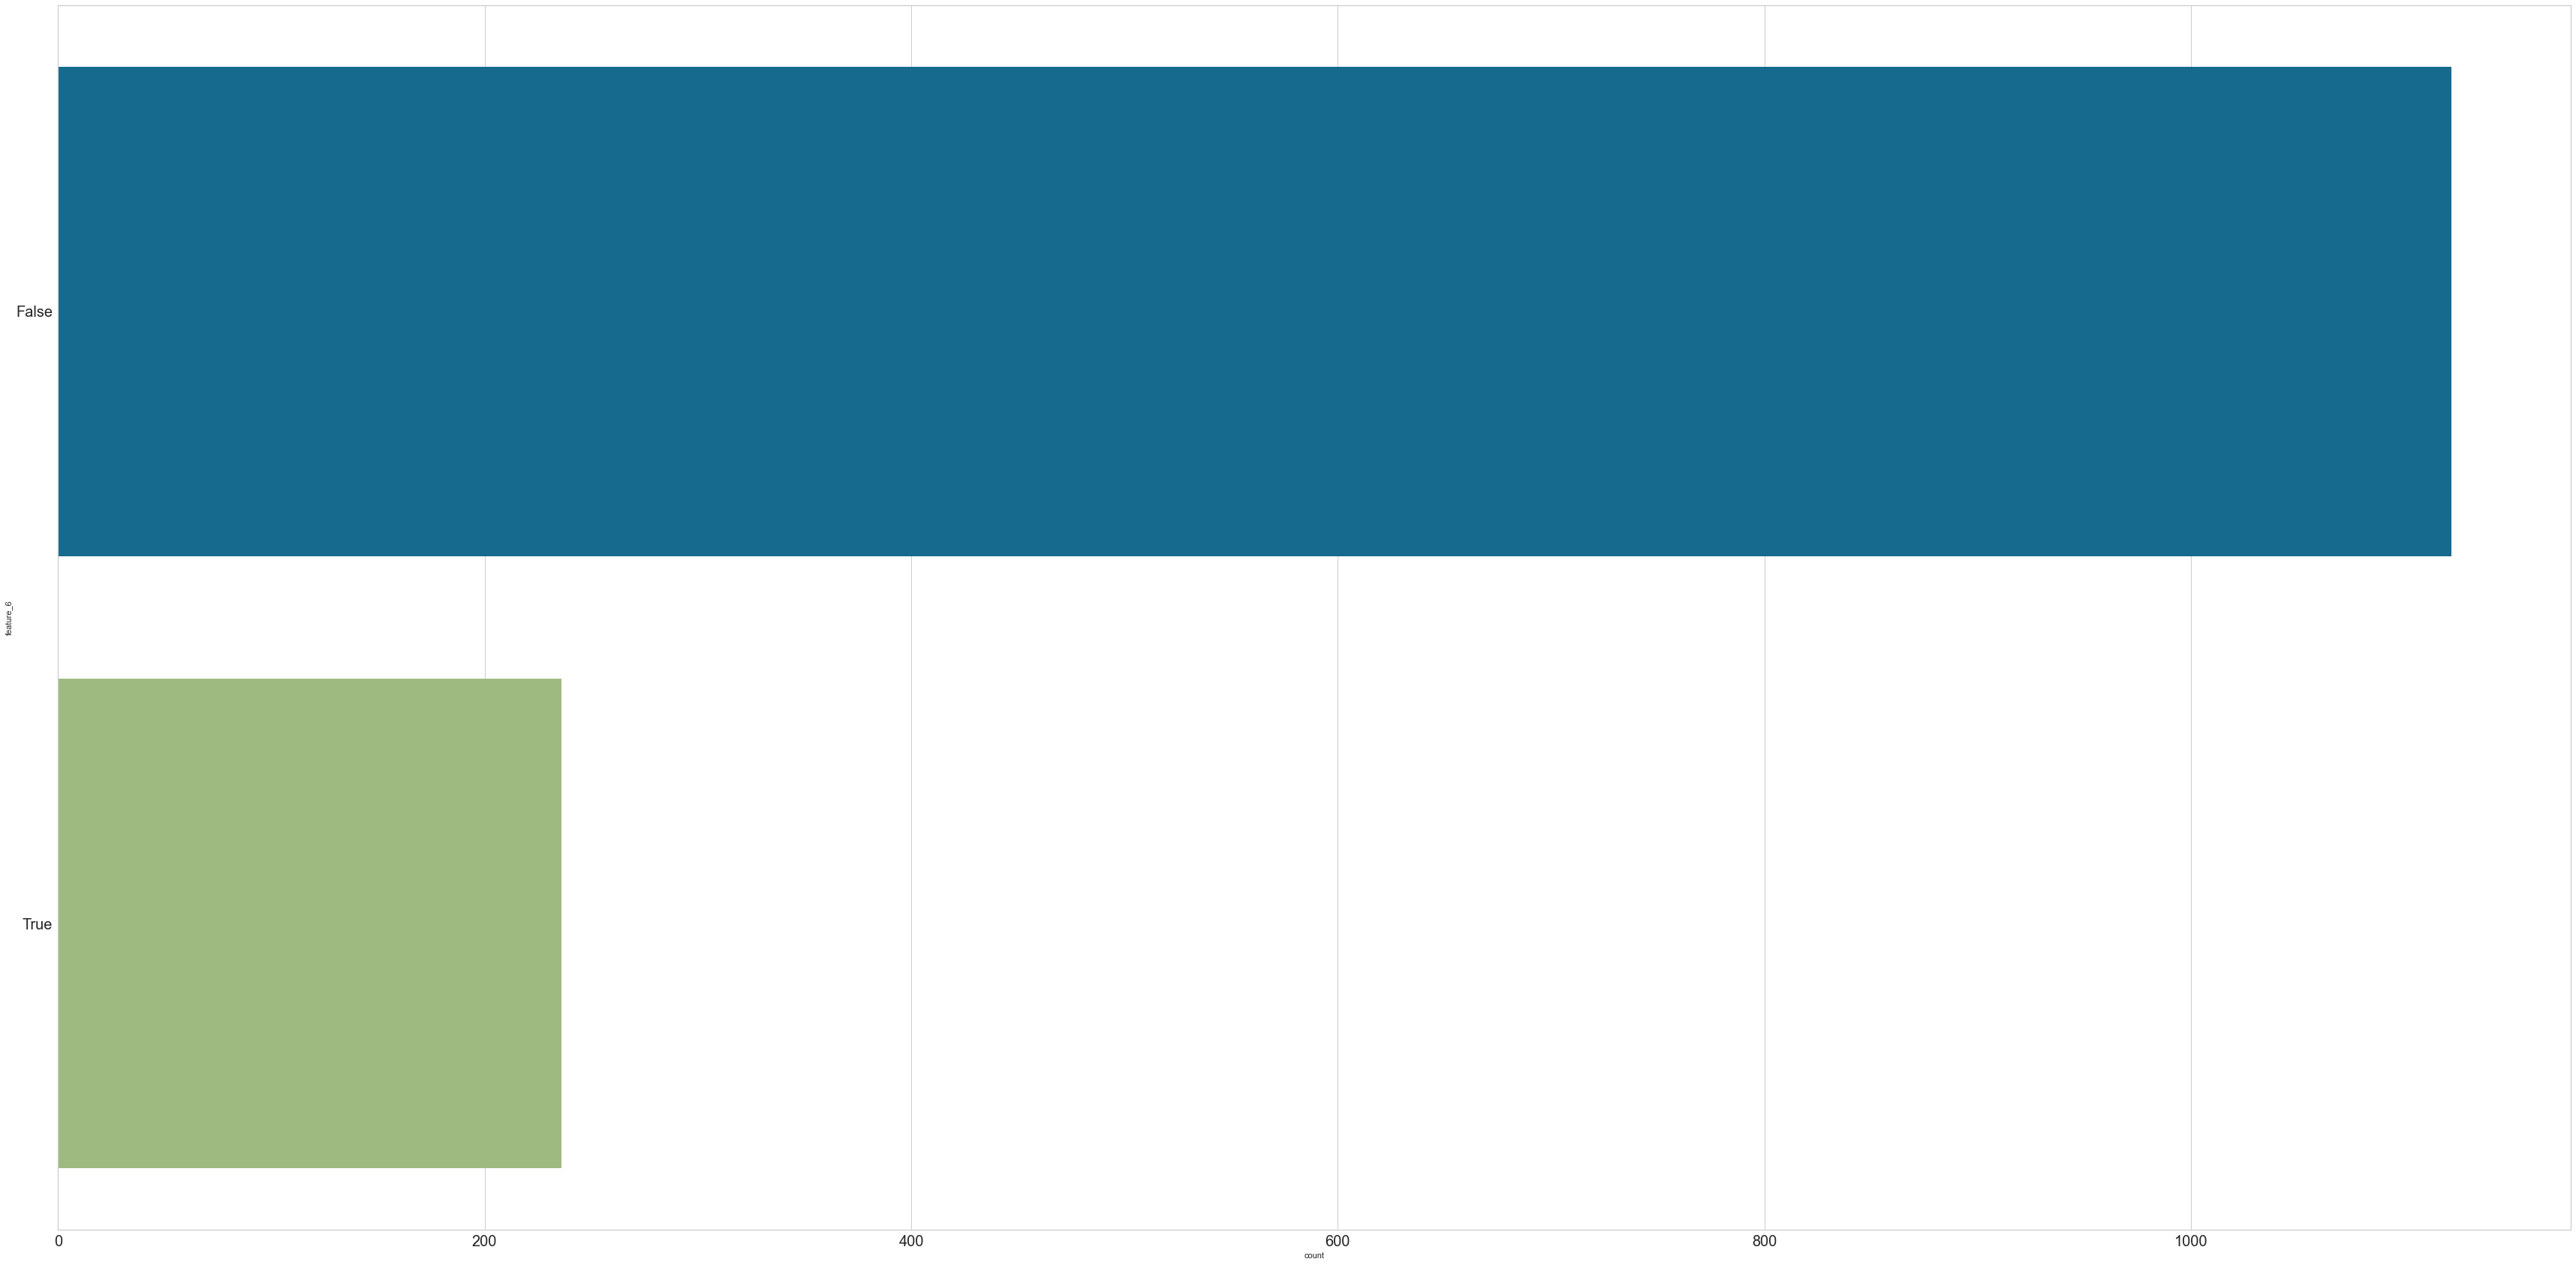

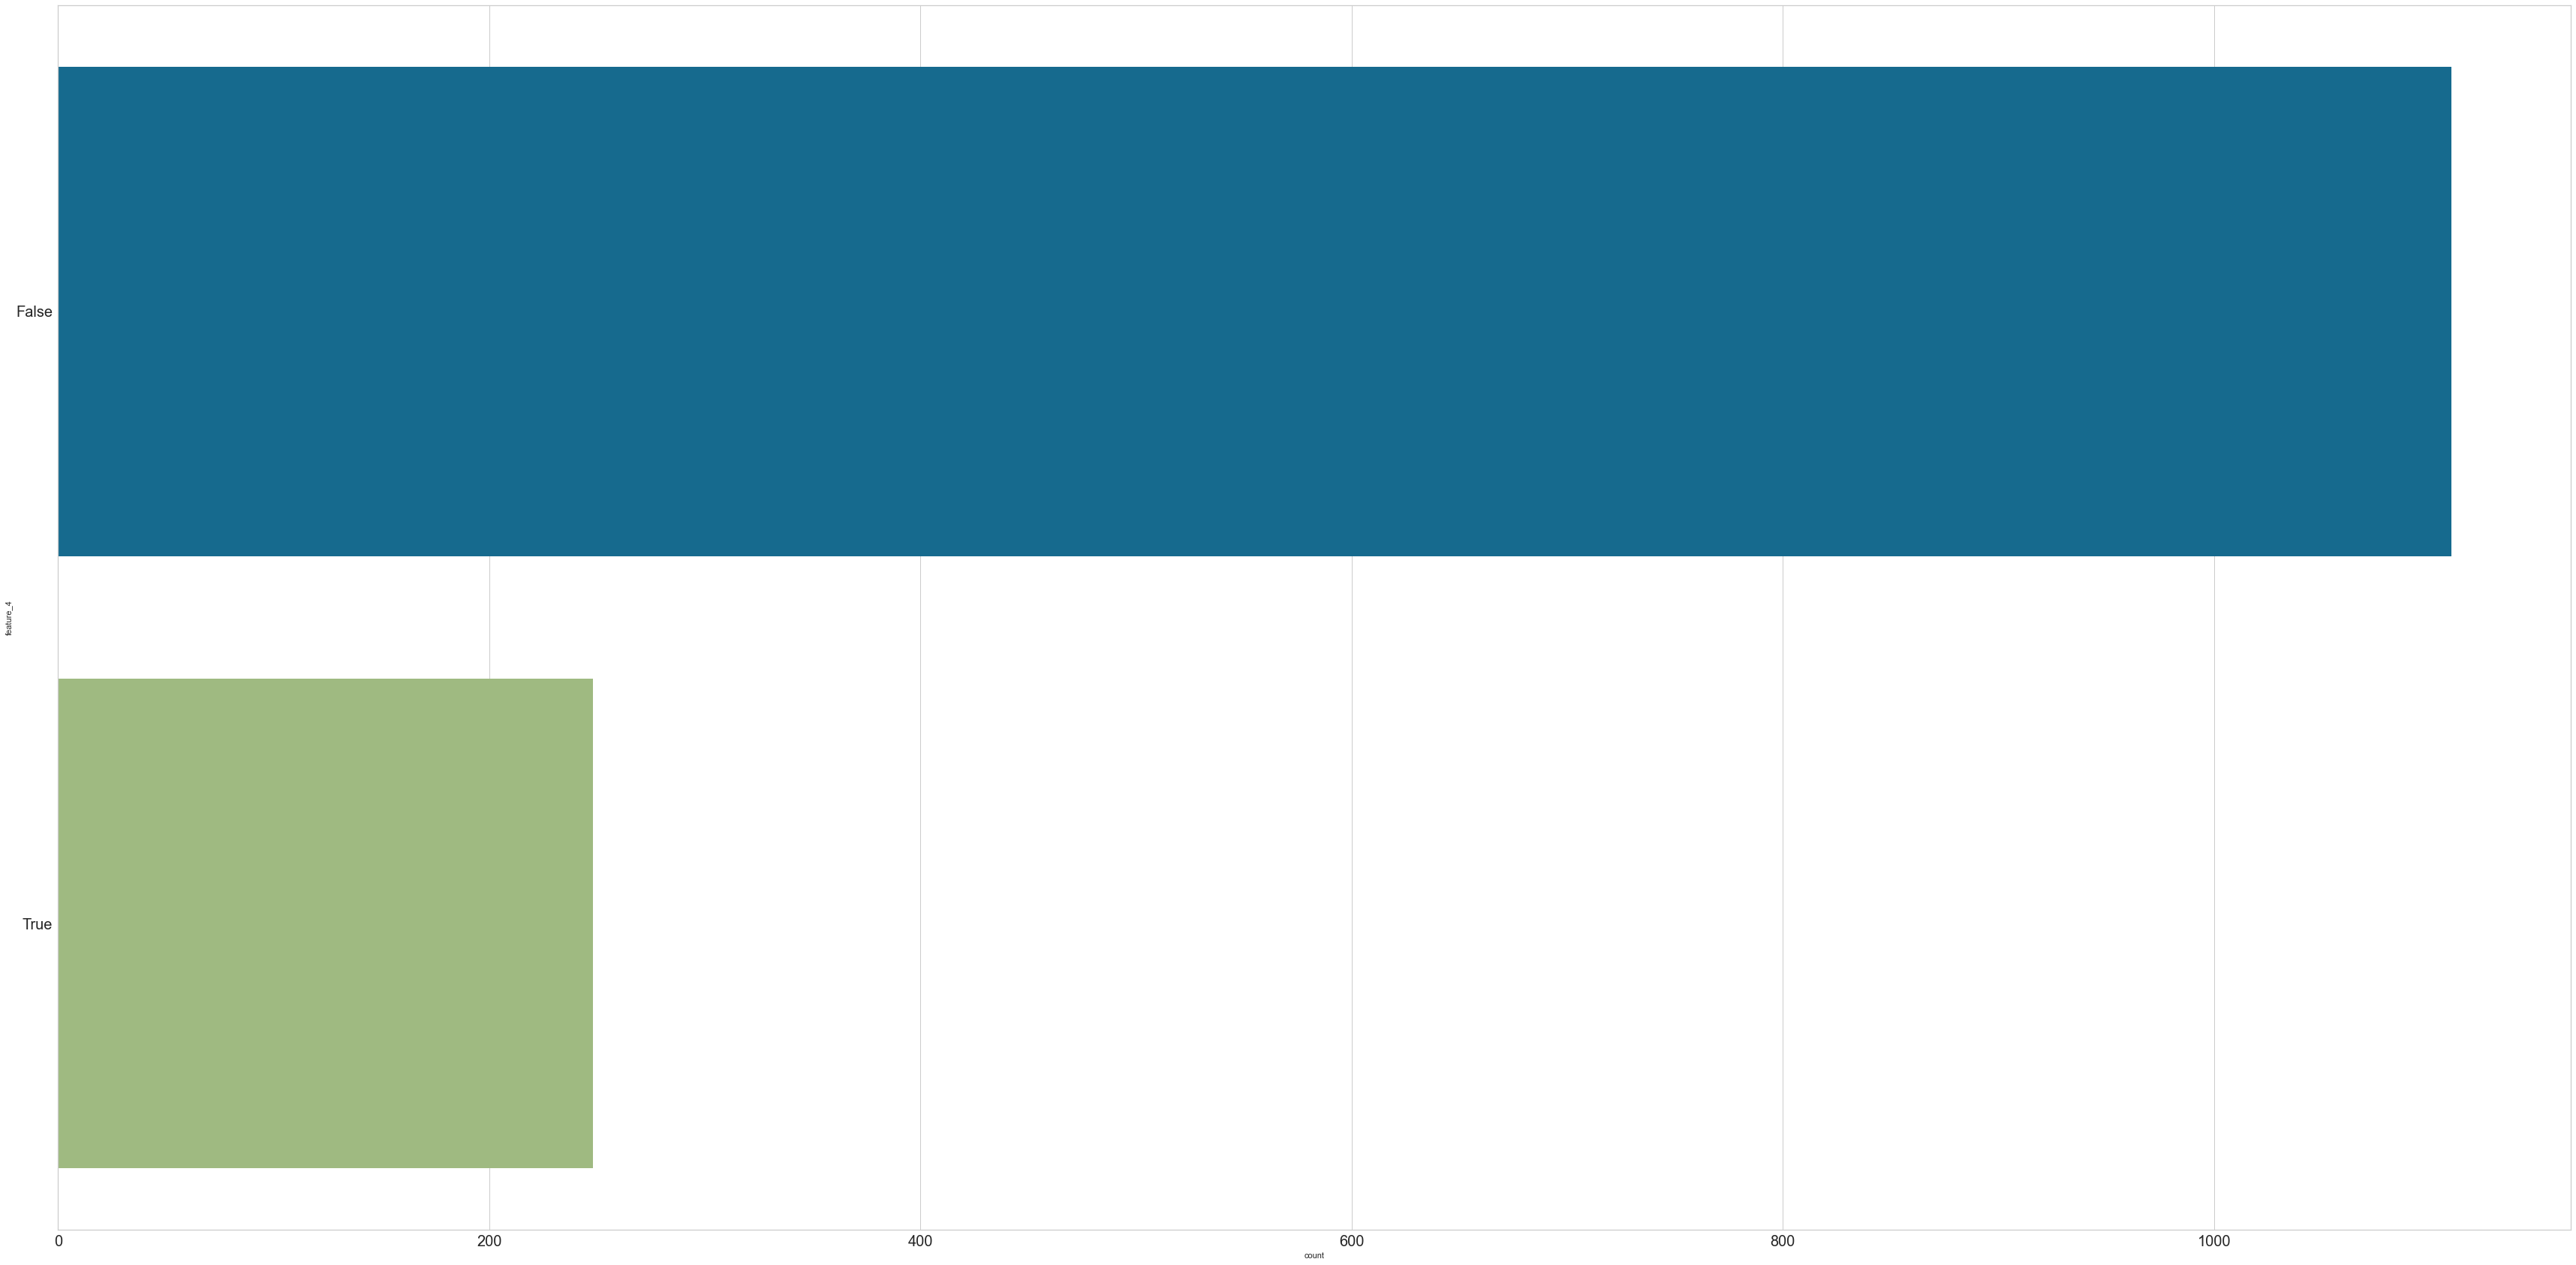

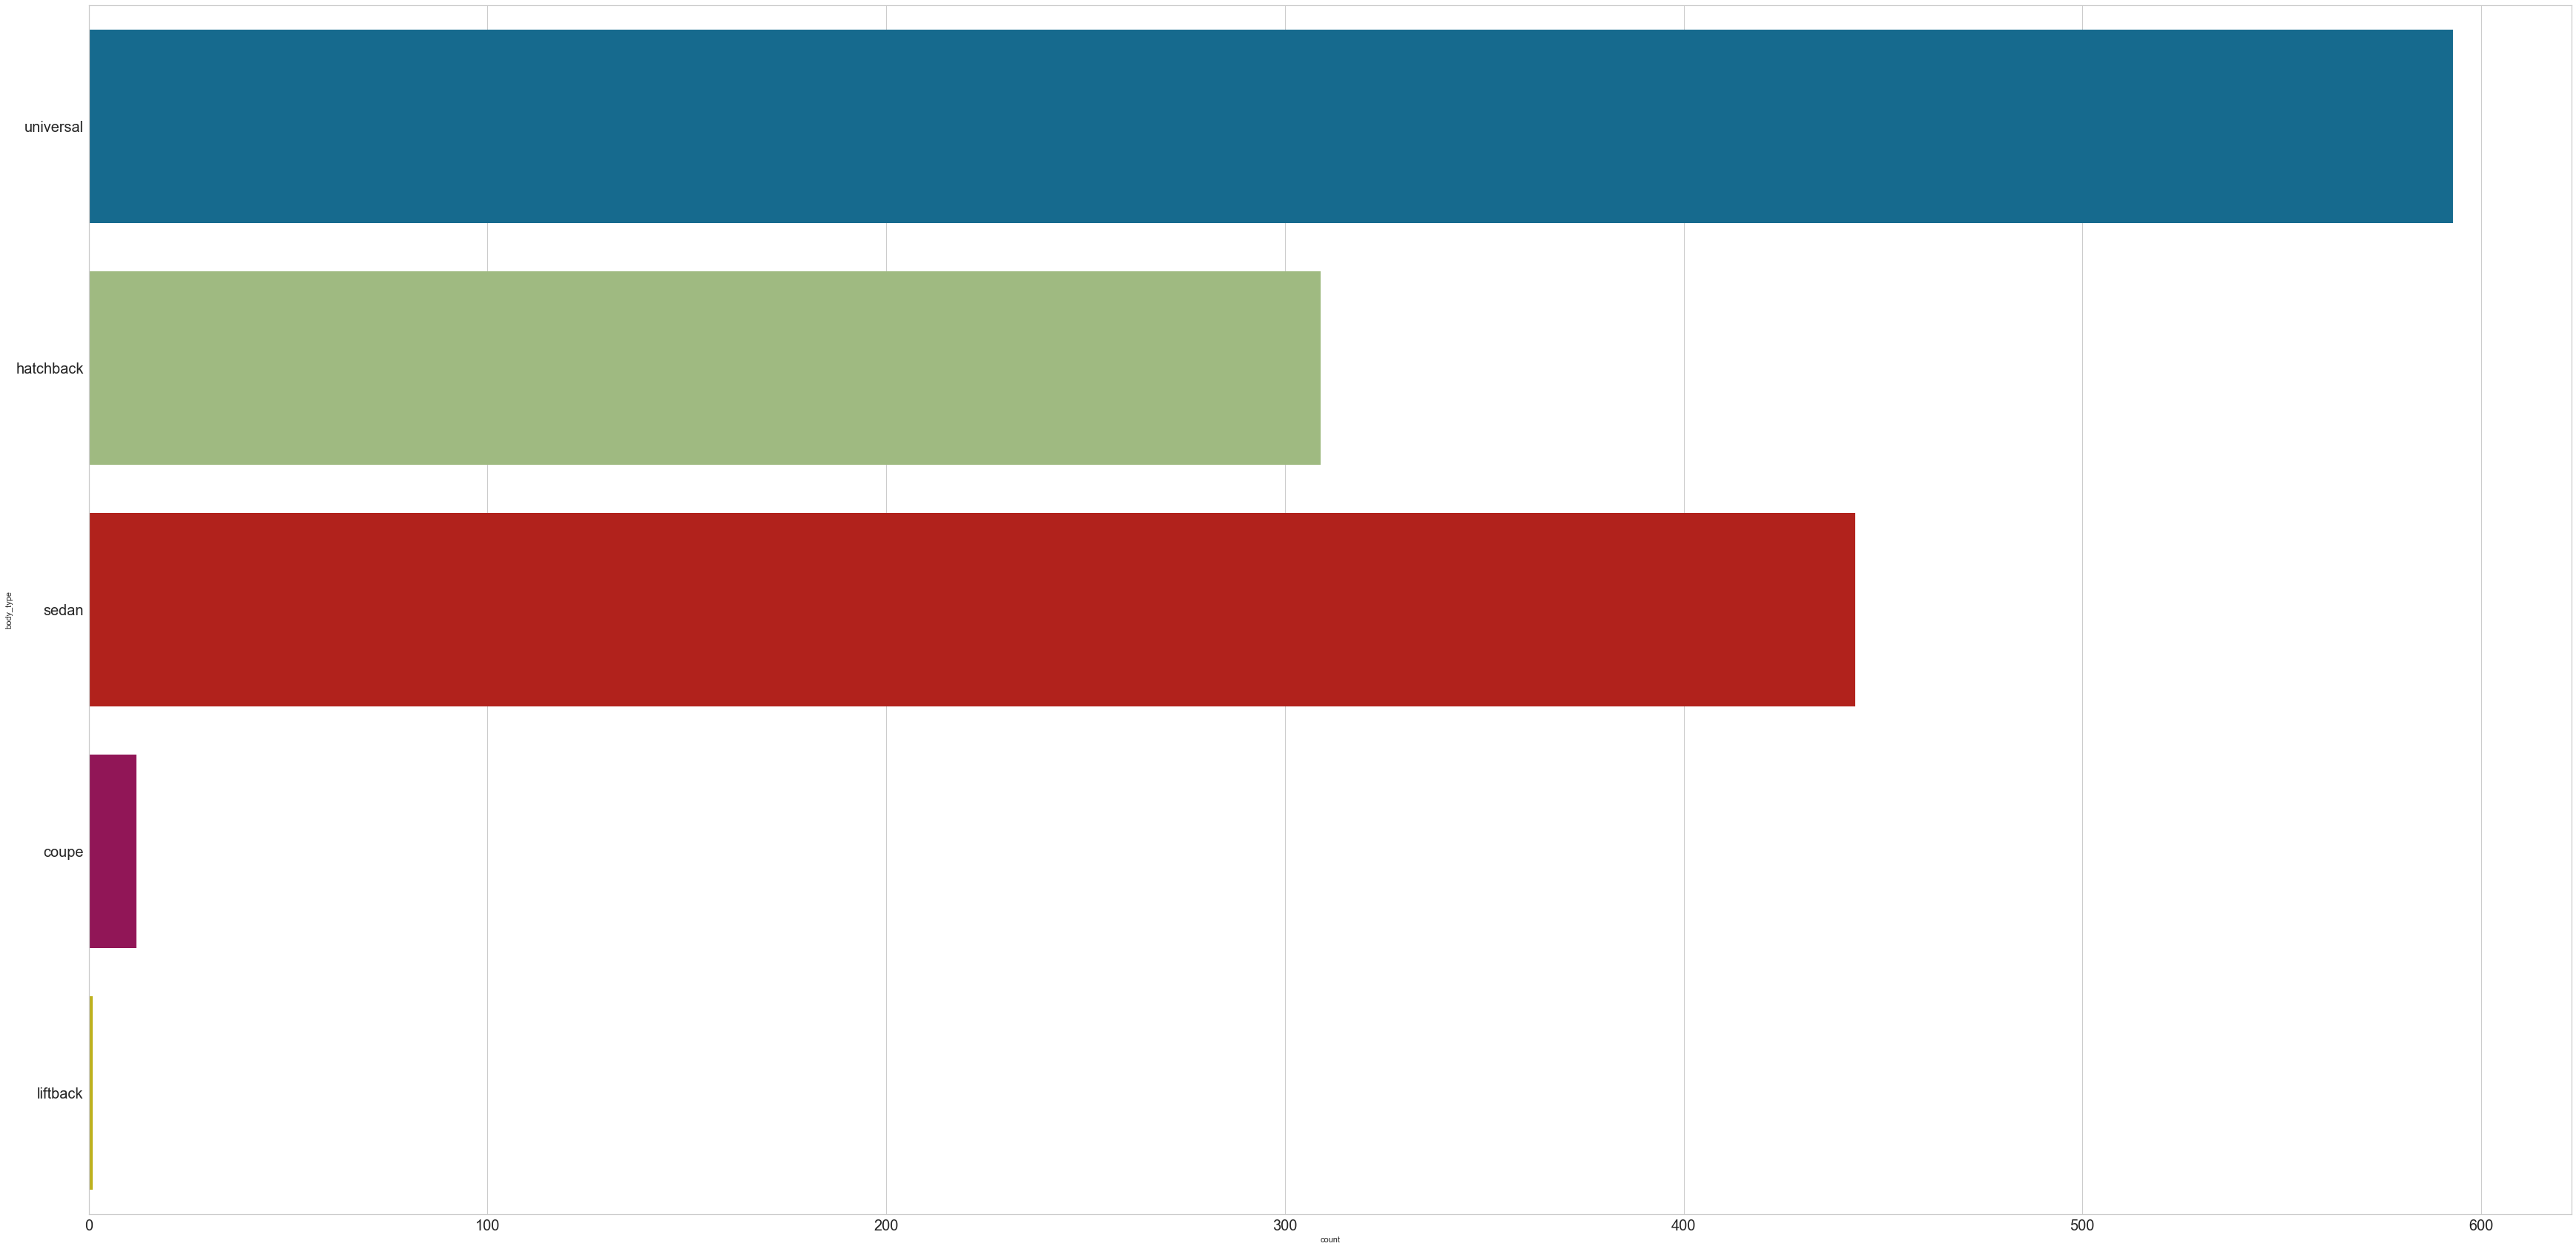

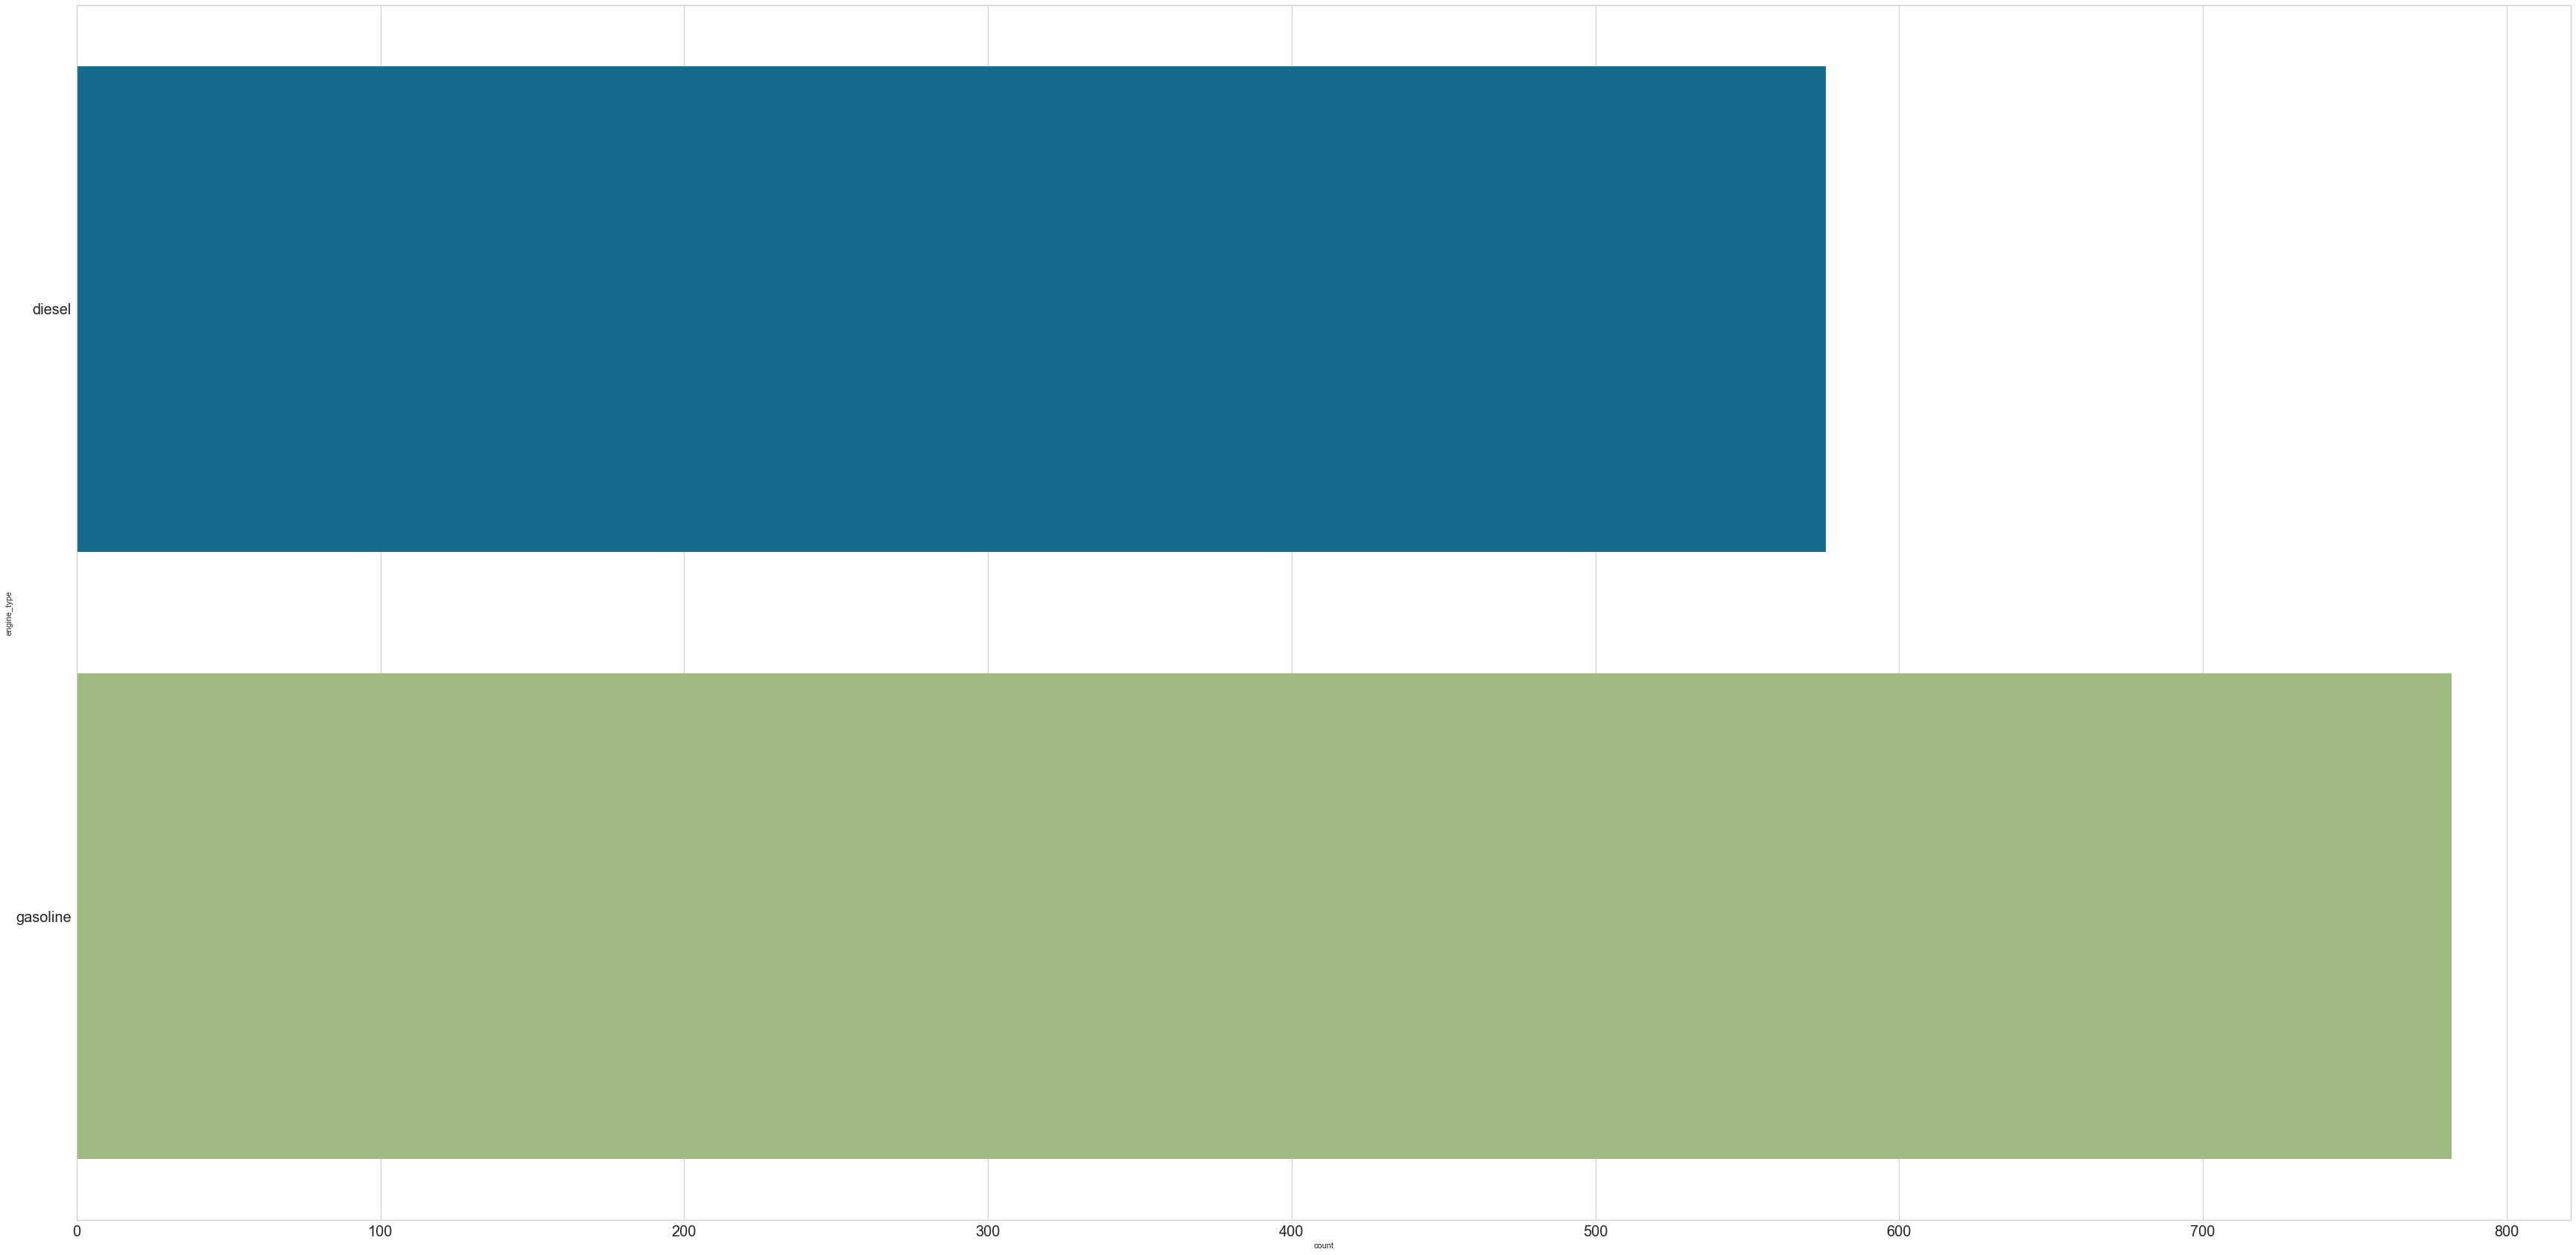

In [187]:
for col in exc_col:
    if col != 'is_exchangeable':
        plt.figure(figsize=(60,30))
        plt.yticks(size=20)
        plt.xticks(size=20)
        sns.countplot(y=col, data=exc_col)

Pada atribut odometer_value, akan dihitung nilai central tendency-nya.

/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_907/532480313.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p = sns.kdeplot(df_exchangeable['odometer_value'], shade=True)
/var/folders/2n/4_xt4l6521375my_70gm6h2c0000gn/T/ipykernel_907/532480313.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  plt.vlines(x=scp.mode(df_exchangeable['odometer_value'])[0][0], ymin=0, ymax=ticks, color='red', linestyle='--')


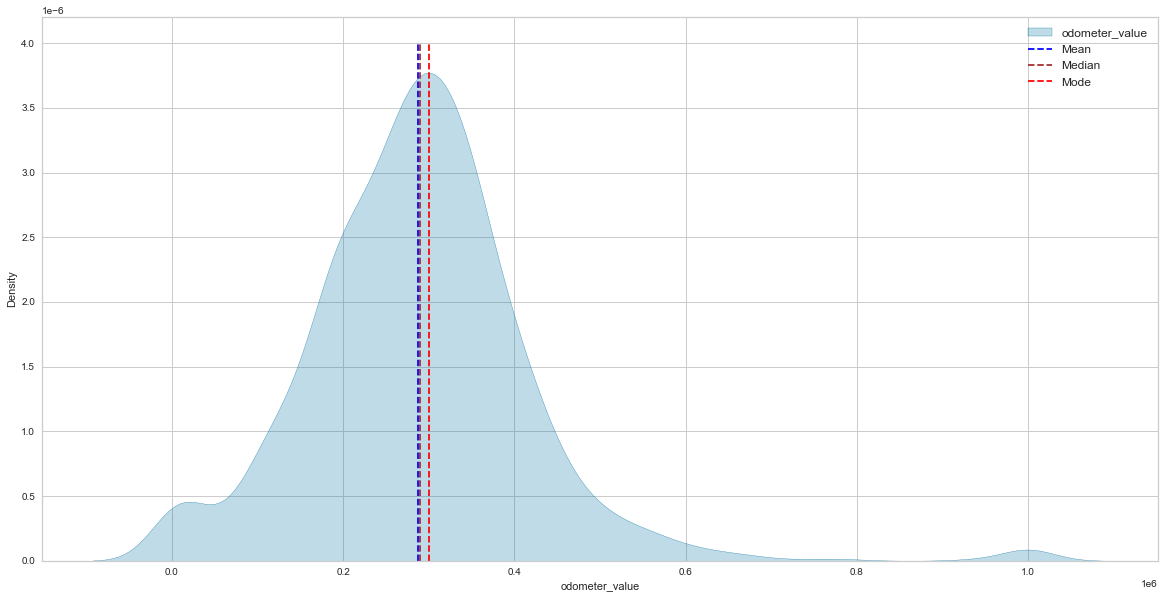

In [188]:
p = sns.kdeplot(df_exchangeable['odometer_value'], shade=True) 
ticks = max(p.get_yticks())
plt.vlines(x=np.mean(df_exchangeable['odometer_value']), ymin=0, ymax=ticks, color='blue', linestyle='--')
plt.vlines(x=np.median(df_exchangeable['odometer_value']), ymin=0, ymax=ticks, color='brown', linestyle='--')
plt.vlines(x=scp.mode(df_exchangeable['odometer_value'])[0][0], ymin=0, ymax=ticks, color='red', linestyle='--')
plt.legend(['odometer_value', 'Mean', 'Median', 'Mode'], fontsize=12) 
plt.show()


Dapat di lihat bahwa distribusi dari odometer_value terdistribusi normal, maka kita dapat menggunakan nilai mean untuk merepresentasikannya.

In [189]:
print('Rata-rata odometer_value =', np.mean(df_exchangeable['odometer_value']))

Rata-rata odometer_value = 287716.8910162003


Berdasarkan hasil visualisasi di atas, dapat kita tarik kesimpulan bahwa mobil yang exchangeable memiliki karakteristik engine_capacity: 1.6-2 , feature_2: False, has_warranty: False, odometer_value: berkisar pada 287716.8910162003 , state: Owned, feature_9: True, location_region: North East, color: black,  feature_8: False, feature_6: False, feature_4: False, body_type: Universal, dan engine_type: Gasoline.


In [190]:
df_exchangeable.iloc[32]

manufacturer_name          Opel
model_name                Astra
transmission          automatic
color                     black
odometer_value           206000
year_produced              2010
engine_has_gas            False
engine_type            gasoline
engine_capacity             1.6
body_type                 sedan
has_warranty              False
state                     owned
drivetrain                front
price_usd                6200.0
location_region      North East
number_of_photos              9
up_counter                    9
feature_0                 False
feature_1                  True
feature_2                 False
feature_3                 False
feature_4                 False
feature_5                  True
feature_6                 False
feature_7                 False
feature_8                 False
feature_9                  True
duration_listed              29
Name: 72, dtype: object

# Tren pembuatan mobil setiap merk per tahun

In [191]:
years = df['year_produced'].unique().tolist()

In [192]:
merk = df['manufacturer_name'].unique().tolist()
merk

['Opel', 'Ford', 'Volkswagen', 'Audi']

In [193]:
ford_avg = []
opel_avg = []
vw_avg = []
audi_avg = []
for i in years:
  for j in merk:
    year = df.loc[df['year_produced']==i].loc[df['manufacturer_name']==j]
    mean = year.shape[0]
    if(j=='Ford'):
      ford_avg.append(mean)
    if(j=='Opel'):
      opel_avg.append(mean)
    if(j=='Volkswagen'):
      vw_avg.append(mean)
    if(j=='Audi'):
      audi_avg.append(mean)

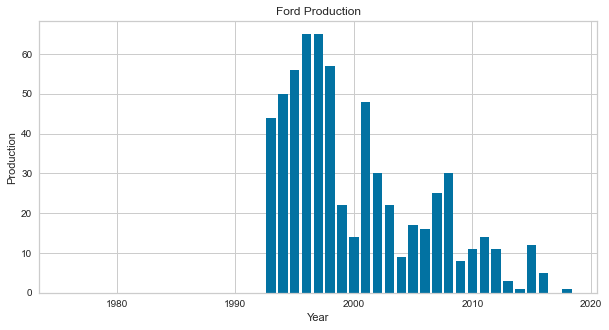

In [194]:
plt.figure(figsize=(10,5))
plt.bar(years, ford_avg)
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Ford Production')
plt.show()

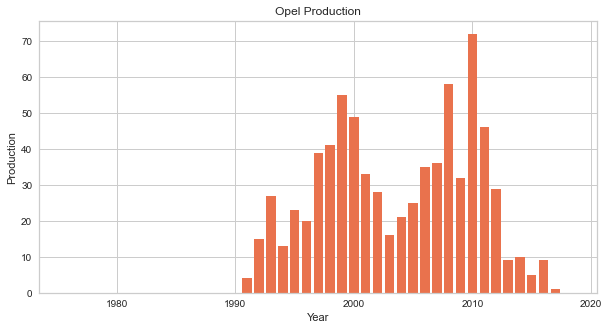

In [195]:
plt.figure(figsize=(10,5))
plt.bar(years, opel_avg, color="#e9724d")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Opel Production')
plt.show()

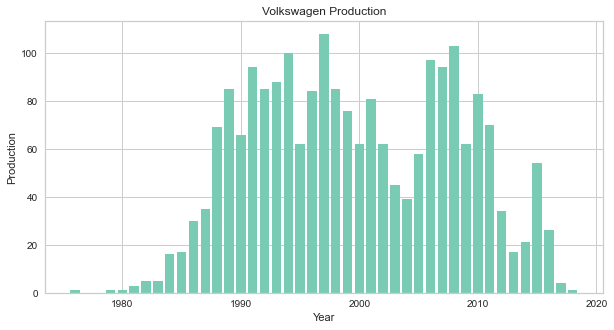

In [196]:
plt.figure(figsize=(10,5))
plt.bar(years, vw_avg, color="#79ccb3")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Volkswagen Production')
plt.show()

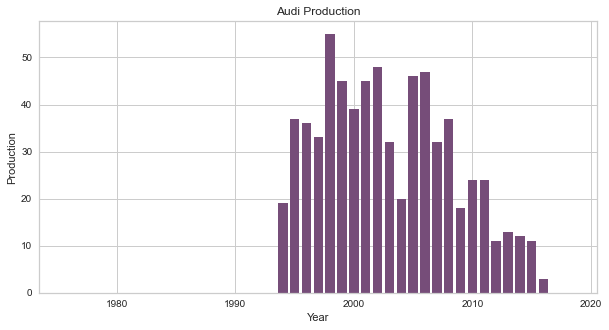

In [197]:
plt.figure(figsize=(10,5))
plt.bar(years, audi_avg, color="#764d79")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Audi Production')
plt.show()

# Tren pembuatan jenis bodi per tahun

In [198]:
body = df['body_type'].unique().tolist()

In [199]:
years = df['year_produced'].unique().tolist()

In [200]:
coupe_avg = []
hatchback_avg = []
liftback_avg = []
minibus_avg = []
sedan_avg = []
universal_avg = []
cabriolet_avg = []
for i in years:
  for j in body:
    year = df.loc[df['year_produced']==i]
    year = year.loc[year['body_type']==j]
    mean = year.shape[0]
    if(j=='coupe'):
      coupe_avg.append(mean)
    if(j=='hatchback'):
      hatchback_avg.append(mean)
    if(j=='liftback'):
      liftback_avg.append(mean)
    if(j=='minibus'):
      minibus_avg.append(mean)
    if(j=='sedan'):
      sedan_avg.append(mean)
    if(j=='universal'):
      universal_avg.append(mean)
    if(j=='cabriolet'):
      cabriolet_avg.append(mean)

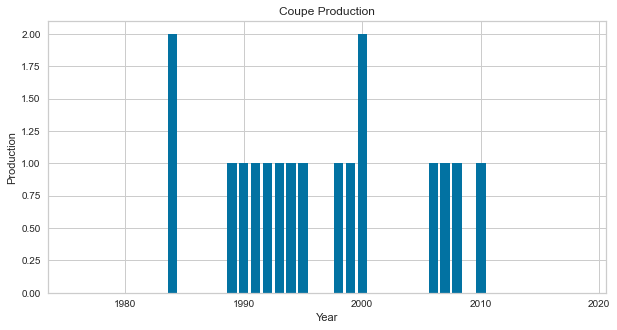

In [201]:
plt.figure(figsize=(10,5))
plt.bar(years, coupe_avg)
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Coupe Production')
plt.show()

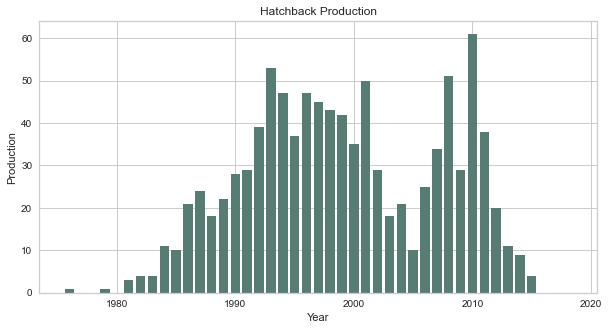

In [258]:
plt.figure(figsize=(10,5))
plt.bar(years, hatchback_avg, color="#567c73")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Hatchback Production')
plt.show()

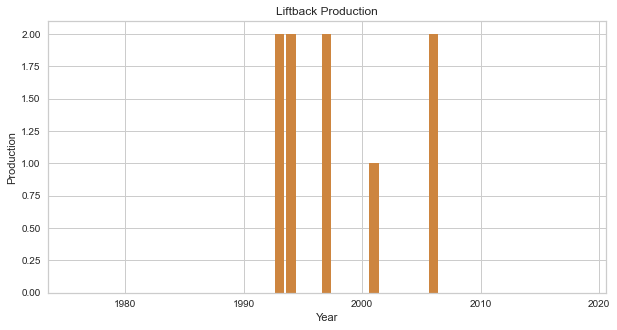

In [259]:
plt.figure(figsize=(10,5))
plt.bar(years, liftback_avg, color="#cd853f")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Liftback Production')
plt.show()

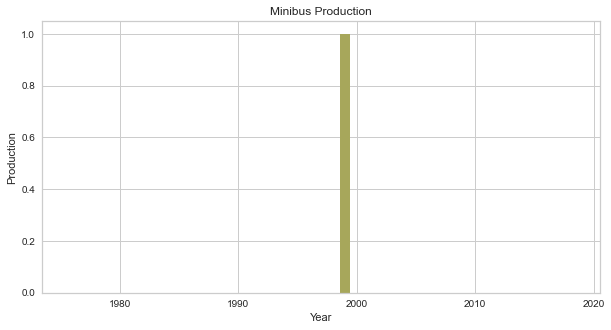

In [260]:
plt.figure(figsize=(10,5))
plt.bar(years, minibus_avg, color="#a7a75b")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Minibus Production')
plt.show()

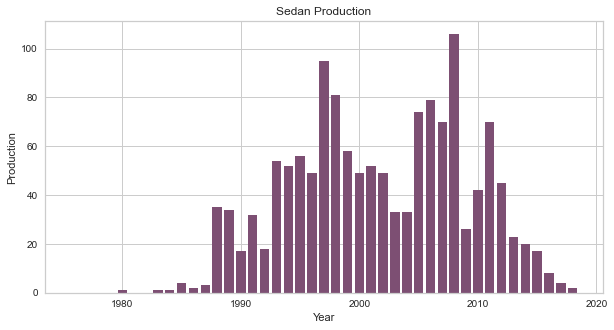

In [261]:
plt.figure(figsize=(10,5))
plt.bar(years, sedan_avg, color="#7d4f73")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Sedan Production')
plt.show()

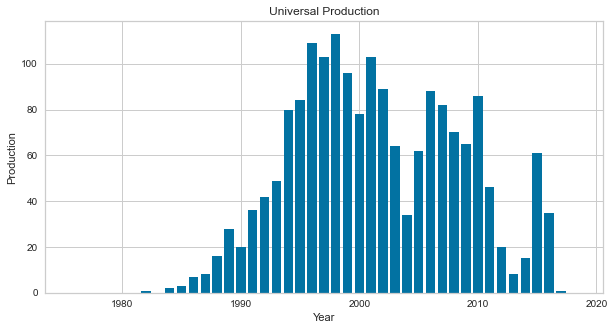

In [263]:
plt.figure(figsize=(10,5))
plt.bar(years, universal_avg)
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Universal Production')
plt.show()

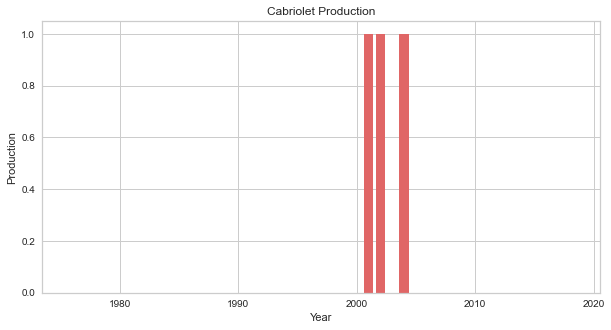

In [264]:
plt.figure(figsize=(10,5))
plt.bar(years, cabriolet_avg, color="#e06666")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Cabriolet Production')
plt.show()

# Model Klasifikasi

Menyiapkan Data Frame

In [208]:
df_norm = df_cleaned.drop(['model_name'], axis=1)
df_cleaned[df_norm.columns] = StandardScaler().fit_transform(df_norm)
df_norm = df_cleaned.copy()

df_norm.head()

manufacturer_name  model_name  transmission     color  odometer_value  \
0          -0.024729           1      0.543712  1.050632       -1.304000   
1          -0.024729           1     -1.839209  1.050632       -1.454413   
2          -0.024729           1     -1.839209 -1.187628       -0.265828   
3          -0.024729           1     -1.839209  1.050632       -0.338825   
4          -0.024729           1      0.543712 -1.187628       -1.271557   

   year_produced  engine_has_gas  engine_type  engine_capacity  body_type  \
0       1.214446        -0.16317      0.86003        -0.747262   0.182780   
1       1.483307        -0.16317      0.86003        -1.294812   0.812474   
2       0.945586        -0.16317      0.86003        -0.199713   0.812474   
3       0.542295        -0.16317      0.86003        -0.199713  -1.706301   
4       1.214446        -0.16317      0.86003        -1.294812  -1.706301   

   ...  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  ...   0.860449  -0.500892  -0.552521  -0.465672   1.363519  -0.448554   
1  ...   0.860449   1.996438   1.809886   2.147436   1.363519   2.229388   
2  ...   0.860449  -0.500892  -0.552521   2.147436   1.363519  -0.448554   
3  ...   0.860449  -0.500892  -0.552521  -0.465672   1.363519  -0.448554   
4  ...   0.860449  -0.500892  -0.552521  -0.465672  -0.733397  -0.448554   

   feature_7  feature_8  feature_9  duration_listed  
0  -0.539670  -0.828612  -1.118034         0.013767  
1   1.852983   1.206838   0.894427        -0.281268  
2  -0.539670   1.206838   0.894427        -0.308089  
3  -0.539670   1.206838   0.894427        -0.379613  
4  -0.539670   1.206838   0.894427         2.132656  

[5 rows x 29 columns]

Melakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target

In [209]:
X = df_norm.drop(['model_name'], axis=1)
y = df_norm['model_name']

In [210]:
selector = SelectKBest(k=5)
X = selector.fit_transform(X, y)

In [211]:
selector.get_feature_names_out(input_features=selector.feature_names_in_)

array(['manufacturer_name', 'engine_capacity', 'body_type', 'drivetrain',
       'feature_2'], dtype=object)

Preparation

In [212]:
cv = KFold(random_state=123, shuffle=True)

Decision Tree

In [213]:
dt1 = DecisionTreeClassifier()

In [214]:
scores = cross_val_score(dt1, X, y, scoring='accuracy', cv=cv)
np.mean(scores)

0.952412094445388

Random Forest

In [215]:
rf1 = RandomForestClassifier()
scores = cross_val_score(rf1, X, y, scoring='accuracy', cv=cv)
np.mean(scores)

0.9519361870788744

Naive Bayes


In [216]:
nb = GaussianNB()
scores = cross_val_score(nb, X, y, scoring='accuracy', cv=cv)
np.mean(scores)

0.9471788120717965

K-nearest Neighbors

In [217]:
knn = KNeighborsClassifier(n_neighbors=3)

In [218]:
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv)
np.mean(scores)

0.9433724024687165

<AxesSubplot: ylabel='Density'>

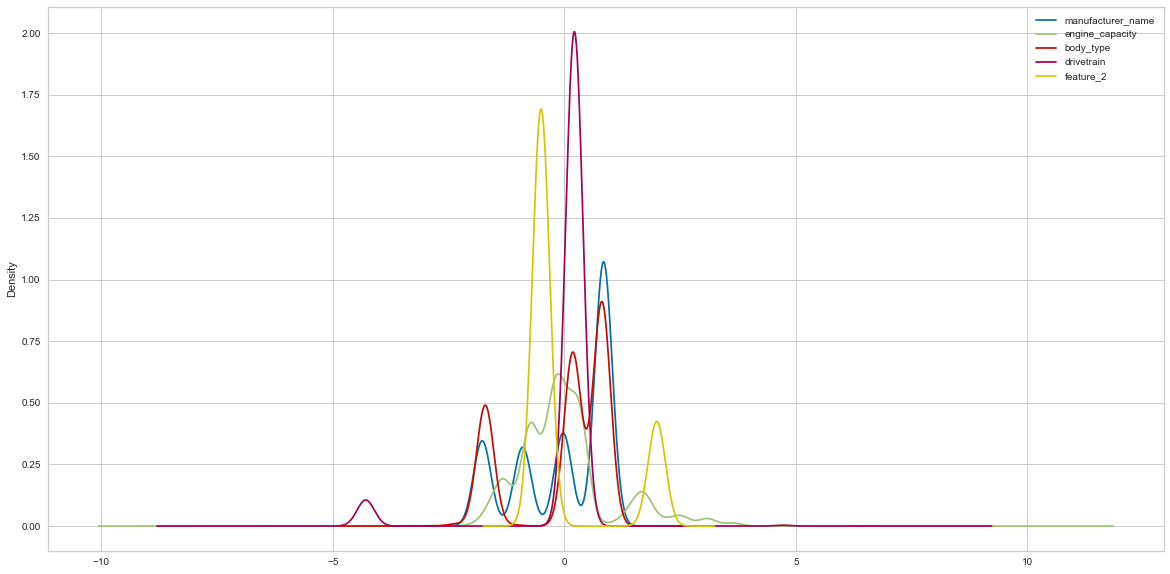

In [219]:
df_norm[['manufacturer_name', 'engine_capacity', 'body_type', 'drivetrain',
       'feature_2']].plot.kde()

# Model Regresi

In [220]:
# Memisahkan target variable menjadi DataFrame yang terpisah

x = df_norm.drop(['price_usd'], axis=1)
y = df_norm['price_usd']

In [221]:
# Membagi data menjadi training dan testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Linear Regression

In [222]:
# Melakukan Linear Regression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [223]:
# Melakukan prediksi harga rumah dengan Linear Regression

y_linreg_predict = linreg.predict(x_test)

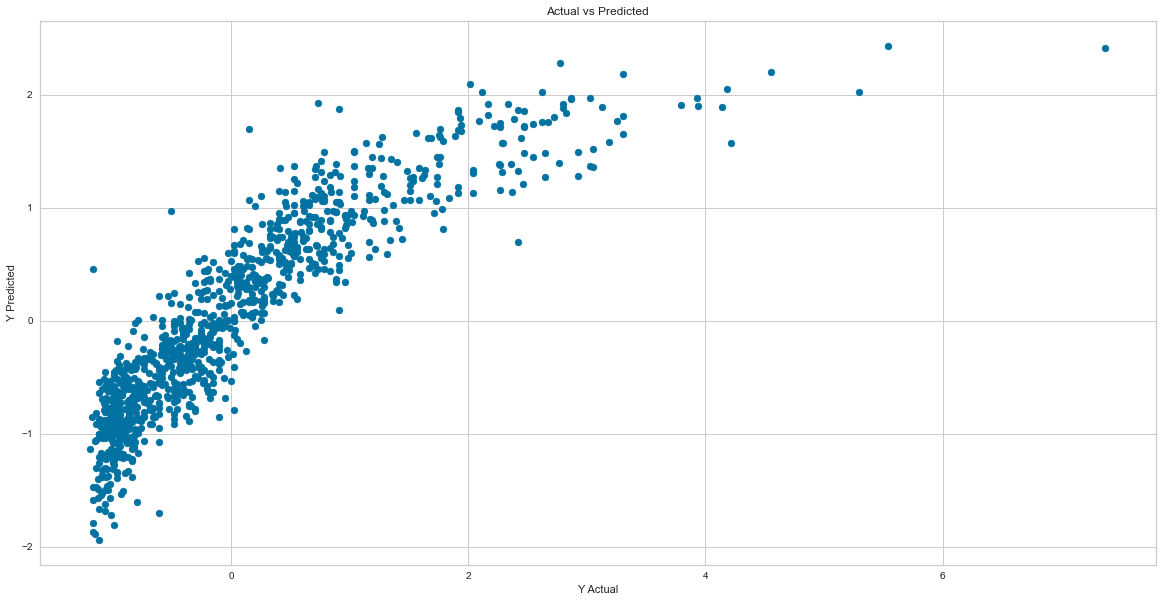

In [224]:
# Melakukan visualisasi kepada hasil prediksi dengan Linear Regression

plt.scatter(y_test, y_linreg_predict)

plt.title("Actual vs Predicted")
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')

plt.show()

In [225]:
# Persamaan Linear yang terbentuk dari model Linear Regression

print("Koefisien persamaan linear: \n", linreg.coef_)
print("Intersep persamaan linear: \n", linreg.intercept_)

print("Persamaan Linear:")
equation = f"y = {linreg.intercept_}"
for i in range(0, len(linreg.coef_)):
    curr = linreg.coef_[i]
    equation += f"{' - ' if curr < 0 else ' + '}{abs(curr)}x{i}"

print(equation)

Koefisien persamaan linear: 
 [ 0.05181796 -0.01727566 -0.01050445 -0.02055814 -0.04840573  0.66877946
 -0.00765283 -0.01758354  0.08756055  0.01894398  0.01040399  0.02090386
 -0.06904062 -0.01317843  0.00530304  0.05304821 -0.01717402  0.07300749
 -0.04119433  0.01637595  0.08572273  0.01934532  0.00486038  0.06993306
  0.08916734  0.00725481  0.06114997  0.01940678]
Intersep persamaan linear: 
 0.03819089449645387
Persamaan Linear:
y = 0.03819089449645387 + 0.05181796413292373x0 - 0.017275660243997598x1 - 0.010504452816428197x2 - 0.02055813903640797x3 - 0.04840572860460451x4 + 0.6687794562606253x5 - 0.007652833835592906x6 - 0.01758353623106815x7 + 0.08756054601058061x8 + 0.018943982810542603x9 + 0.010403994567617243x10 + 0.020903859765066396x11 - 0.069040615098235x12 - 0.013178426572153248x13 + 0.005303043506033256x14 + 0.05304821182265631x15 - 0.01717401970579945x16 + 0.07300748790414296x17 - 0.04119433483400965x18 + 0.016375953840738044x19 + 0.08572272849938296x20 + 0.019345323847

In [226]:
# Metrik evaluasi dari Linear Regression

from sklearn import metrics
import math

print("MSE:", metrics.mean_squared_error(y_test, y_linreg_predict))
print("MAE:", metrics.mean_absolute_error(y_test, y_linreg_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_linreg_predict))) 
print("R-squared:", metrics.r2_score(y_test, y_linreg_predict))

MSE: 0.24144499914924838
MAE: 0.32829276434240134
RMSE:  0.49137053142129755
R-squared: 0.7917424547315205


## Ridge Regression

In [227]:
# Melakukan Ridge Regression

ridge0 = Ridge(alpha=0, random_state=42)
ridge5 = Ridge(alpha=5, random_state=42)
ridge10 = Ridge(alpha=10, random_state=42)
ridge15 = Ridge(alpha=15, random_state=42)
ridge20 = Ridge(alpha=20, random_state=42)

In [228]:
# Melakukan fitting kepada setiap model Ridge Regression

ridge0.fit(x_train, y_train)
ridge5.fit(x_train, y_train)
ridge10.fit(x_train, y_train)
ridge15.fit(x_train, y_train)
ridge20.fit(x_train, y_train)

Ridge(alpha=20, random_state=42)

In [229]:
# Menguji nilai R-squared untuk masing-masing model

print("R2 Score pada data training dengan alpha 0: %.2f" % ridge0.score(x_train, y_train))
print("R2 Score pada data testing dengan alpha 0: %.2f\n" % ridge0.score(x_test, y_test))

print("R2 Score pada data training dengan alpha 5: %.2f" % ridge5.score(x_train, y_train))
print("R2 Score pada data testing dengan alpha 5: %.2f\n" % ridge5.score(x_test, y_test))

print("R2 Score pada data training dengan alpha 10: %.2f" % ridge10.score(x_train, y_train))
print("R2 Score pada data testing dengan alpha 10: %.2f\n" % ridge10.score(x_test, y_test))

print("R2 Score pada data training dengan alpha 15: %.2f" % ridge15.score(x_train, y_train))
print("R2 Score pada data testing dengan alpha 15: %.2f\n" % ridge15.score(x_test, y_test))

print("R2 Score pada data training dengan alpha 20: %.2f" % ridge20.score(x_train, y_train))
print("R2 Score pada data testing dengan alpha 20: %.2f\n" % ridge20.score(x_test, y_test))

R2 Score pada data training dengan alpha 0: 0.80
R2 Score pada data testing dengan alpha 0: 0.79

R2 Score pada data training dengan alpha 5: 0.80
R2 Score pada data testing dengan alpha 5: 0.79

R2 Score pada data training dengan alpha 10: 0.80
R2 Score pada data testing dengan alpha 10: 0.79

R2 Score pada data training dengan alpha 15: 0.80
R2 Score pada data testing dengan alpha 15: 0.79

R2 Score pada data training dengan alpha 20: 0.80
R2 Score pada data testing dengan alpha 20: 0.79



Berdasarkan hasil diatas, kita mendapatkan bahwa nilai alpha tidak mengubah nilai r-squared menjadi lebih besar atau lebih kecil. Hal ini menunjukkan bahwa besar atau kecilnya regularisasi tidak mengubah kualitas hasil regresi menjadi lebih baik atau lebih buruk. 

## Random Forest Regression

In [230]:
# Membangun model Random Forest Regression

rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [231]:
# Melakukan fitting kepada model Random Forest Regression

rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [232]:
# Menguji nilai R-squared untuk masing-masing model

print("R2 Score pada data training: %f" % rf.score(x_train, y_train))
print("R2 Score pada data testing: %f" % rf.score(x_test, y_test))

R2 Score pada data training: 0.991606
R2 Score pada data testing: 0.942208


## Decision Tree Regression

In [233]:
# Membangun model Decision Tree Regression

dt = DecisionTreeRegressor(random_state=42)

In [234]:
# Melakukan fitting kepada model Decision Tree Regression

dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [235]:
# Menguji nilai R-squared untuk model Decision Tree Regression

print("R2 Score pada data training: %f" % dt.score(x_train, y_train))
print("R2 Score pada data testing: %f" % dt.score(x_test, y_test))

R2 Score pada data training: 1.000000
R2 Score pada data testing: 0.897473


## Gradient Boosting Regression

In [236]:
# Membangun model Gradient Boosting Regression

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [237]:
# Melakukan fitting kepada model Gradient Boosting Regression

gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [238]:
# Menguji nilai R-squared untuk model Gradient Boosting Regression

print("R2 Score pada data training: %f" % gb.score(x_train, y_train))
print("R2 Score pada data testing: %f" % gb.score(x_test, y_test))

R2 Score pada data training: 0.958881
R2 Score pada data testing: 0.950200


## K-Nearest Neighbors Regressor

In [239]:
# Membangun model K-Nearest Neighbors Regression

knn = KNeighborsRegressor(n_neighbors=5)

In [240]:
# Melakukan fitting pada model K-Nearest Neighbors Regression

knn.fit(x_train, y_train)

KNeighborsRegressor()

In [241]:
# Menguji nilai R-squared untuk model K-Nearest Neighbors Regression

print("R2 Score pada data training: %f" % knn.score(x_train, y_train))
print("R2 Score pada data testing: %f" % knn.score(x_test, y_test))

R2 Score pada data training: 0.829476
R2 Score pada data testing: 0.751920


## Logistic Regression

Kita tidak menggunakan Logistic Regression karena metode Logistic Regression hanya dapat digunakan apabila targetnya variablenya bersifat diskrit. Pada kasus ini, price_usd bersifat kontinu. Dengan demikian, Logistic Regression tidak dapat digunakan.

## Kesimpulan Regression

Berdasarkan hasil dari model-model regresi tersebut, kita mendapatkan data nilai R-squared yaitu sebagai berikut:

| Model                          | Nilai R-squared    |
|--------------------------------|--------------------|
| Gradient Boosting Regression   | 0.950200           |
| Random Forest Regression       | 0.942208           |
| Decision Tree Regression       | 0.897473           |
| Ridge Regression               | 0.7917424547315205 |
| Linear Regression              | 0.7917424547315204 |
| K-Nearest Neighbors Regression | 0.751920           |


Maka berdasarkan data r-squared tersebut, kita dapat menyimpulkan bahwa kita akan mendapatkan model yang terbaik untuk memprediksi harga rumah (price_usd) apabila kita menggunakan model Gradient Boosting Regressor.

Gradient Boosting adalah salah satu variasi dari metode ensemble dimana ia akan membuat beberapa weak model dan menggabungkannya untuk membuat sebuah model dengan performa yang lebih baik secara keseluruhan.

# Clustering

Preparation

In [242]:
# informasi dataset (sudah ternormalisasi)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4203 entries, 0 to 4203
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  4203 non-null   float64
 1   model_name         4203 non-null   int64  
 2   transmission       4203 non-null   float64
 3   color              4203 non-null   float64
 4   odometer_value     4203 non-null   float64
 5   year_produced      4203 non-null   float64
 6   engine_has_gas     4203 non-null   float64
 7   engine_type        4203 non-null   float64
 8   engine_capacity    4203 non-null   float64
 9   body_type          4203 non-null   float64
 10  has_warranty       4203 non-null   float64
 11  state              4203 non-null   float64
 12  drivetrain         4203 non-null   float64
 13  price_usd          4203 non-null   float64
 14  is_exchangeable    4203 non-null   float64
 15  location_region    4203 non-null   float64
 16  number_of_photos   4203 

In [243]:
# statistika deskriptif dataset
df_cleaned.describe()

manufacturer_name   model_name  transmission         color  \
count       4.203000e+03  4203.000000  4.203000e+03  4.203000e+03   
mean       -2.704897e-17     2.322389 -1.352449e-17 -5.409795e-17   
std         1.000119e+00     1.494569  1.000119e+00  1.000119e+00   
min        -1.771550e+00     0.000000 -1.839209e+00 -1.187628e+00   
25%        -8.981395e-01     1.000000  5.437120e-01 -9.078453e-01   
50%         8.486816e-01     2.000000  5.437120e-01 -6.849779e-02   
75%         8.486816e-01     4.000000  5.437120e-01  1.050632e+00   
max         8.486816e-01     4.000000  5.437120e-01  1.889980e+00   

       odometer_value  year_produced  engine_has_gas   engine_type  \
count    4.203000e+03   4.203000e+03    4.203000e+03  4.203000e+03   
mean    -1.487694e-16  -1.040033e-14   -9.720725e-18  1.403166e-16   
std      1.000119e+00   1.000119e+00    1.000119e+00  1.000119e+00   
min     -2.285389e+00  -3.356183e+00   -1.631696e-01 -1.162750e+00   
25%     -6.624384e-01  -7.347928e-01   -1.631696e-01 -1.162750e+00   
50%      2.615732e-02   4.573764e-03   -1.631696e-01  8.600304e-01   
75%      5.533538e-01   8.111555e-01   -1.631696e-01  8.600304e-01   
max      5.825319e+00   2.289889e+00    6.128591e+00  8.600304e-01   

       engine_capacity     body_type  ...     feature_1     feature_2  \
count     4.203000e+03  4.203000e+03  ...  4.203000e+03  4.203000e+03   
mean      2.704897e-17 -1.352449e-17  ... -1.284826e-16 -4.057346e-17   
std       1.000119e+00  1.000119e+00  ...  1.000119e+00  1.000119e+00   
min      -4.580109e+00 -2.965688e+00  ... -1.162184e+00 -5.008921e-01   
25%      -7.472625e-01  1.827805e-01  ... -1.162184e+00 -5.008921e-01   
50%      -1.997129e-01  1.827805e-01  ...  8.604491e-01 -5.008921e-01   
75%       3.478366e-01  8.124742e-01  ...  8.604491e-01 -5.008921e-01   
max       6.370882e+00  8.124742e-01  ...  8.604491e-01  1.996438e+00   

          feature_3     feature_4     feature_5     feature_6     feature_7  \
count  4.203000e+03  4.203000e+03  4.203000e+03  4.203000e+03  4.203000e+03   
mean  -2.704897e-17 -6.762243e-17 -9.467141e-17  6.762243e-17  6.762243e-18   
std    1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00  1.000119e+00   
min   -5.525210e-01 -4.656716e-01 -7.333965e-01 -4.485536e-01 -5.396705e-01   
25%   -5.525210e-01 -4.656716e-01 -7.333965e-01 -4.485536e-01 -5.396705e-01   
50%   -5.525210e-01 -4.656716e-01 -7.333965e-01 -4.485536e-01 -5.396705e-01   
75%   -5.525210e-01 -4.656716e-01  1.363519e+00 -4.485536e-01 -5.396705e-01   
max    1.809886e+00  2.147436e+00  1.363519e+00  2.229388e+00  1.852983e+00   

          feature_8     feature_9  duration_listed  
count  4.203000e+03  4.203000e+03     4.203000e+03  
mean   1.217204e-16 -8.114692e-17    -4.057346e-17  
std    1.000119e+00  1.000119e+00     1.000119e+00  
min   -8.286116e-01 -1.118034e+00    -6.657078e-01  
25%   -8.286116e-01 -1.118034e+00    -4.690177e-01  
50%   -8.286116e-01  8.944272e-01    -1.561017e-01  
75%    1.206838e+00  8.944272e-01     1.299929e-01  
max    1.206838e+00  8.944272e-01     1.928939e+01  

[8 rows x 29 columns]

In [244]:
# menunjukkan 3 atribut yang akan digunakan untuk clustering
X = df_cleaned[['price_usd','engine_capacity','year_produced']]
X

price_usd  engine_capacity  year_produced
0      0.276645        -0.747262       1.214446
1      1.210011        -1.294812       1.483307
2      0.226459        -0.199713       0.945586
3     -0.025734        -0.199713       0.542295
4      0.592139        -1.294812       1.214446
...         ...              ...            ...
4199   0.831722         1.442936       0.542295
4200  -0.404023         1.990485      -0.667578
4201   0.251678         1.716711       0.139004
4202   0.402994         1.716711       0.273434
4203  -0.050953         1.716711      -0.129857

[4203 rows x 3 columns]

K-Means Clustering

For n_clusters = 2 The average silhouette_coefficient is : 0.4193639217397083
For n_clusters = 3 The average silhouette_coefficient is : 0.4823105172836134
For n_clusters = 4 The average silhouette_coefficient is : 0.44805830488718706
For n_clusters = 5 The average silhouette_coefficient is : 0.41712487864514486


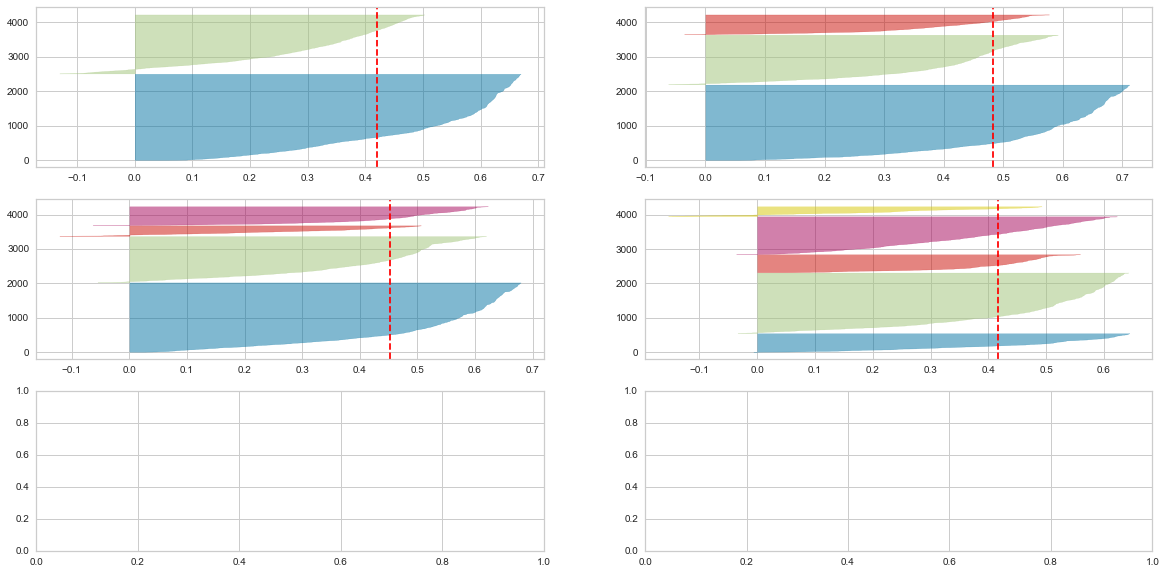

In [245]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in [2, 3, 4, 5]:
    clusterer = KMeans(n_clusters = k)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

> Hasil di atas menunjukkan bahwa jumlah cluster yang optimal adalah 3 (K = 3) karena nilai silhouette coefficientnya paling mendekati 1. Dari visualisasinya pun dapat dilihat bahwa luas ketiga cluster (grafik pada pojok kanan atas) terbagi relatif rata satu sama lain, tidak ada satu cluster yang mendominasi cluster lain.

In [246]:
# penerapan K-Means terhadap dataframe
kmeans = KMeans(n_clusters=3)
cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('price_usd', 'engine_capacity', 'year_produced'))
data_with_clusters['Clusters'] = cluster_assignment 
data_with_clusters

price_usd  engine_capacity  year_produced  Clusters
0      0.276645        -0.747262       1.214446         2
1      1.210011        -1.294812       1.483307         2
2      0.226459        -0.199713       0.945586         2
3     -0.025734        -0.199713       0.542295         2
4      0.592139        -1.294812       1.214446         2
...         ...              ...            ...       ...
4199   0.831722         1.442936       0.542295         1
4200  -0.404023         1.990485      -0.667578         1
4201   0.251678         1.716711       0.139004         1
4202   0.402994         1.716711       0.273434         1
4203  -0.050953         1.716711      -0.129857         1

[4203 rows x 4 columns]

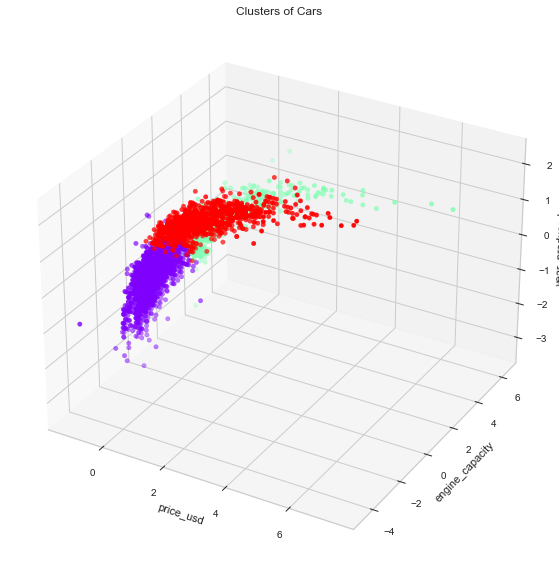

In [247]:
# Visualisasi Cluster 3D
# membuat figur
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# mempersiapkan data
x = data_with_clusters['price_usd']
y = data_with_clusters['engine_capacity']
z = data_with_clusters['year_produced']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clusters of Cars")
ax.set_xlabel('price_usd')
ax.set_ylabel('engine_capacity')
ax.set_zlabel('year_produced')

# Show plot
plt.show()

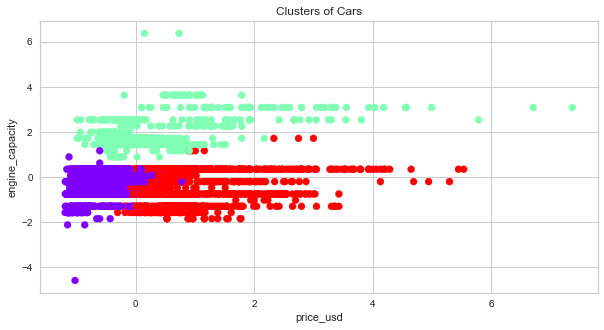

In [248]:
# Visualisasi 2D
# Create figure
fig = plt.figure(figsize = (10, 5))
ax = plt.axes()

# Prepare data
x = data_with_clusters['price_usd']
y = data_with_clusters['engine_capacity']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of Cars")
ax.set_xlabel('price_usd')
ax.set_ylabel('engine_capacity')

# Show plot
plt.show()

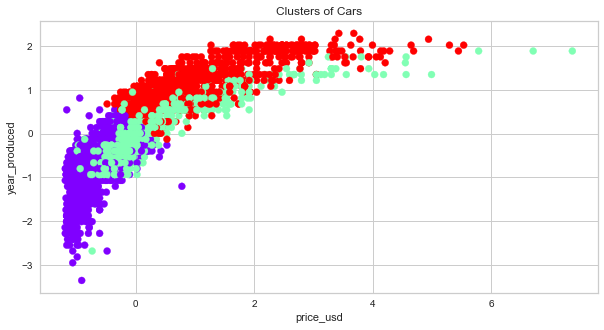

In [249]:
# Visualisasi 2D
# Create figure
fig = plt.figure(figsize = (10, 5))
ax = plt.axes()

# Prepare data
x = data_with_clusters['price_usd']
y = data_with_clusters['year_produced']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of Cars")
ax.set_xlabel('price_usd')
ax.set_ylabel('year_produced')

# Show plot
plt.show()

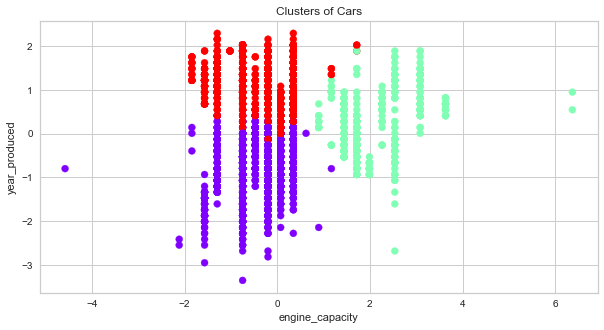

In [250]:
# Visualisasi 2D
# Create figure
fig = plt.figure(figsize = (10, 5))
ax = plt.axes()

# Prepare data
x = data_with_clusters['engine_capacity']
y = data_with_clusters['year_produced']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of Cars")
ax.set_xlabel('engine_capacity')
ax.set_ylabel('year_produced')

# Show plot
plt.show()

- Kelompok pertama (warna ungu) adalah kelompok mobil bekas yang memiliki harga rendah dan kapasitas mesin yang juga cenderung  rendah. Selain itu, tahun produksi mobil bekasnya juga sudah cukup lama.
- Kelompok kedua (warna hijau muda) adalah kelompok mobil bekas yang memiliki harga menengah, kapasitas mesin medium, dan tahun produksi yang baru.
- Kelompok ketiga (warna merah) adalah kelompok mobil bekas yang memiliki harga rendah ke menengah, kapasitas mesin yang cenderung tinggi, dan tahun produksi yang bervariasi, namun mayoritas merupakan produksi yang tidak terlalu lama.

Hierarchical Clustering

In [251]:
from sklearn.cluster import AgglomerativeClustering

agglo_clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agglo_cluster_assignment = agglo_clustering_model.fit(X)


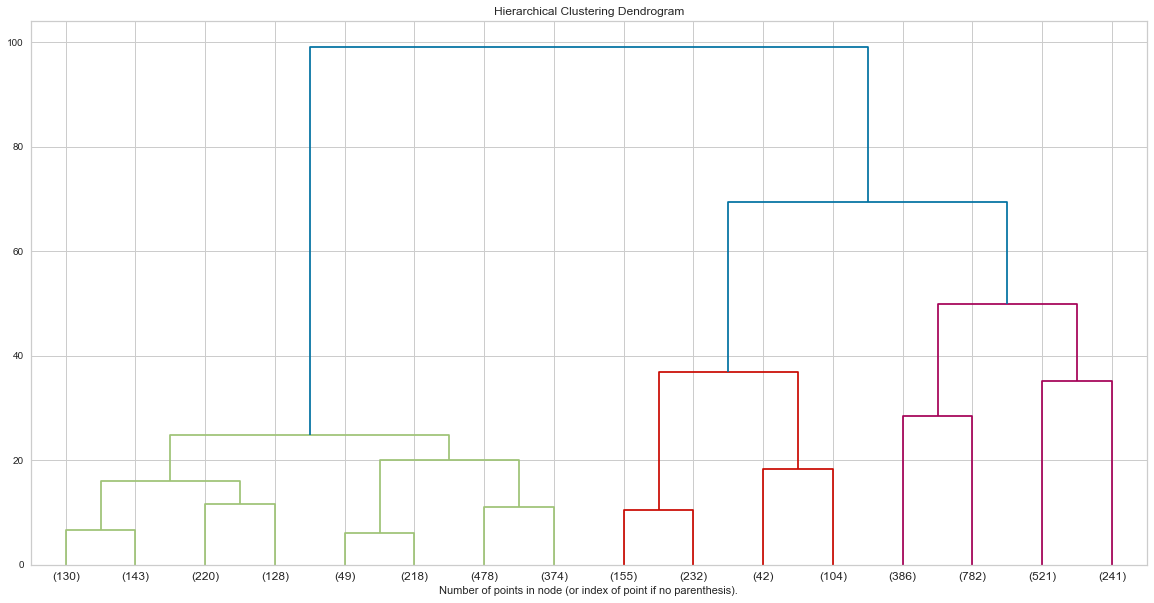

In [252]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Show the Plot
plot_dendrogram(agglo_cluster_assignment, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

Berdasarkan dendogram di atas, dapat dilihat terdapat 3 clades. Oleh karena itu dapat dikatakan bahwa terdapat 3 clusters dalam Clusters of Cars.

In [253]:
# Set number of clusters = 3
agglo_clustering_model = AgglomerativeClustering(n_clusters=3, distance_threshold=None)
agglo_cluster_assignment = agglo_clustering_model.fit_predict(X)

data_with_agglo_clusters = pd.DataFrame(X.copy(), columns=('price_usd', 'engine_capacity', 'year_produced'))
data_with_agglo_clusters['Clusters'] = cluster_assignment 
data_with_agglo_clusters

price_usd  engine_capacity  year_produced  Clusters
0      0.276645        -0.747262       1.214446         2
1      1.210011        -1.294812       1.483307         2
2      0.226459        -0.199713       0.945586         2
3     -0.025734        -0.199713       0.542295         2
4      0.592139        -1.294812       1.214446         2
...         ...              ...            ...       ...
4199   0.831722         1.442936       0.542295         1
4200  -0.404023         1.990485      -0.667578         1
4201   0.251678         1.716711       0.139004         1
4202   0.402994         1.716711       0.273434         1
4203  -0.050953         1.716711      -0.129857         1

[4203 rows x 4 columns]

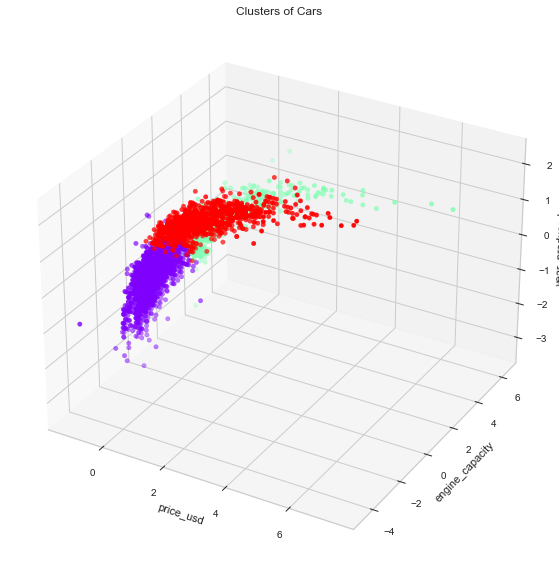

In [254]:
# Visualisasi Cluster 3D
# Create figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Prepare data
x = data_with_agglo_clusters['price_usd']
y = data_with_agglo_clusters['engine_capacity']
z = data_with_agglo_clusters['year_produced']
cluster = data_with_agglo_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clusters of Cars")
ax.set_xlabel('price_usd')
ax.set_ylabel('engine_capacity')
ax.set_zlabel('year_produced')

# Show plot
plt.show()

Text(0, 0.5, 'engine_capacity')

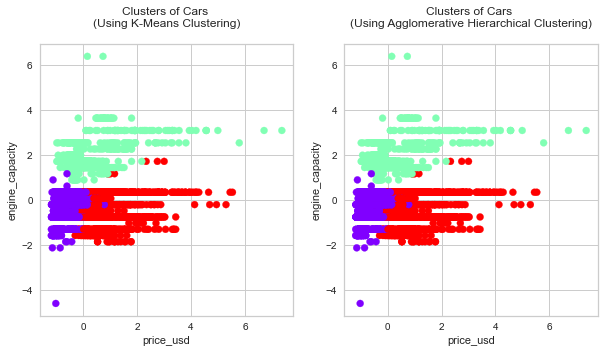

In [255]:
# Make a horizontally stacked subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# K-Means Clustering

# Prepare data
x = data_with_clusters['price_usd']
y = data_with_clusters['engine_capacity']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax1.scatter(x, y, c = cluster, cmap = "rainbow")
ax1.set_title("Clusters of Cars \n(Using K-Means Clustering)\n")
ax1.set_xlabel('price_usd')
ax1.set_ylabel('engine_capacity')


## Agglomerative Hierarchical Clustering

# Prepare data
x = data_with_agglo_clusters['price_usd']
y = data_with_agglo_clusters['engine_capacity']
cluster = data_with_agglo_clusters['Clusters']
 
# Create plot
ax2.scatter(x, y, c = cluster, cmap = "rainbow")
ax2.set_title("Clusters of Cars \n(Using Agglomerative Hierarchical Clustering)\n ")
ax2.set_xlabel('price_usd')
ax2.set_ylabel('engine_capacity')

Text(0, 0.5, 'year_produced')

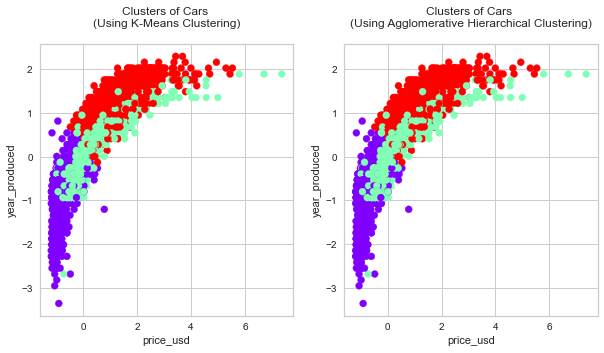

In [256]:
# Make a horizontally stacked subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# K-Means Clustering

# Prepare data
x = data_with_clusters['price_usd']
y = data_with_clusters['year_produced']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax1.scatter(x, y, c = cluster, cmap = "rainbow")
ax1.set_title("Clusters of Cars \n(Using K-Means Clustering)\n")
ax1.set_xlabel('price_usd')
ax1.set_ylabel('year_produced')


## Agglomerative Hierarchical Clustering

# Prepare data
x = data_with_agglo_clusters['price_usd']
y = data_with_agglo_clusters['year_produced']
cluster = data_with_agglo_clusters['Clusters']
 
# Create plot
ax2.scatter(x, y, c = cluster, cmap = "rainbow")
ax2.set_title("Clusters of Cars \n(Using Agglomerative Hierarchical Clustering)\n ")
ax2.set_xlabel('price_usd')
ax2.set_ylabel('year_produced')

Text(0, 0.5, 'year_produced')

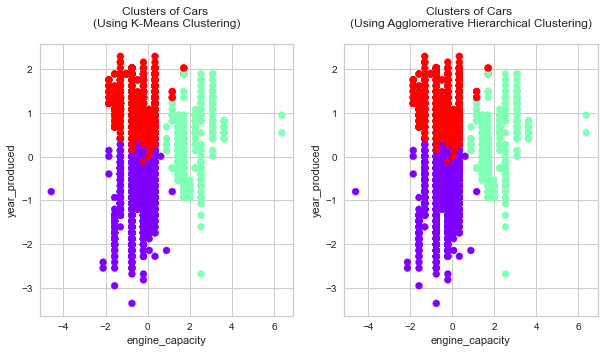

In [257]:
# Make a horizontally stacked subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# K-Means Clustering

# Prepare data
x = data_with_clusters['engine_capacity']
y = data_with_clusters['year_produced']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax1.scatter(x, y, c = cluster, cmap = "rainbow")
ax1.set_title("Clusters of Cars \n(Using K-Means Clustering)\n")
ax1.set_xlabel('engine_capacity')
ax1.set_ylabel('year_produced')


## Agglomerative Hierarchical Clustering

# Prepare data
x = data_with_agglo_clusters['engine_capacity']
y = data_with_agglo_clusters['year_produced']
cluster = data_with_agglo_clusters['Clusters']
 
# Create plot
ax2.scatter(x, y, c = cluster, cmap = "rainbow")
ax2.set_title("Clusters of Cars \n(Using Agglomerative Hierarchical Clustering)\n ")
ax2.set_xlabel('engine_capacity')
ax2.set_ylabel('year_produced')